In [6]:
!pip install skew

In [7]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
import requests
import matplotlib
import graphviz
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [8]:
#using direct data download - importing the data.

In [9]:
baseball = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
baseball.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [10]:
baseball.info() 

#checking for the datatypes, and it has 17 columns with data type of 16 int and 1 float. Since there are no object type no encoding is required, so passing this step.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
#changing the headers with fullforms for better understanding.

baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [12]:
baseball.rename(columns={'W': 'win', 'R': 'runs_scored', 'AB': 'at_bat', 'H': 'hit', '2B': 'double', 
                         '3B':'triple', 'HR': 'home_runs', 'BB': 'base_on_balls', 'SO': 'strike_out', 'SB': 'stolen_base', 
                         'RA': 'run_average', 'ER': 'earned_run', 'ERA': 'earned_run_average', 'CG': 'complete_game',
                        'SHO': 'shutout', 'SV': 'save', 'E': 'errors'}, inplace=True)
baseball.head()

win  runs_scored  at_bat   hit  double  triple  home_runs  base_on_balls  \
0   95          724    5575  1497     300      42        139            383   
1   83          696    5467  1349     277      44        156            439   
2   81          669    5439  1395     303      29        141            533   
3   76          622    5533  1381     260      27        136            404   
4   74          689    5605  1515     289      49        151            455   

   strike_out  stolen_base  run_average  earned_run  earned_run_average  \
0         973          104          641         601                3.73   
1        1264           70          700         653                4.07   
2        1157           86          640         584                3.67   
3        1231           68          701         643                3.98   
4        1259           83          803         746                4.64   

   complete_game  shutout  save  errors  
0              2        8    56      88  
1              2       12    45      86  
2             11       10    38      79  
3              7        9    37     101  
4              7       12    35      86

In [13]:
#explanation for the Headers below for better understanding and future reference:

#W – Win:  number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
#RA – Run average: number of runs allowed times nine divided by innings pitched
#ER – Earned run: number of runs that did not occur as a result of errors or passed balls
#ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
#CG – Complete game: number of games where player was the only pitcher for their team
#SHO – Shutout: number of complete games pitched with no runs allowed
#SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
#R – Runs scored: number of times a player crosses home plate
#AB – At Bat - Plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: Reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SO – Strike out: number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

#reference link: https://en.wikipedia.org/wiki/Baseball_statistics

In [14]:
baseball.isna().sum() #checking for any missing values. As per the result there is no missing values.

win                   0
runs_scored           0
at_bat                0
hit                   0
double                0
triple                0
home_runs             0
base_on_balls         0
strike_out            0
stolen_base           0
run_average           0
earned_run            0
earned_run_average    0
complete_game         0
shutout               0
save                  0
errors                0
dtype: int64

In [15]:
baseball.describe().T #describe code also confirms there is no missing since the count columns for all the rows/headers are 30.

#used transpose method for clear understanding of the data since the columns are more.

count         mean         std      min        25%  \
win                  30.0    80.966667   10.453455    63.00    74.0000   
runs_scored          30.0   688.233333   58.761754   573.00   651.2500   
at_bat               30.0  5516.266667   70.467372  5385.00  5464.0000   
hit                  30.0  1403.533333   57.140923  1324.00  1363.0000   
double               30.0   274.733333   18.095405   236.00   262.2500   
triple               30.0    31.300000   10.452355    13.00    23.0000   
home_runs            30.0   163.633333   31.823309   100.00   140.2500   
base_on_balls        30.0   469.100000   57.053725   375.00   428.2500   
strike_out           30.0  1248.200000  103.759470   973.00  1157.5000   
stolen_base          30.0    83.500000   22.815225    44.00    69.0000   
run_average          30.0   688.233333   72.108005   525.00   636.2500   
earned_run           30.0   635.833333   70.140786   478.00   587.2500   
earned_run_average   30.0     3.956333    0.454089     2.94     3.6825   
complete_game        30.0     3.466667    2.763473     0.00     1.0000   
shutout              30.0    11.300000    4.120177     4.00     9.0000   
save                 30.0    43.066667    7.869335    28.00    37.2500   
errors               30.0    94.333333   13.958889    75.00    86.0000   

                         50%      75%      max  
win                   81.000    87.75   100.00  
runs_scored          689.000   718.25   891.00  
at_bat              5510.000  5570.00  5649.00  
hit                 1382.500  1451.50  1515.00  
double               275.500   288.75   308.00  
triple                31.000    39.00    49.00  
home_runs            158.500   177.00   232.00  
base_on_balls        473.000   501.25   570.00  
strike_out          1261.500  1311.50  1518.00  
stolen_base           83.500    96.50   134.00  
run_average          695.500   732.50   844.00  
earned_run           644.500   679.25   799.00  
earned_run_average     4.025     4.22     5.04  
complete_game          3.000     5.75    11.00  
shutout               12.000    13.00    21.00  
save                  42.000    46.75    62.00  
errors                91.000    96.75   126.00

In [16]:
baseball.skew() #checking for the range of skewness (+/-0.5). 

#as result shows there are some data such as runs_scored, hit, home_runs, complete_game, shutout, save and errors are slight out of range.
#hence on the next step will be checking if we can treat the data or not.

win                   0.047089
runs_scored           1.200786
at_bat                0.183437
hit                   0.670254
double               -0.230650
triple                0.129502
home_runs             0.516441
base_on_balls         0.158498
strike_out           -0.156065
stolen_base           0.479893
run_average           0.045734
earned_run            0.058710
earned_run_average    0.053331
complete_game         0.736845
shutout               0.565790
save                  0.657524
errors                0.890132
dtype: float64

In [17]:
baseball.nunique() 

#as per the result below there is large number of unique data hence cannot be segregated or combined.

win                   24
runs_scored           28
at_bat                29
hit                   29
double                22
triple                23
home_runs             27
base_on_balls         29
strike_out            29
stolen_base           27
run_average           30
earned_run            30
earned_run_average    30
complete_game          9
shutout               12
save                  20
errors                21
dtype: int64

# Visualization of the Data

### Univariate Analysis

In [18]:
##used swarms of observations on top of a violin plot to identify the single data points.

#on the below result runs_scored, strike_out, complete_game with single data points further away from-
#general accumulation indicating towards the presence of outliers.

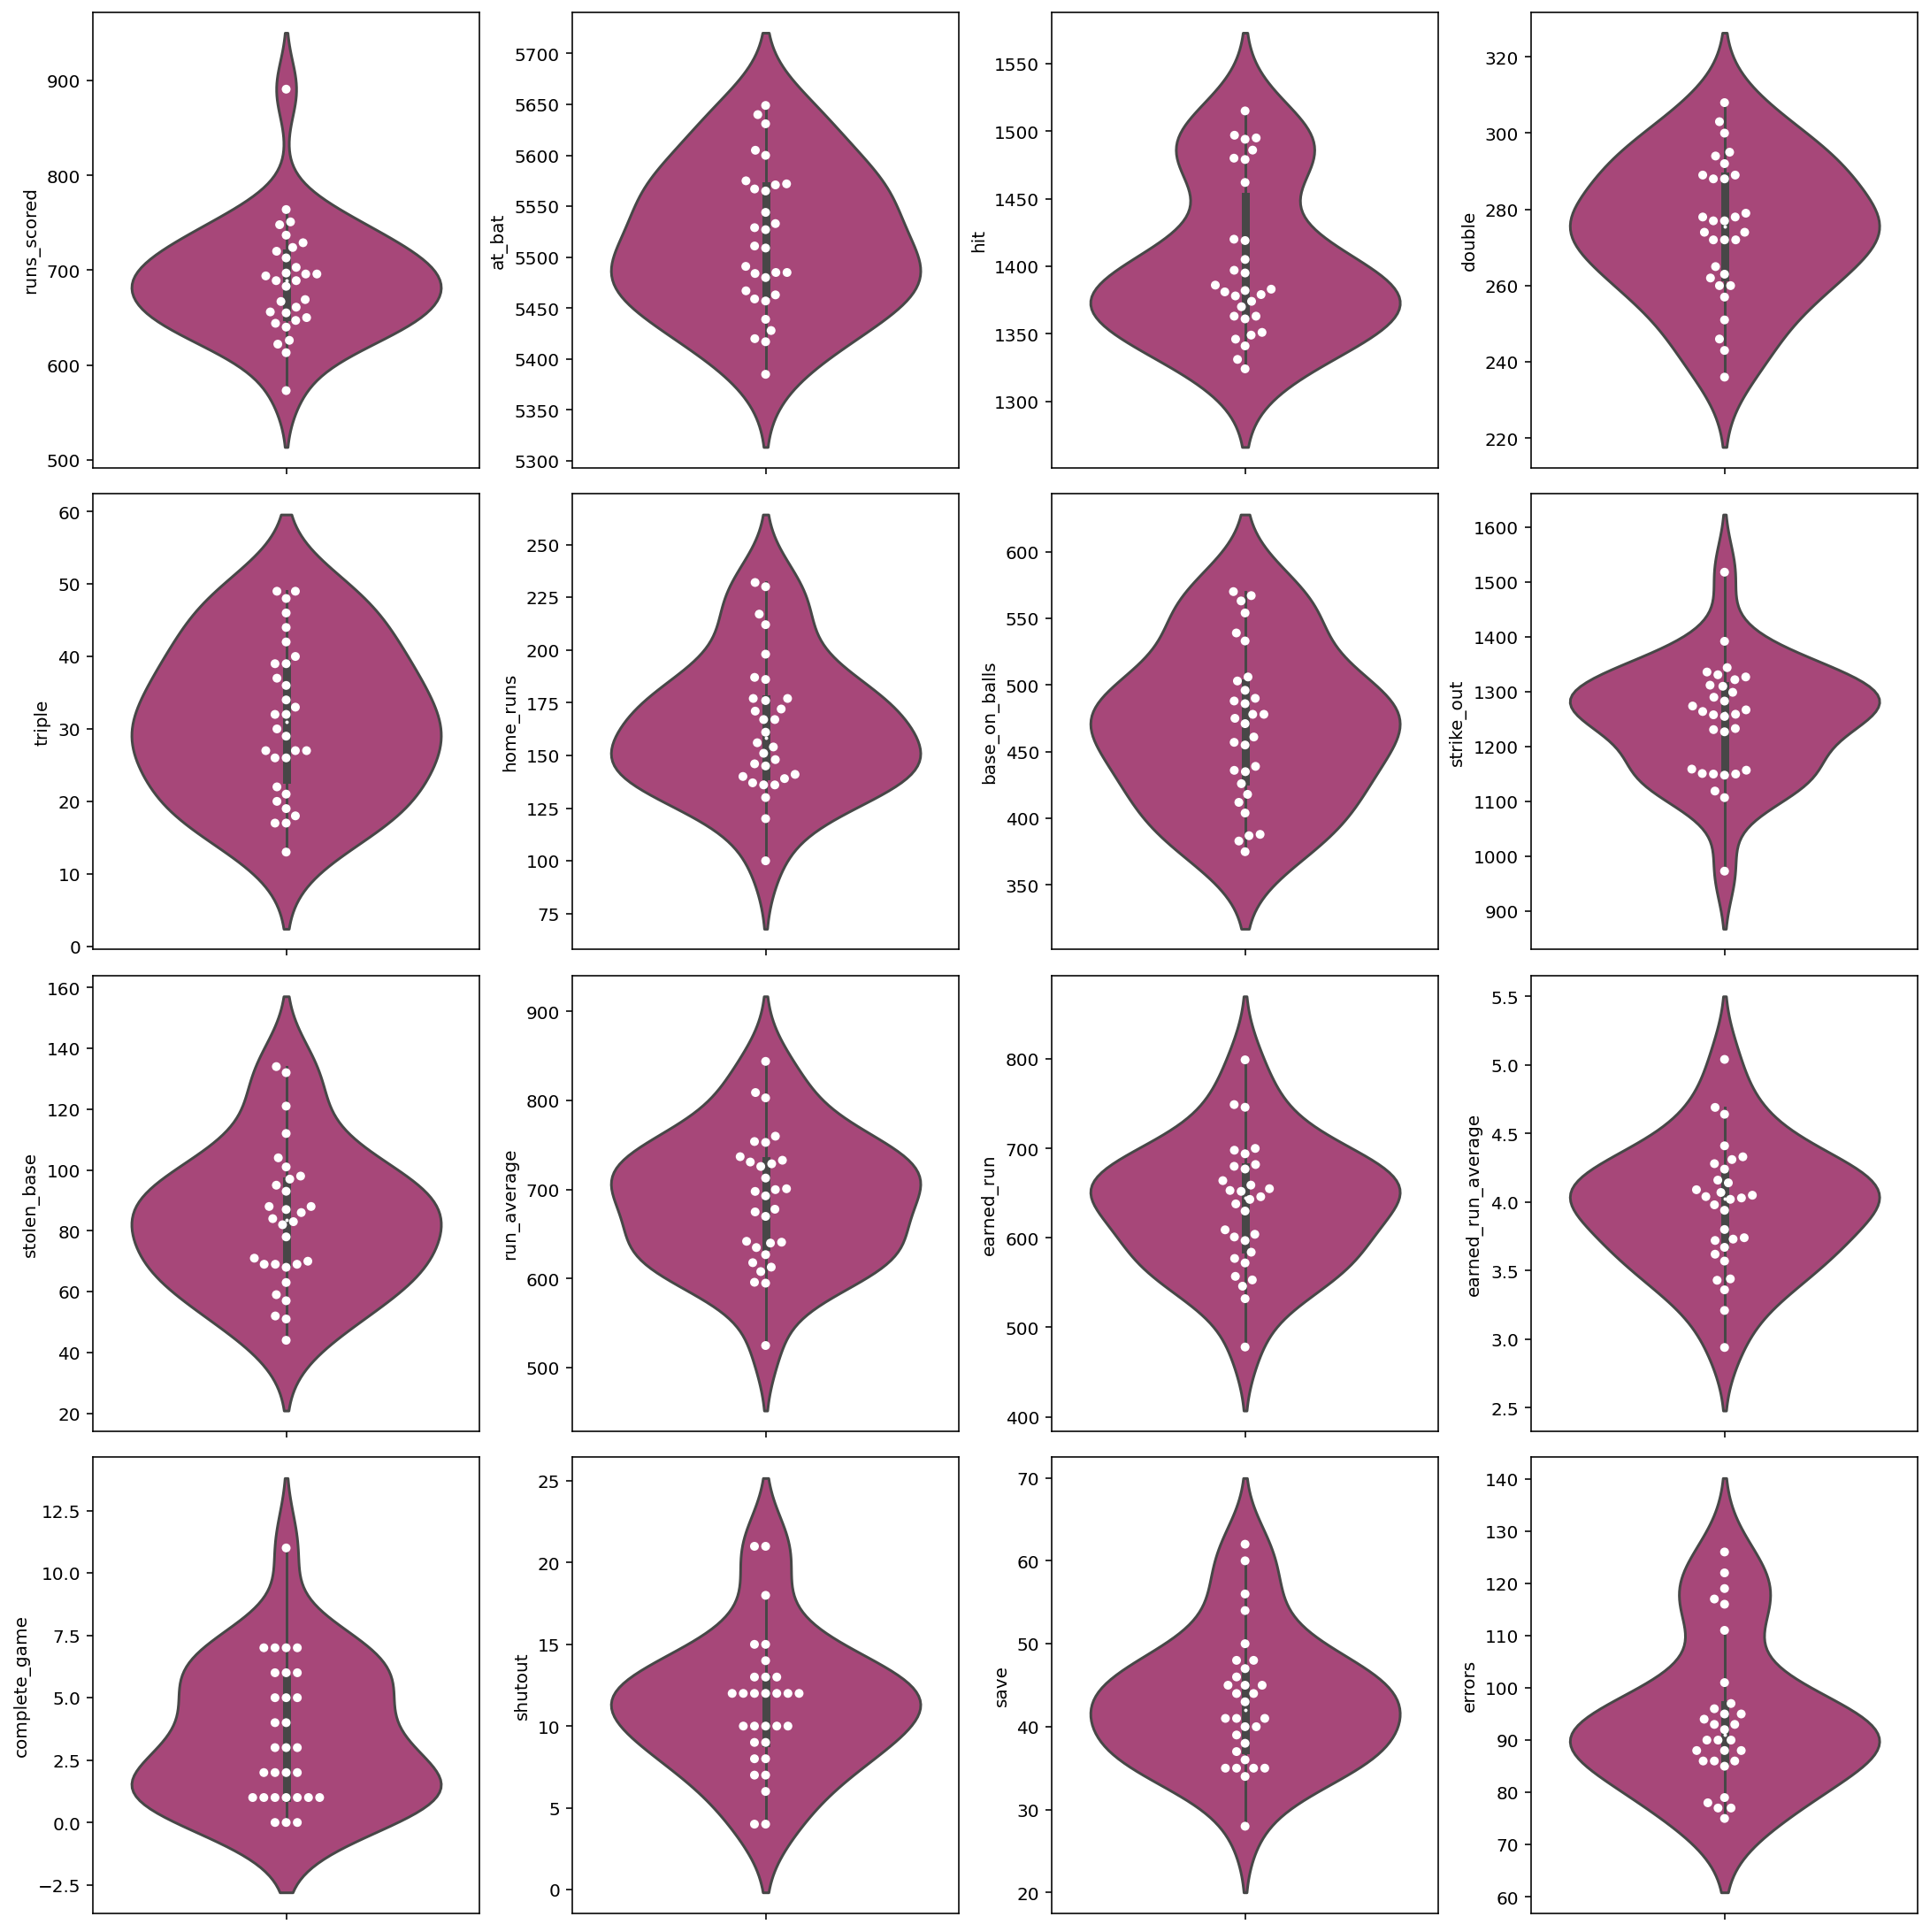

In [19]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = baseball.drop("win", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.violinplot(y=col, data=baseball, ax=ax[index], palette="magma")
    sns.swarmplot(y=col, data=baseball, ax=ax[index], color="white", edgecolor="gray")    
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [20]:
##Boxplot combined with Stripplot for observation of outlier points.

#the below representation shows few outlier point present in 
#runs_scored, earned_run_average, shutout, save and errors and this needs to be treated further before building ML model.


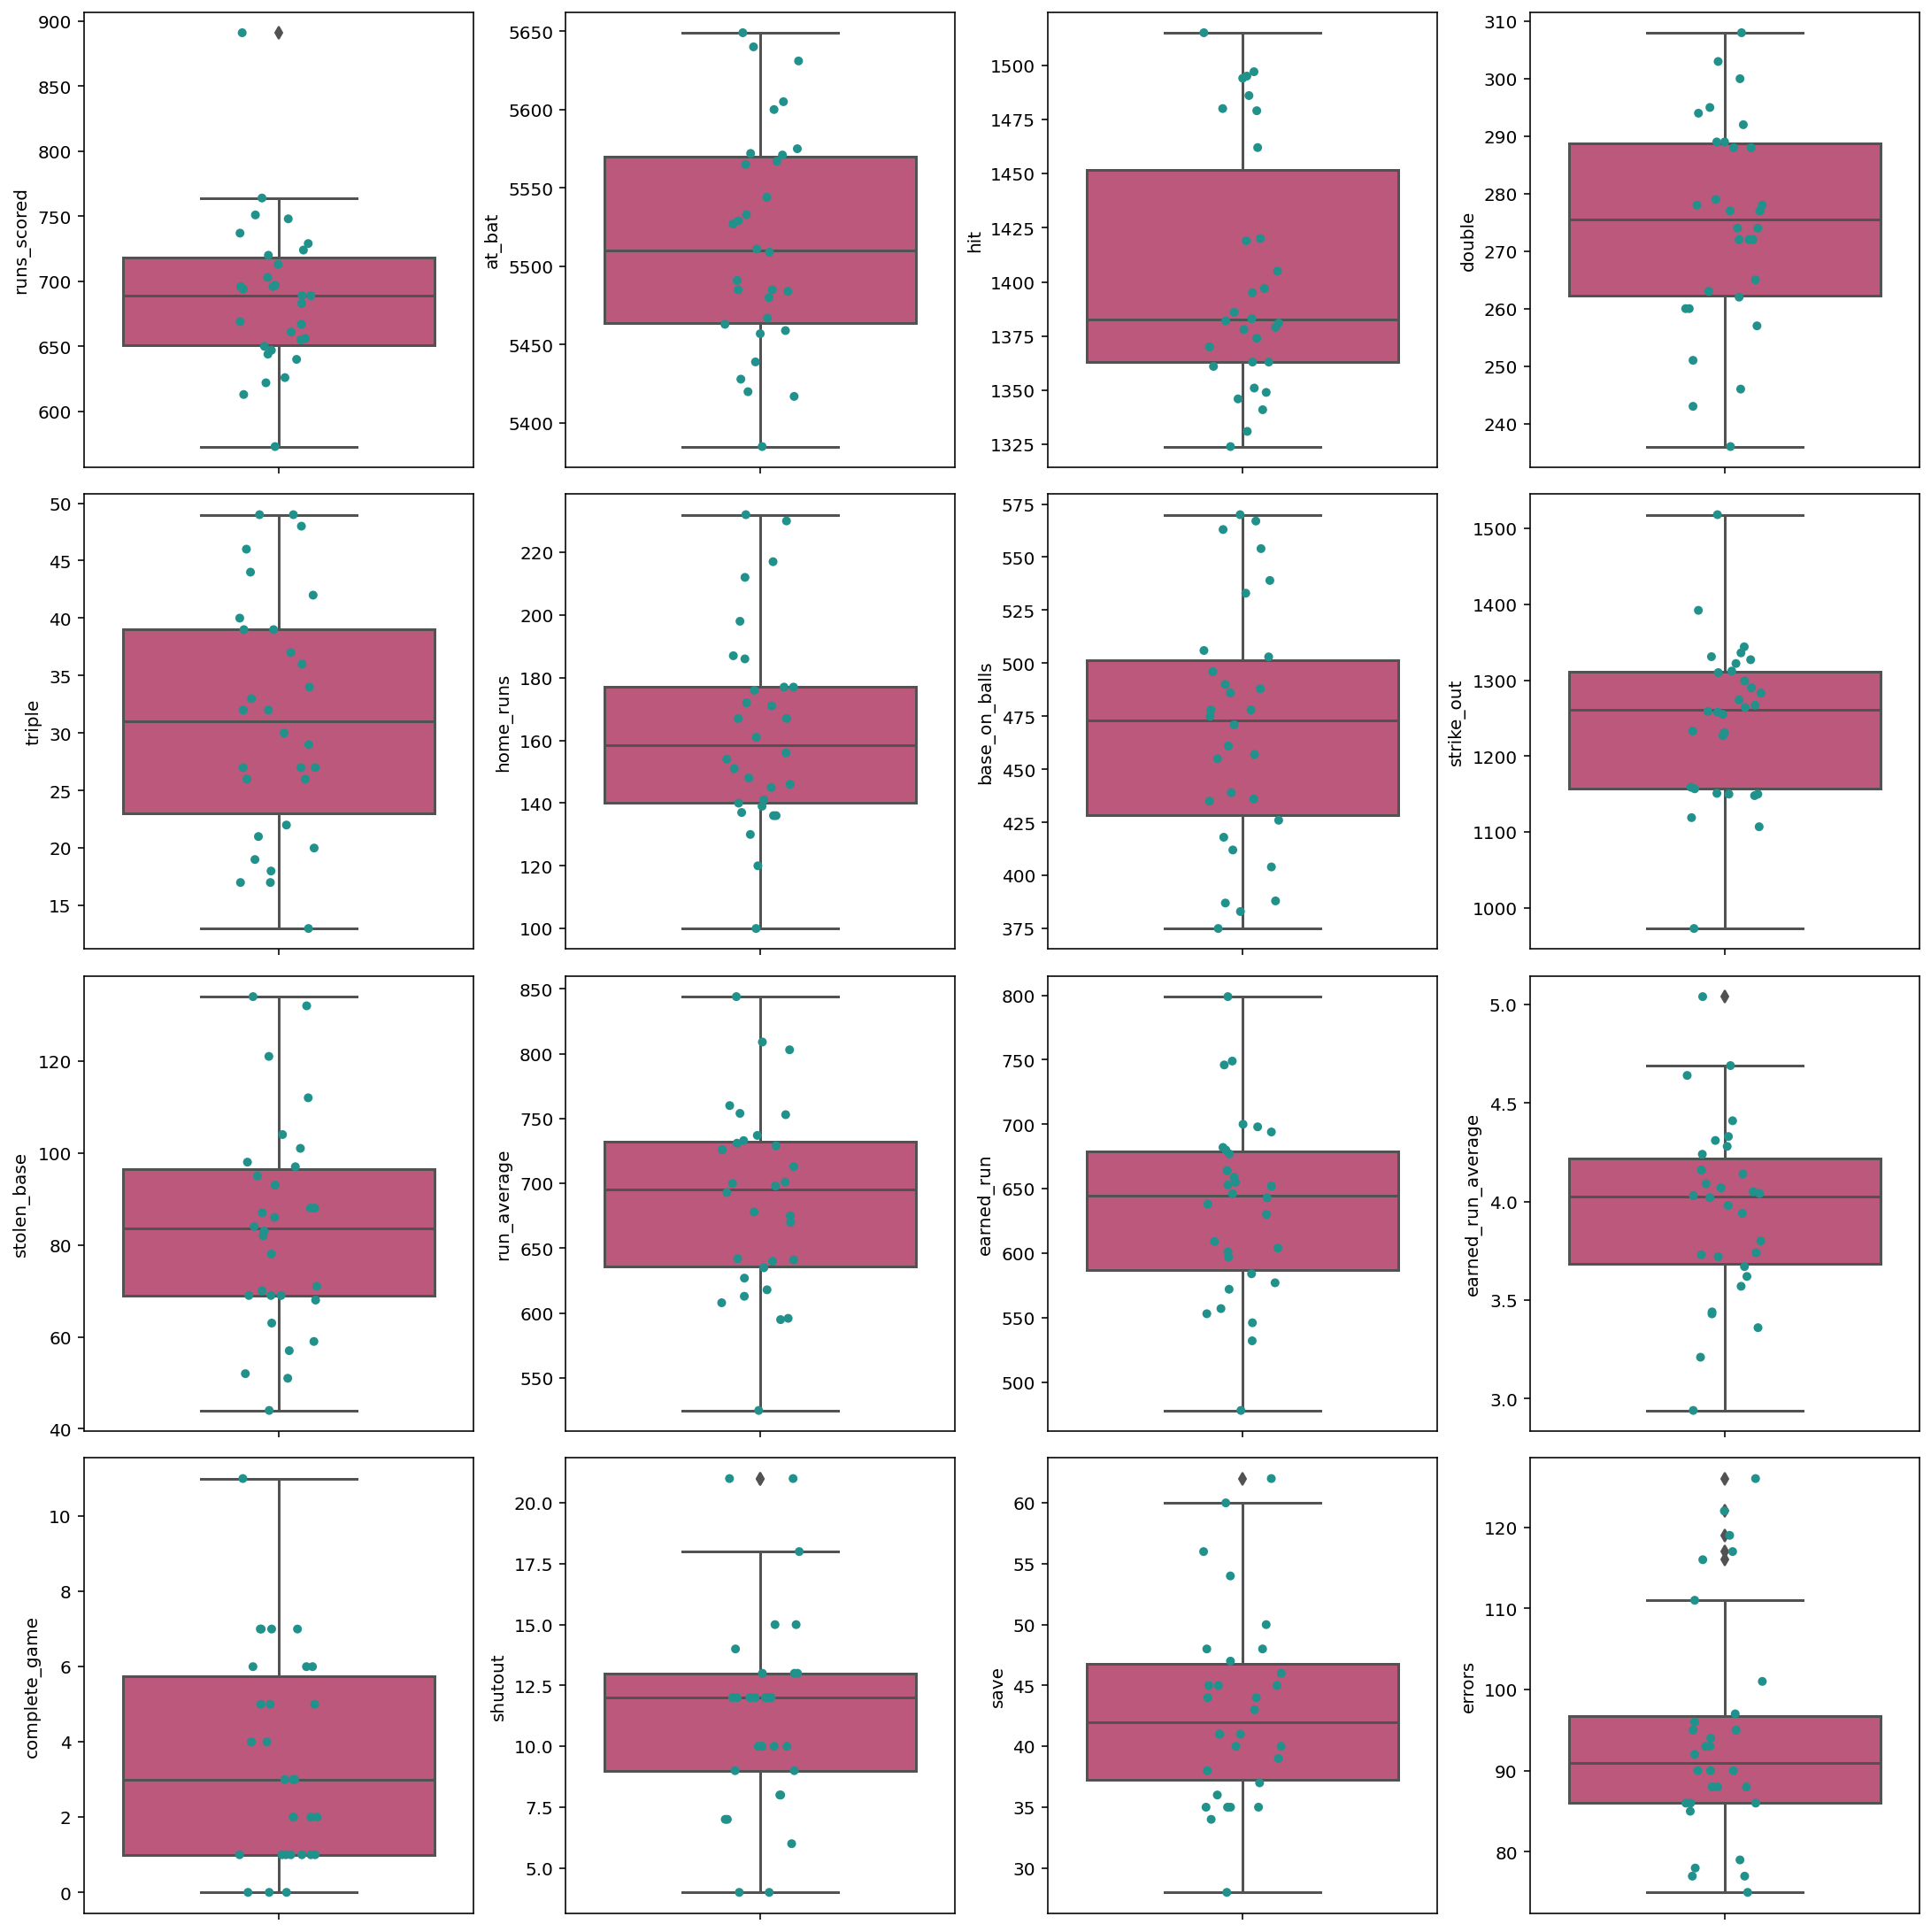

In [21]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = baseball.drop("win", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=baseball, ax=ax[index], palette="plasma")
    sns.stripplot(y=col, data=baseball, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [22]:
#Distribution Plot

#in the below result almost all the columns are normally distributed except for runs_scored, complete_game,shutout and errors
#and these columns have slight skewness in them and will neeed to be treated accordingly.

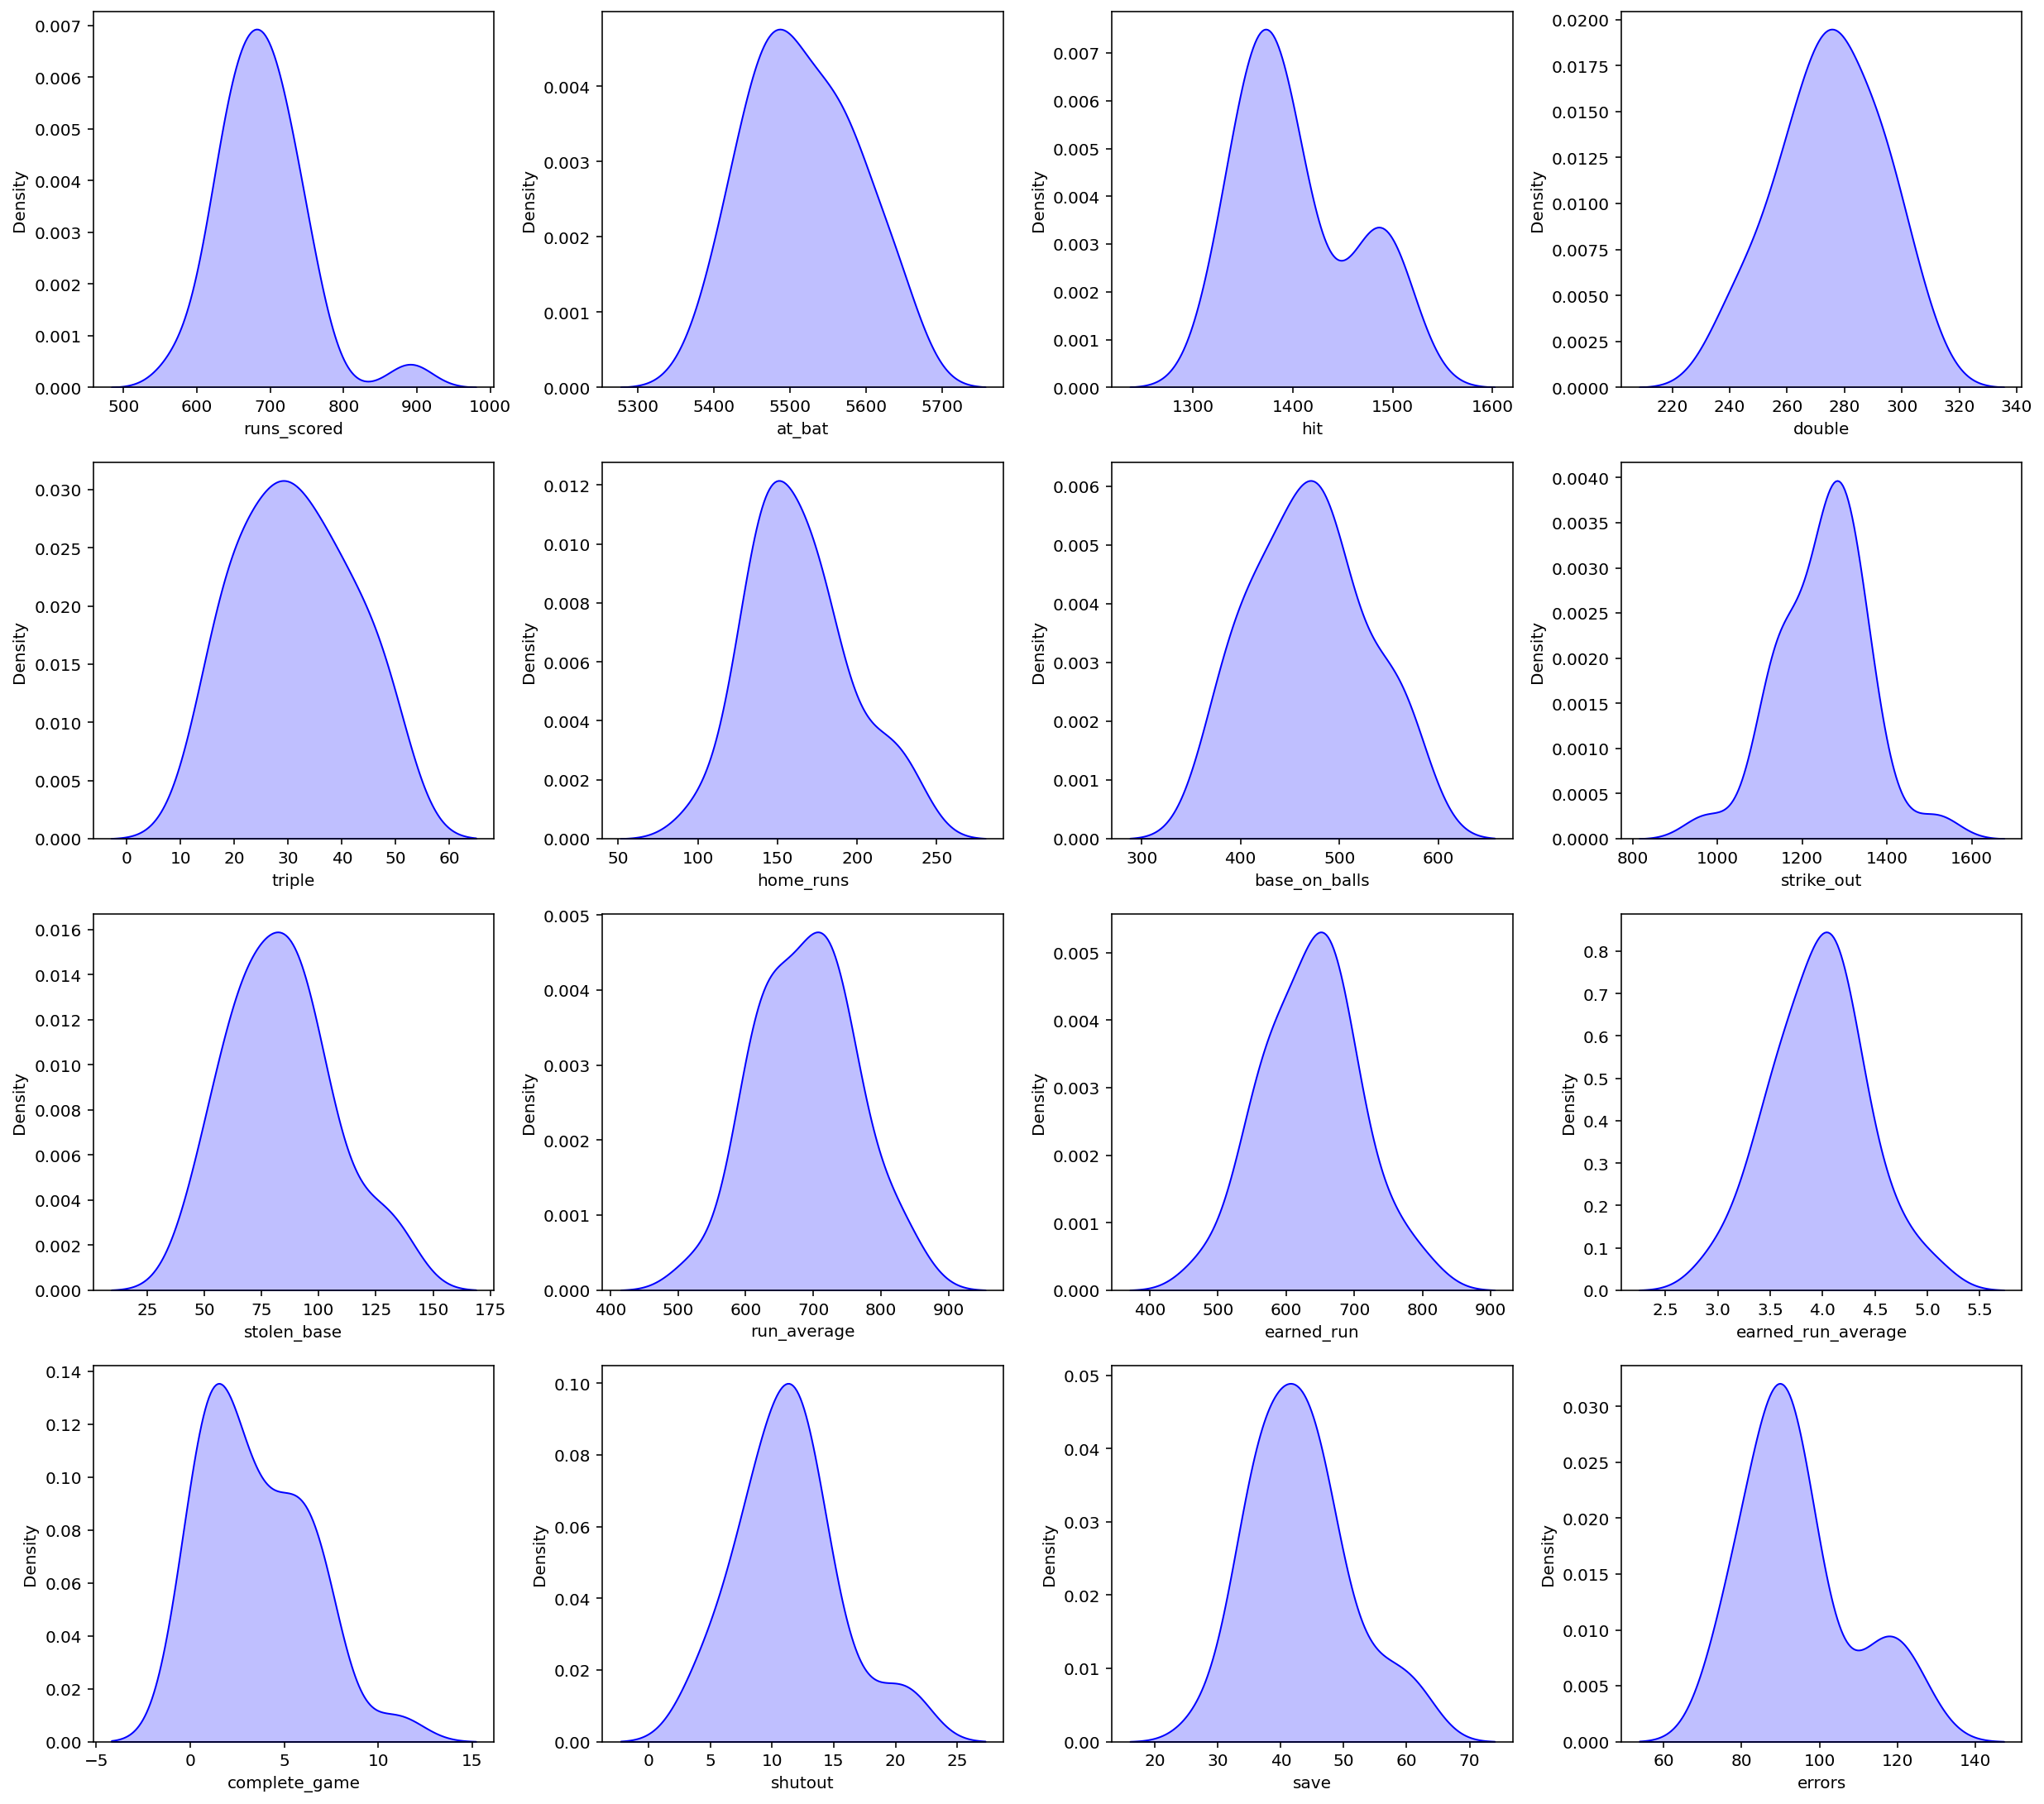

In [23]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = baseball.drop("win", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
# line Plot

In [ ]:
#with the below result in lineplot correponding to "win" columns shows how the features are related with the contribution
#on getting the particular numbers. Some are directly proportional while others are inversely proportional to our label
#or do not have much to offer.

#below columns show the possibility of increase winning in a game if it possitively co-related with "win" column.

#1.runs_scored
#2.double
#3.triple
#4.home_runs
#5.base_on_balls
#6.run_average
#7.earned_run
#8.earned_run_average

#below columns show the possibility of increase lossing in a game if it increases corresponding with "win" column.

#1. strike_out
#2. stolen_base



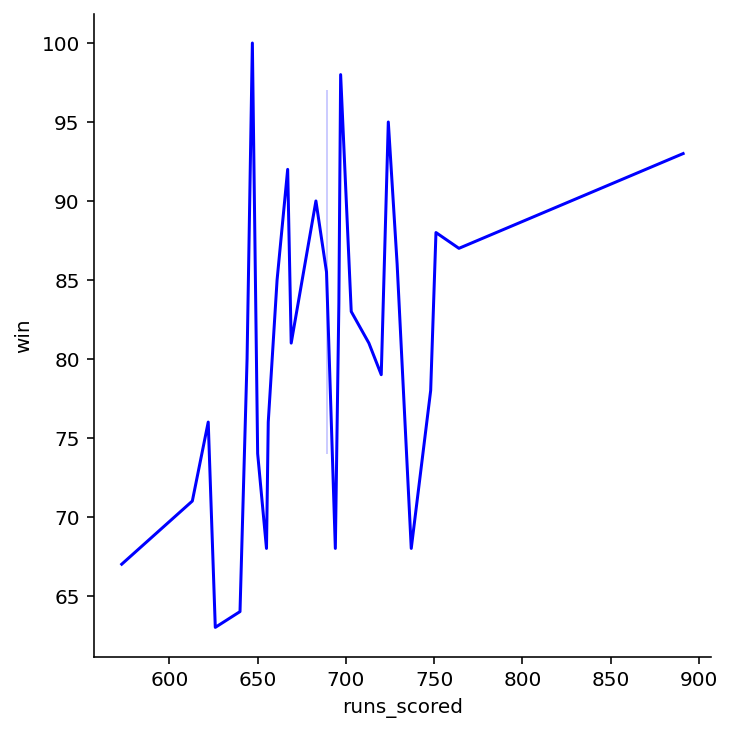

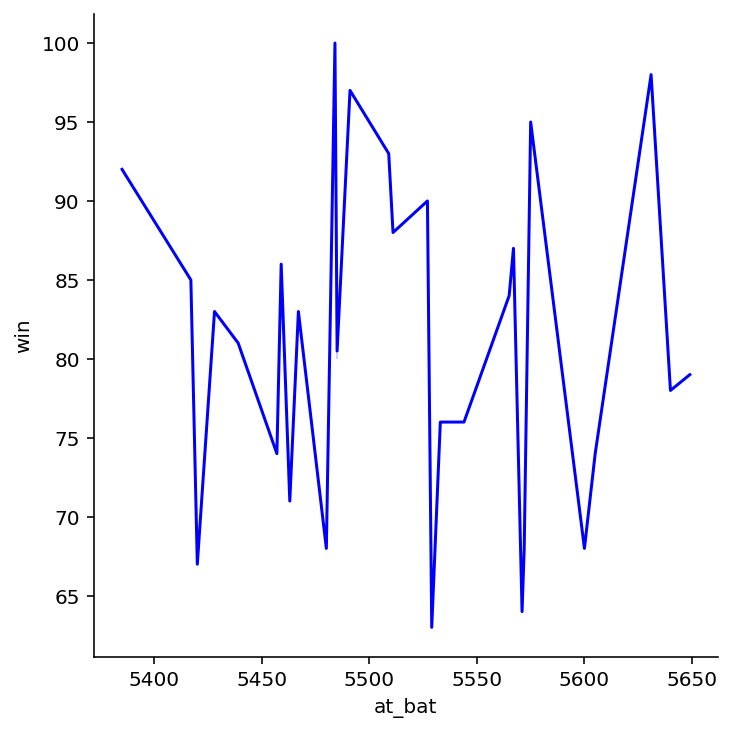

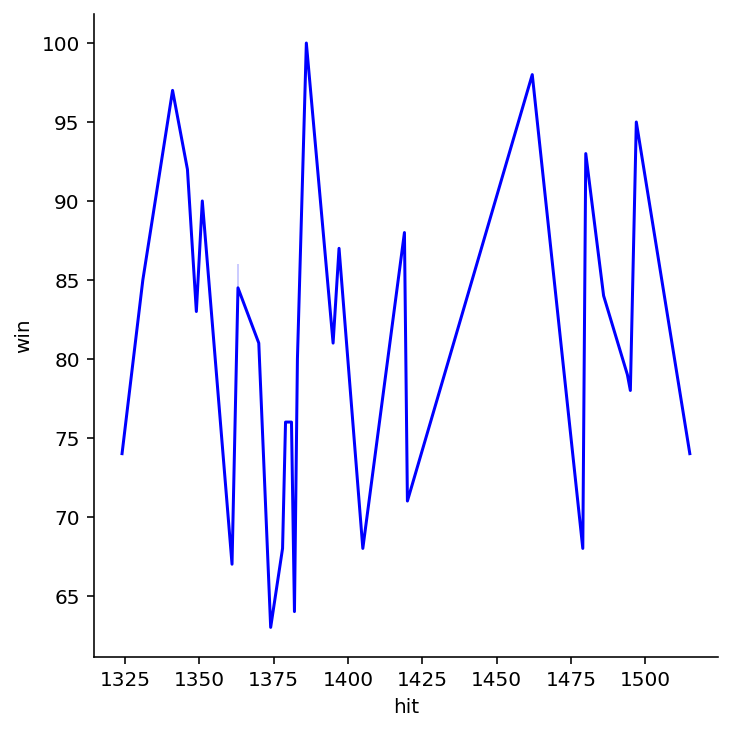

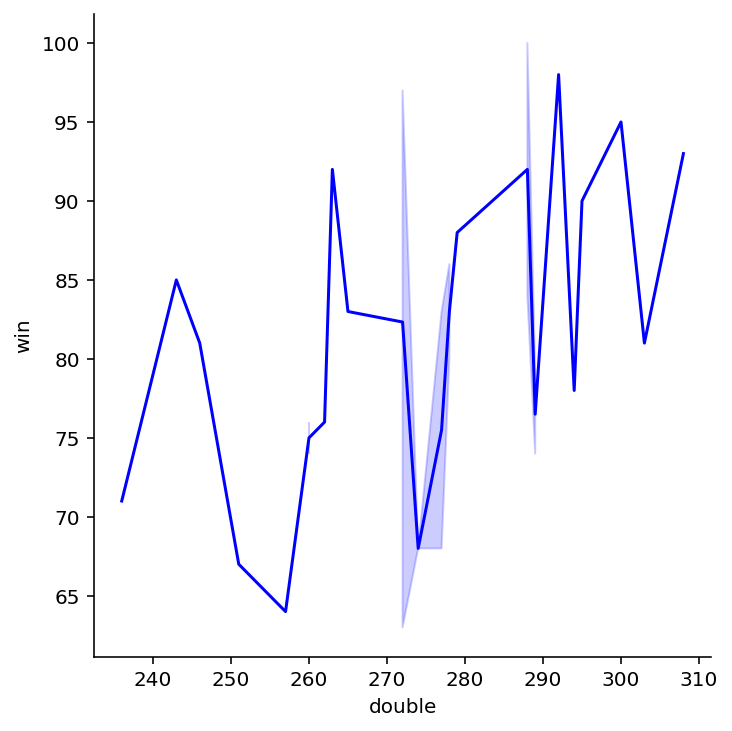

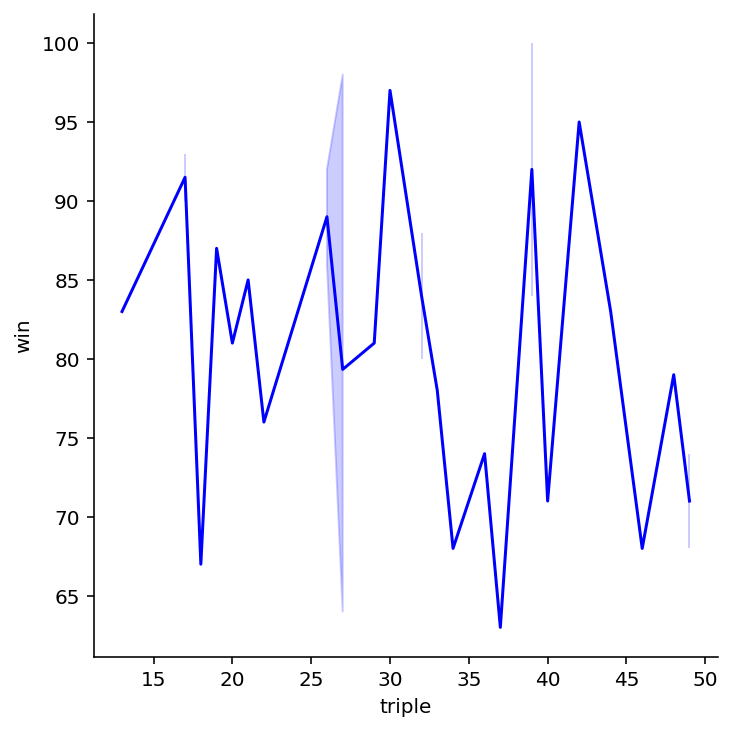

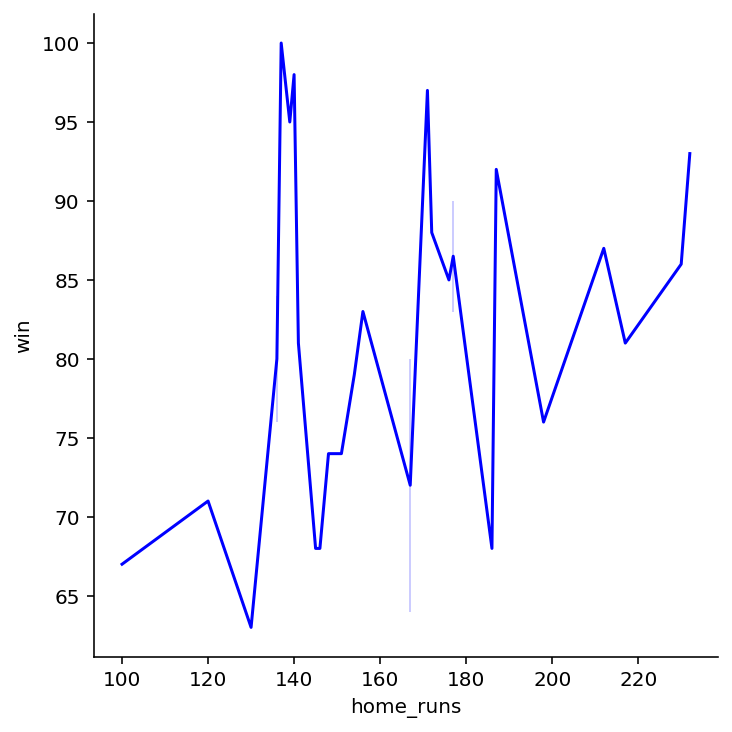

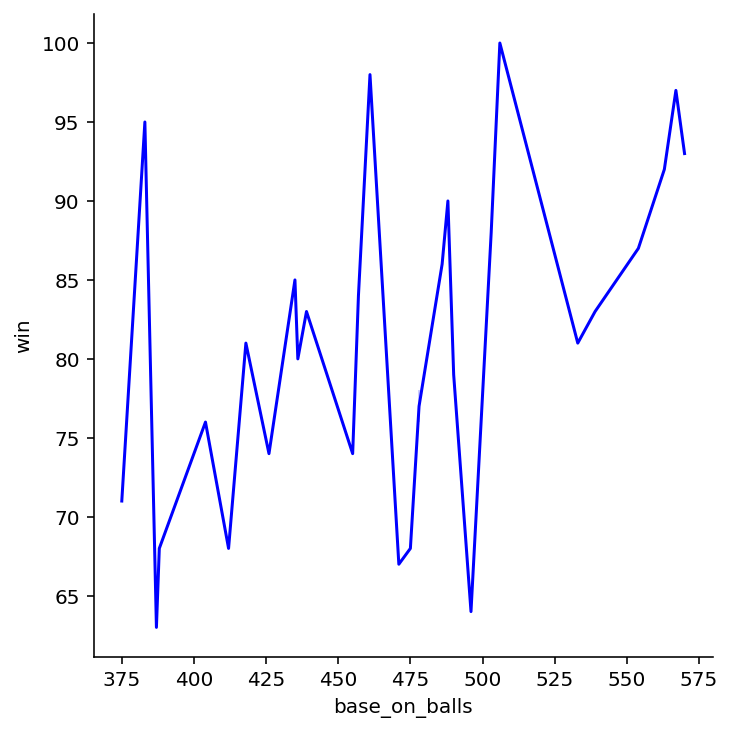

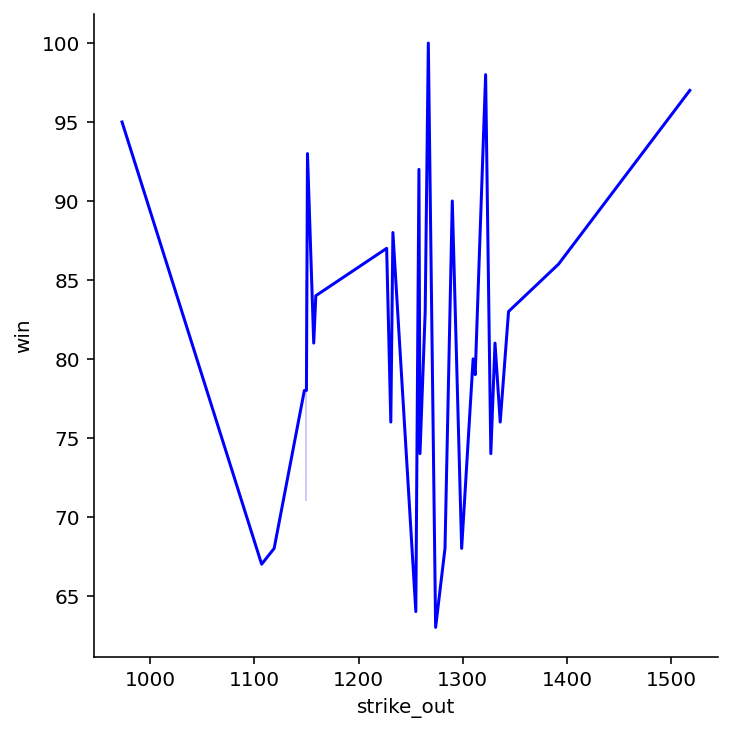

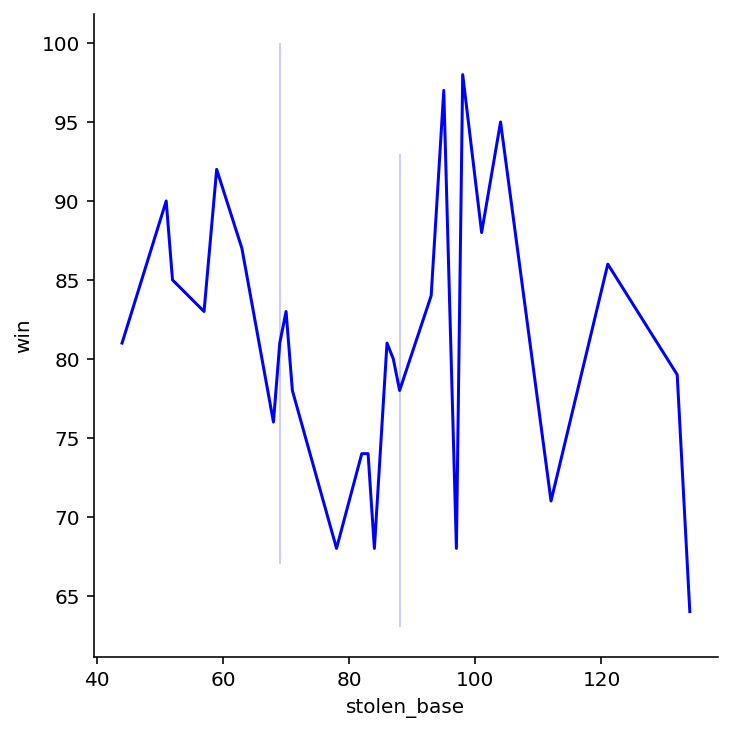

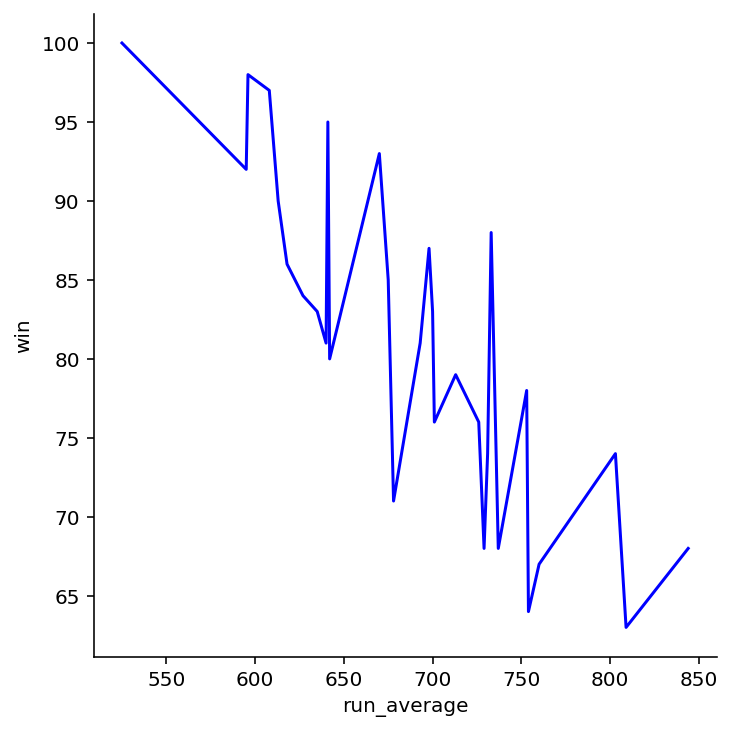

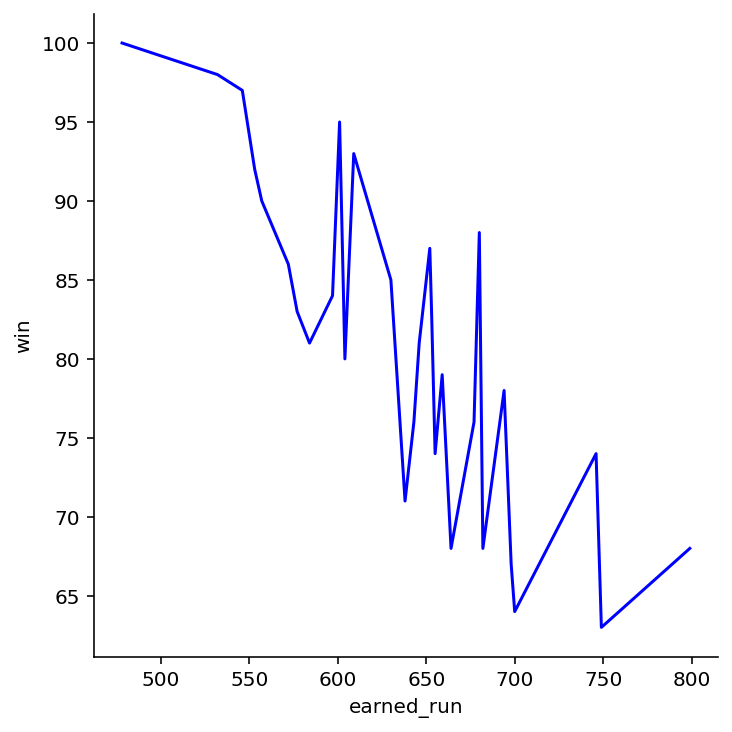

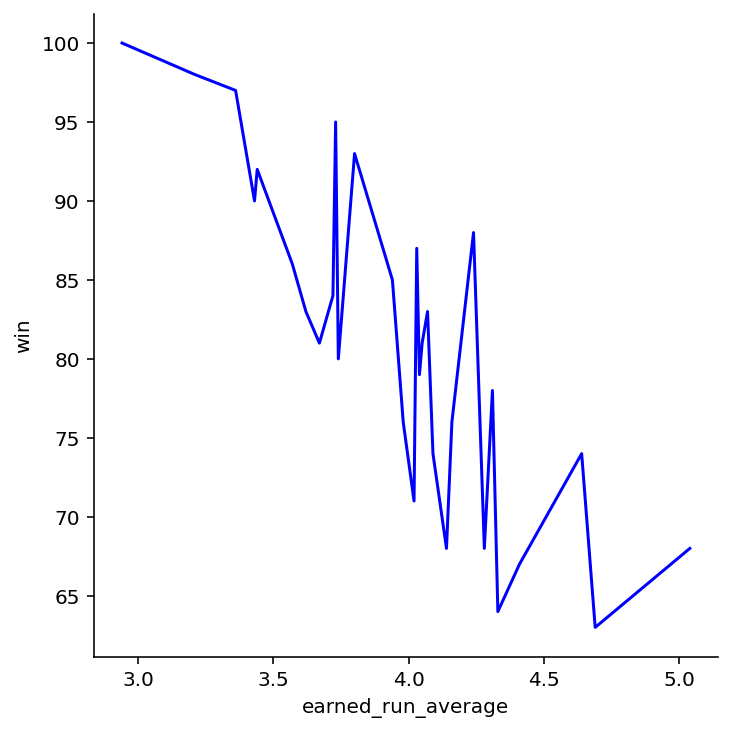

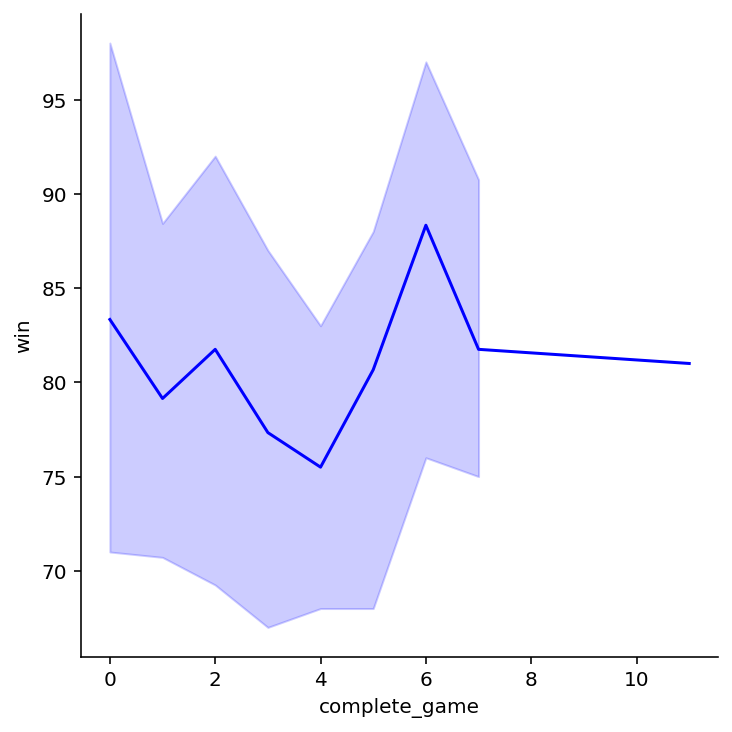

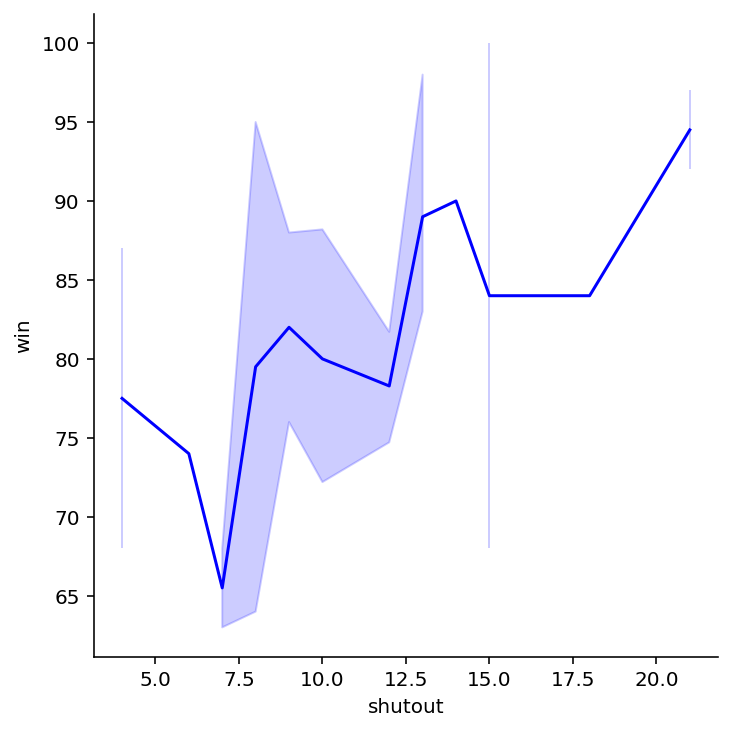

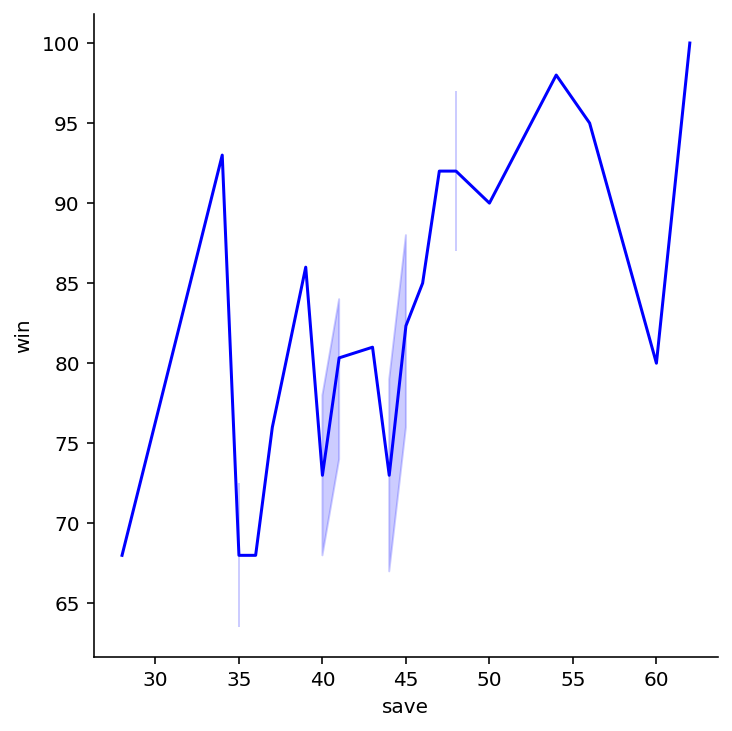

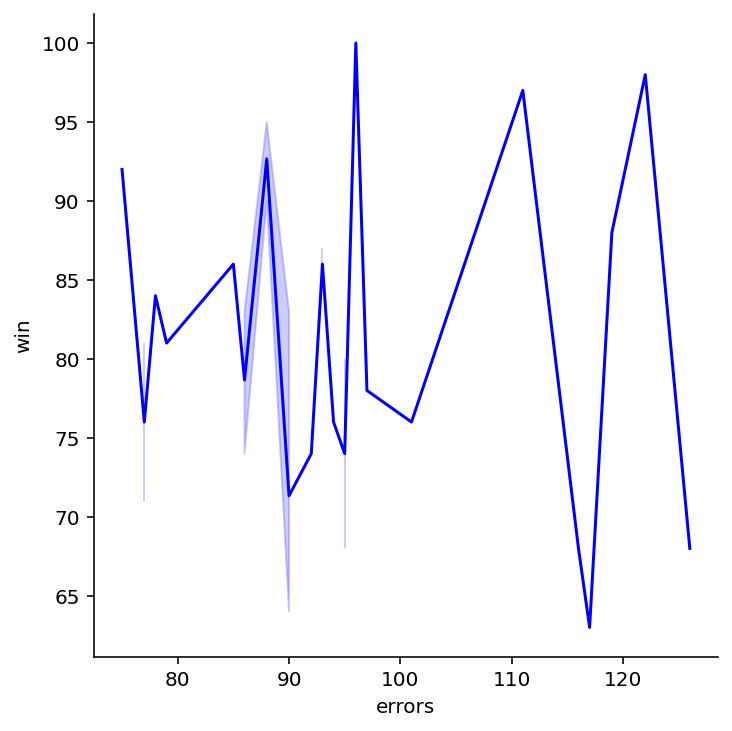

In [26]:
index = 0
features = baseball.drop("win", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="win", kind="line", data=baseball, color = "b")
    index += 1
plt.show()

In [50]:
#barplot to identify unique values individually compared with "win"

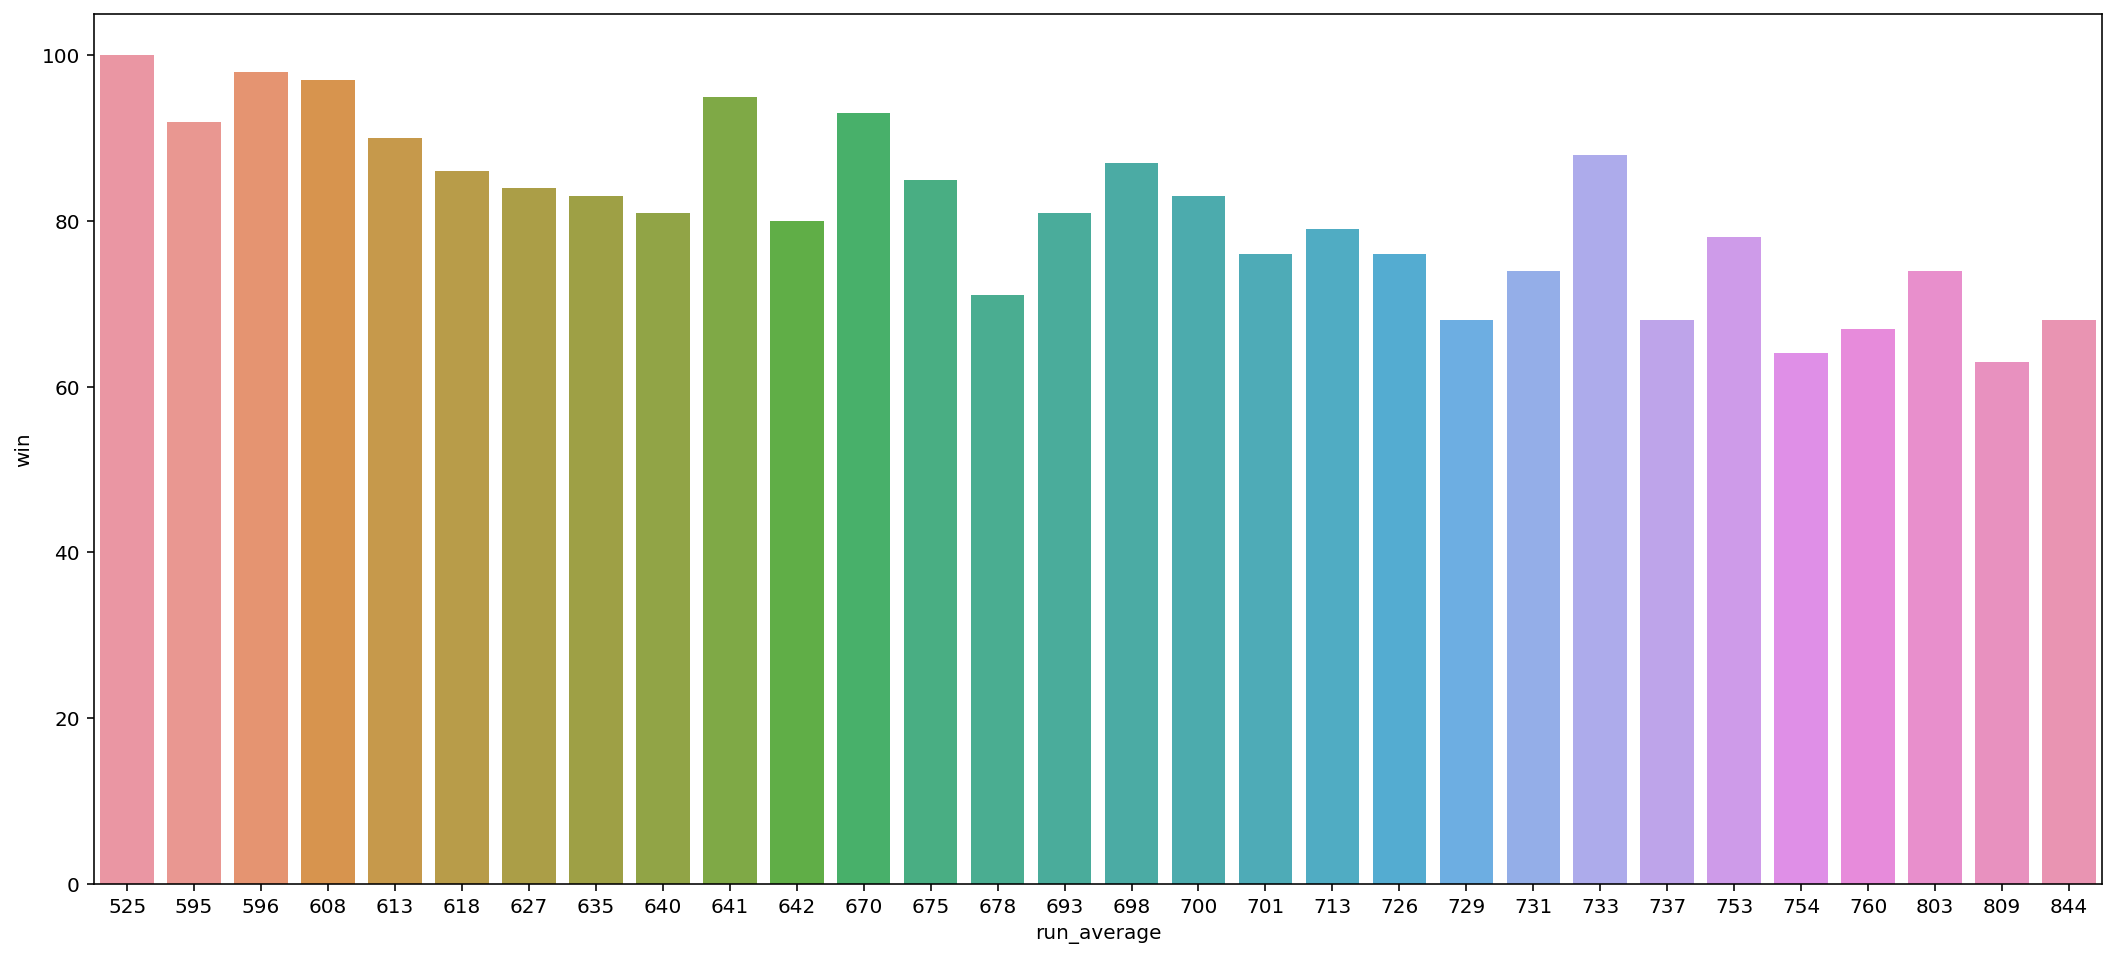

In [79]:
plt.figure(figsize=(18,8))
sns.barplot(x="run_average", y="win", data=baseball)
plt.show()

#Comparisson with win - decrasing pattern

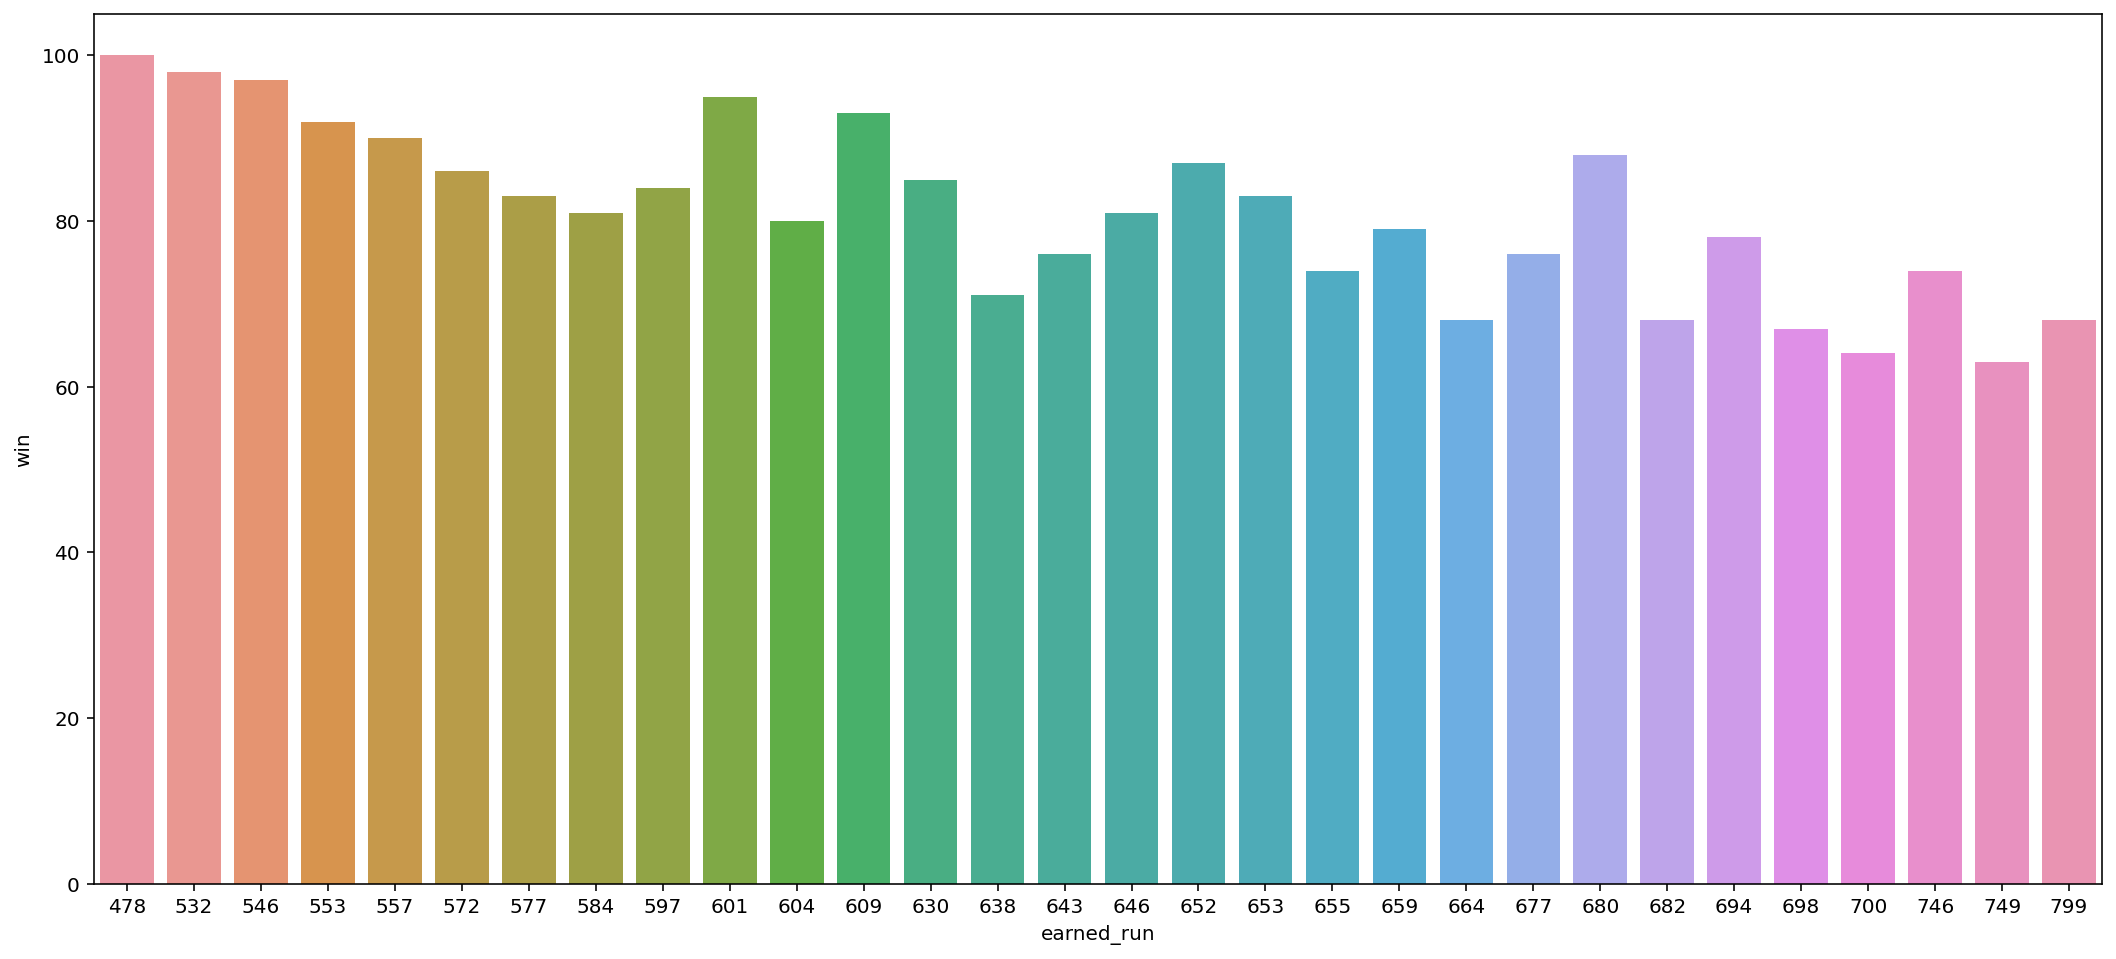

In [78]:
plt.figure(figsize=(18,8))
sns.barplot(x="earned_run", y="win", data=baseball)
plt.show()

#Comparisson with win - decrasing pattern

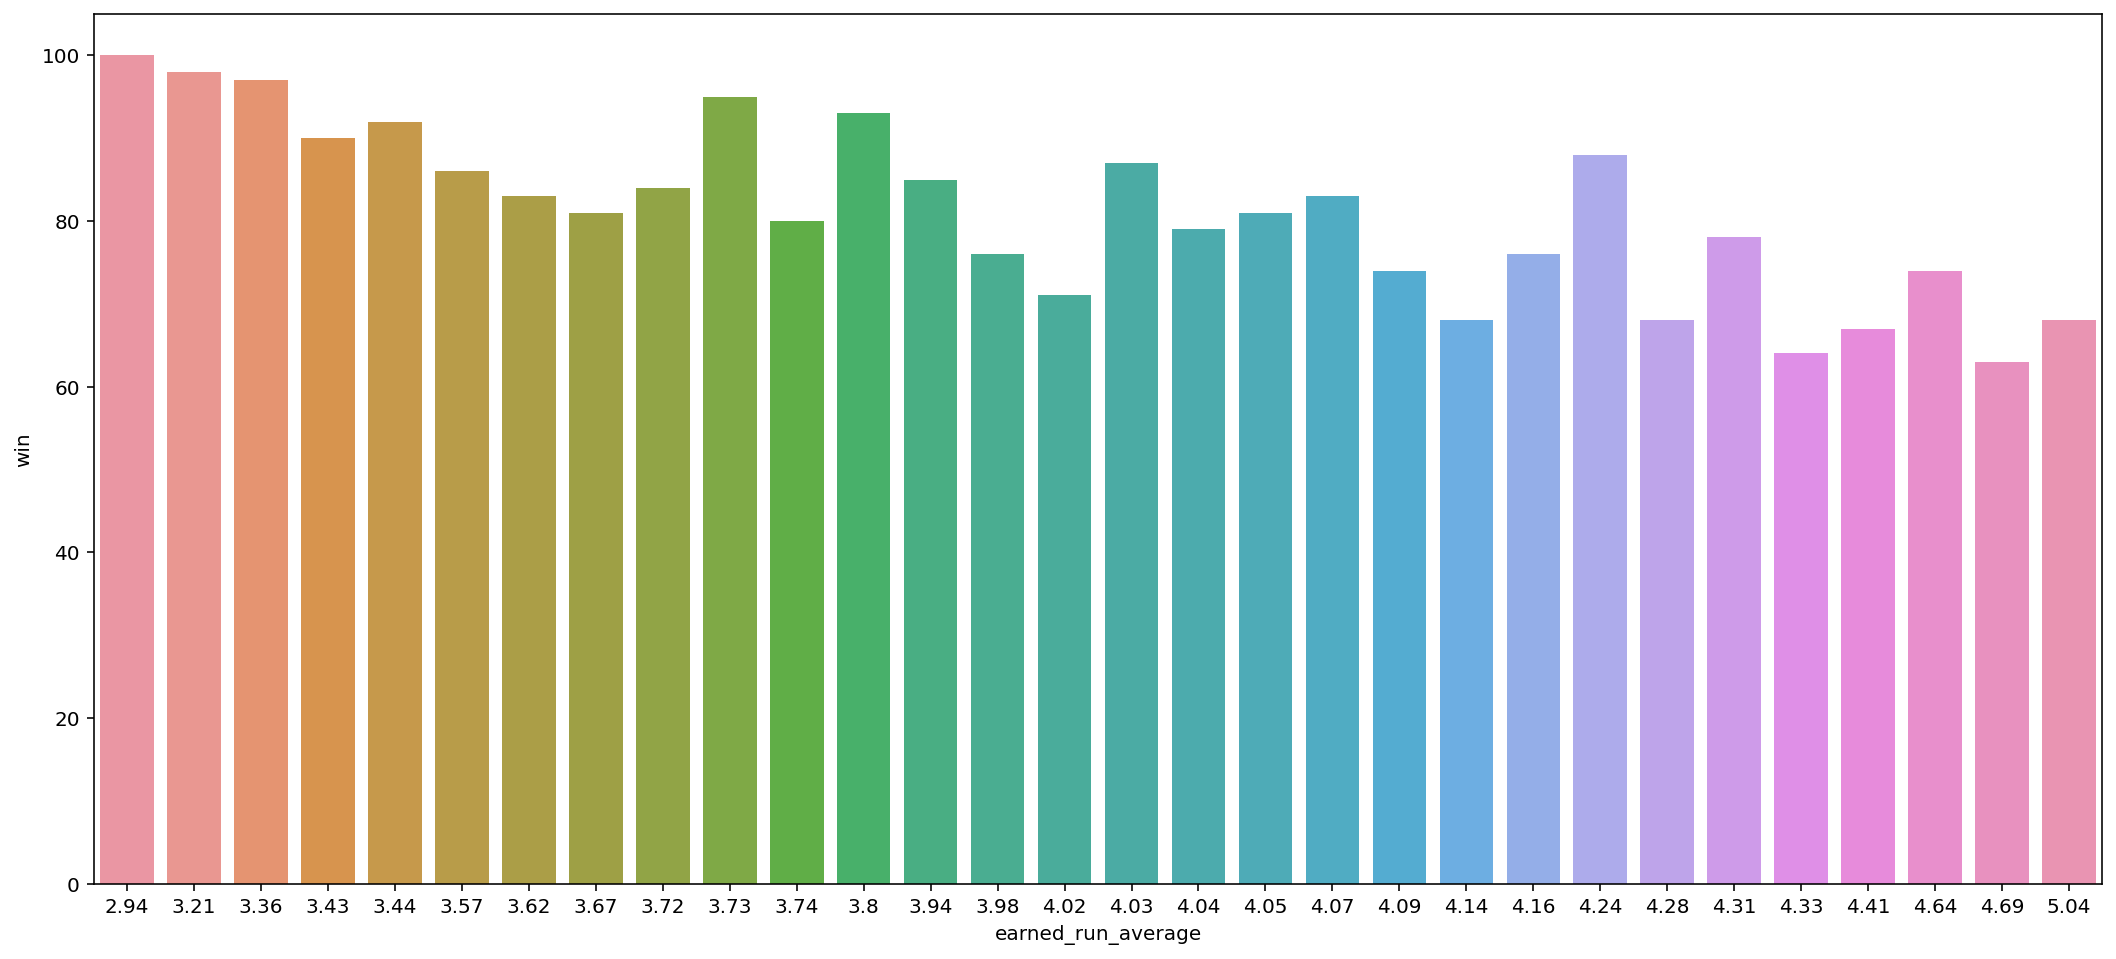

In [77]:
plt.figure(figsize=(18,8))
sns.barplot(x="earned_run_average", y="win", data=baseball)
plt.show()

#Comparisson with win - distributed in slightly decreasing pattern

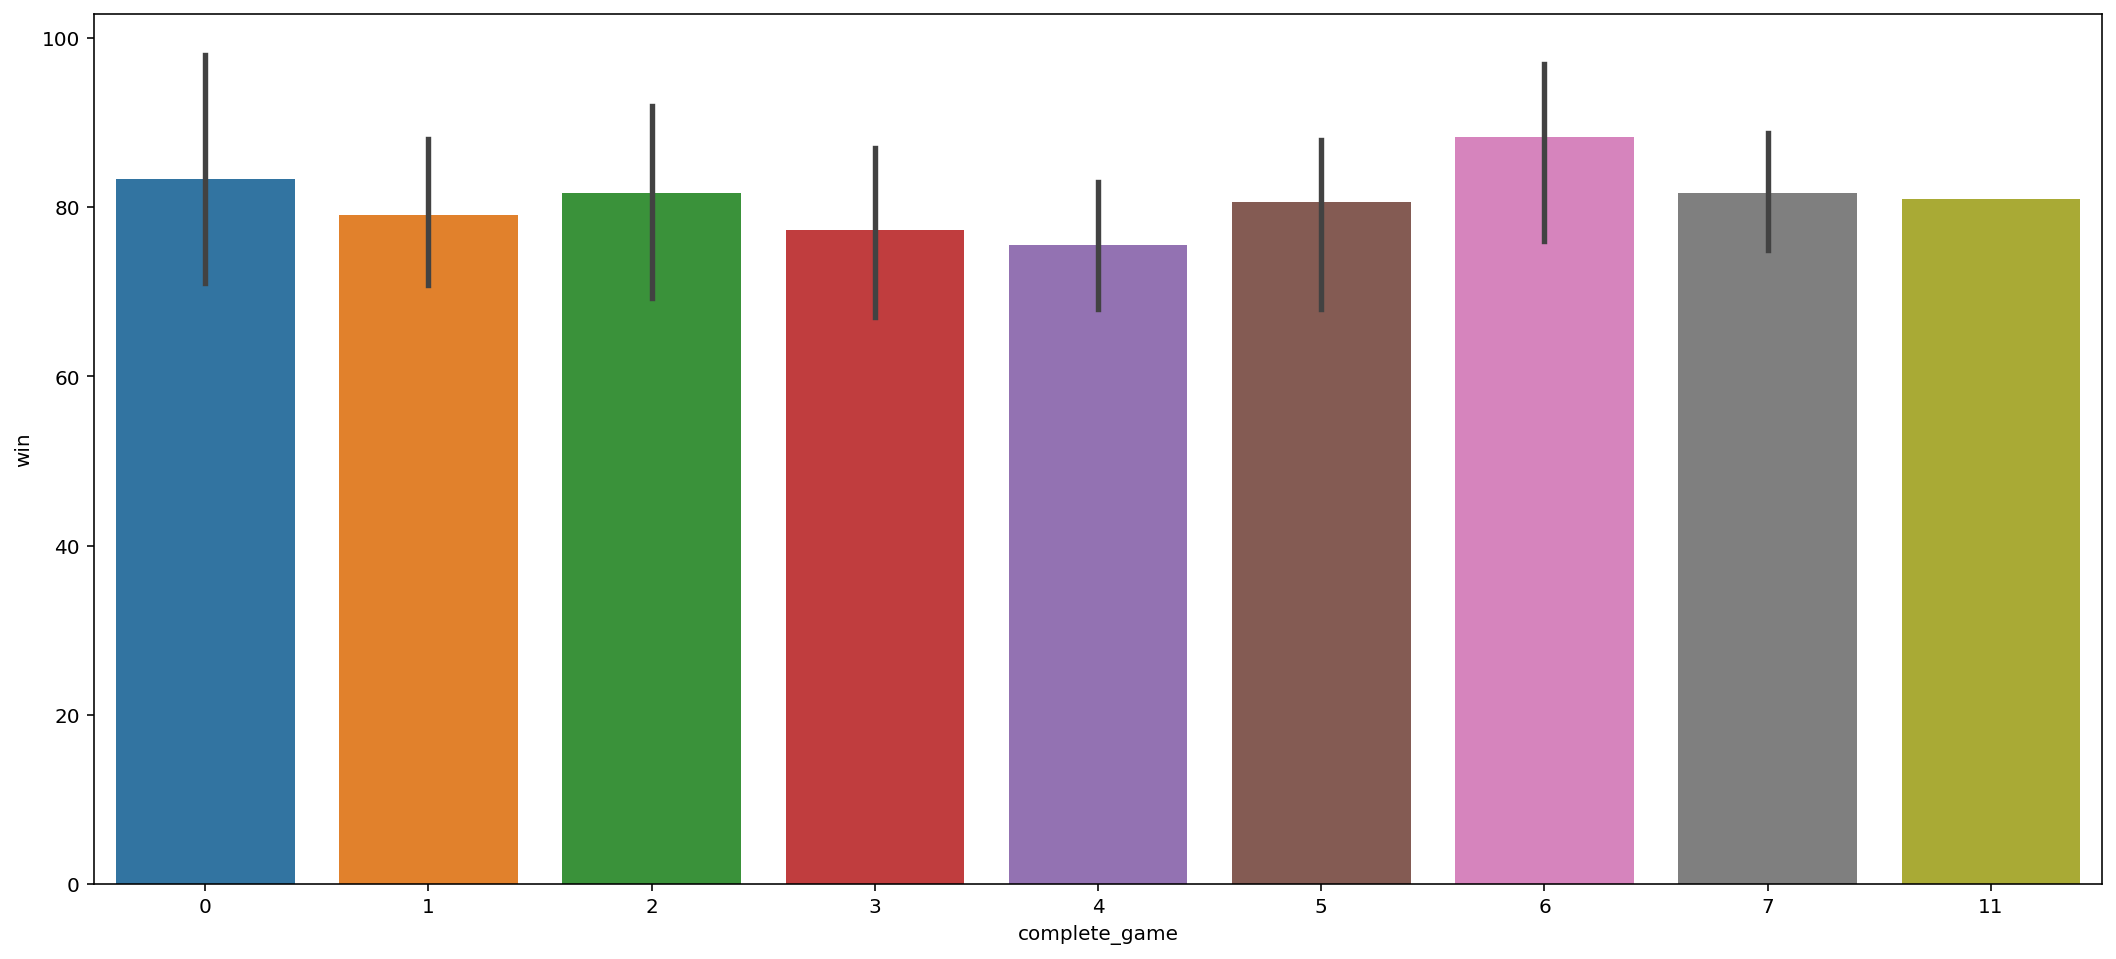

In [76]:
plt.figure(figsize=(18,8))
sns.barplot(x="complete_game", y="win", data=baseball)
plt.show()

#Comparisson with win - No patterns found

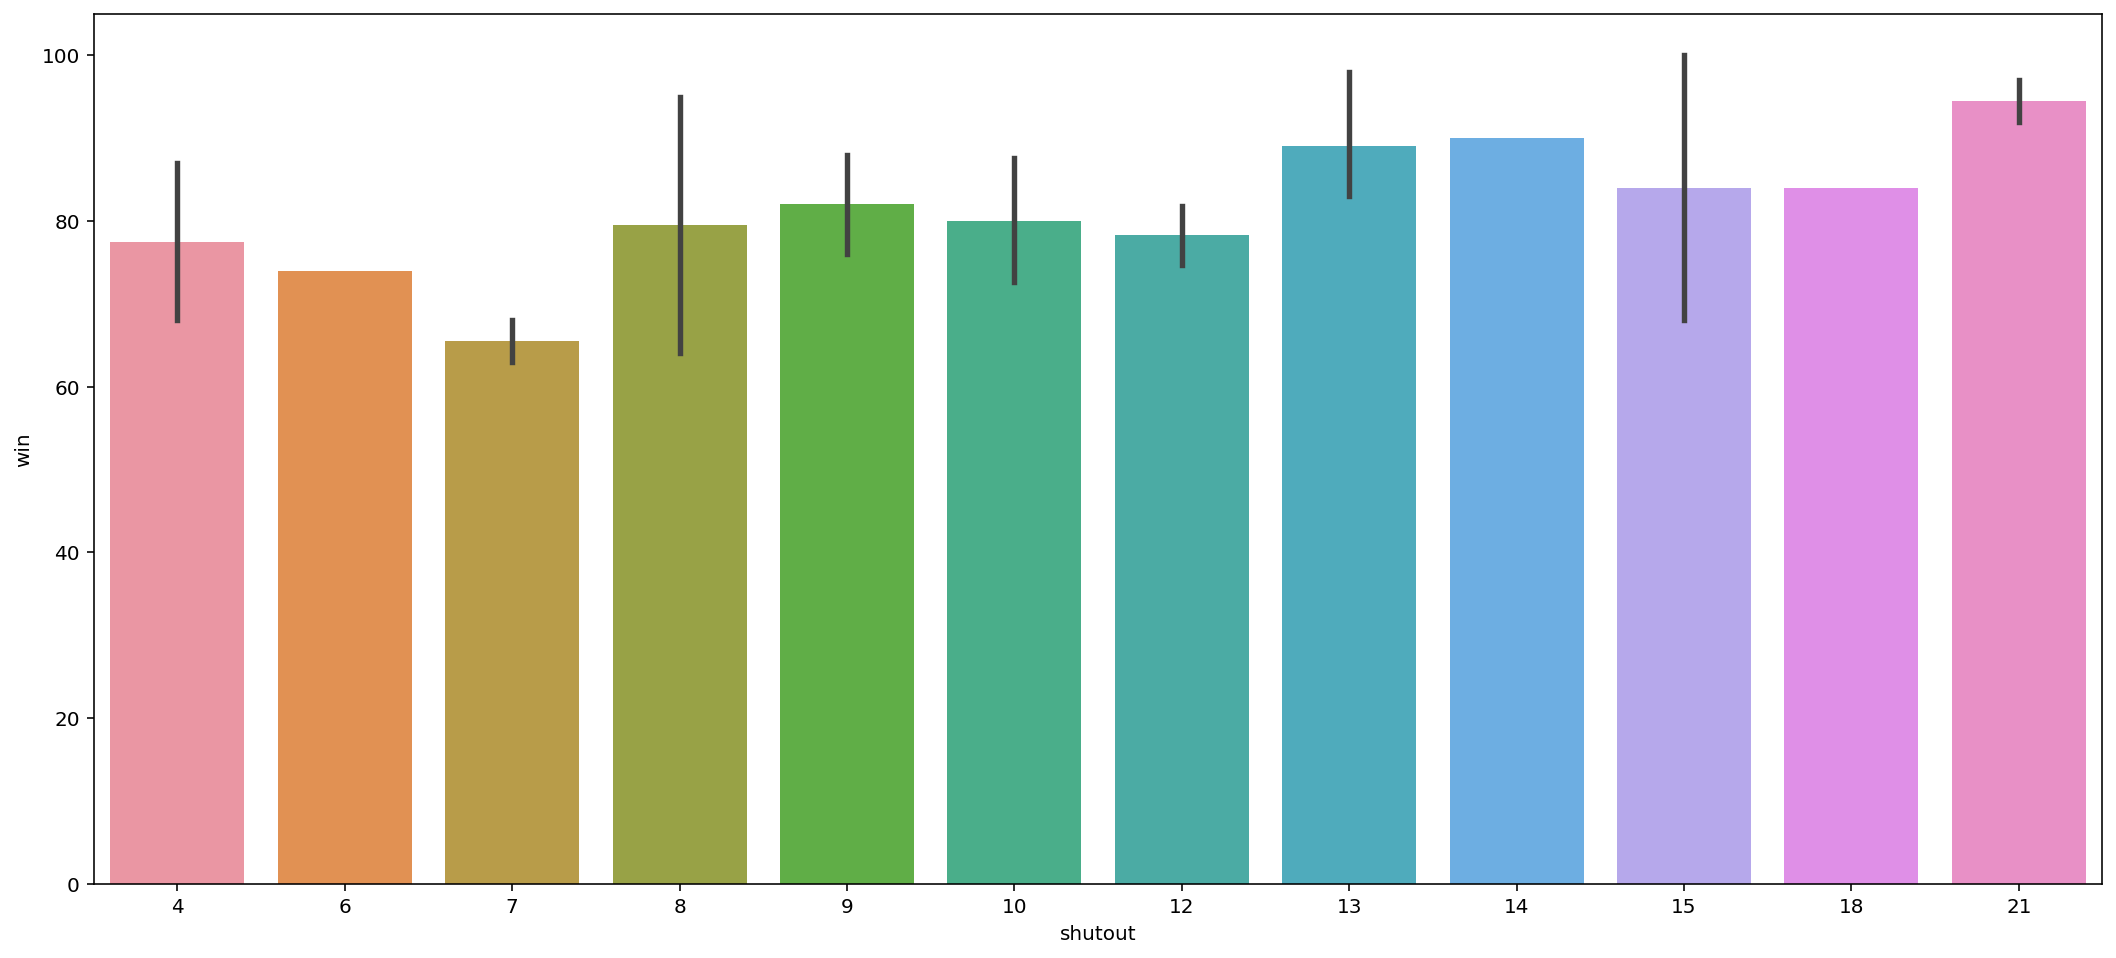

In [75]:
plt.figure(figsize=(18,8))
sns.barplot(x="shutout", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

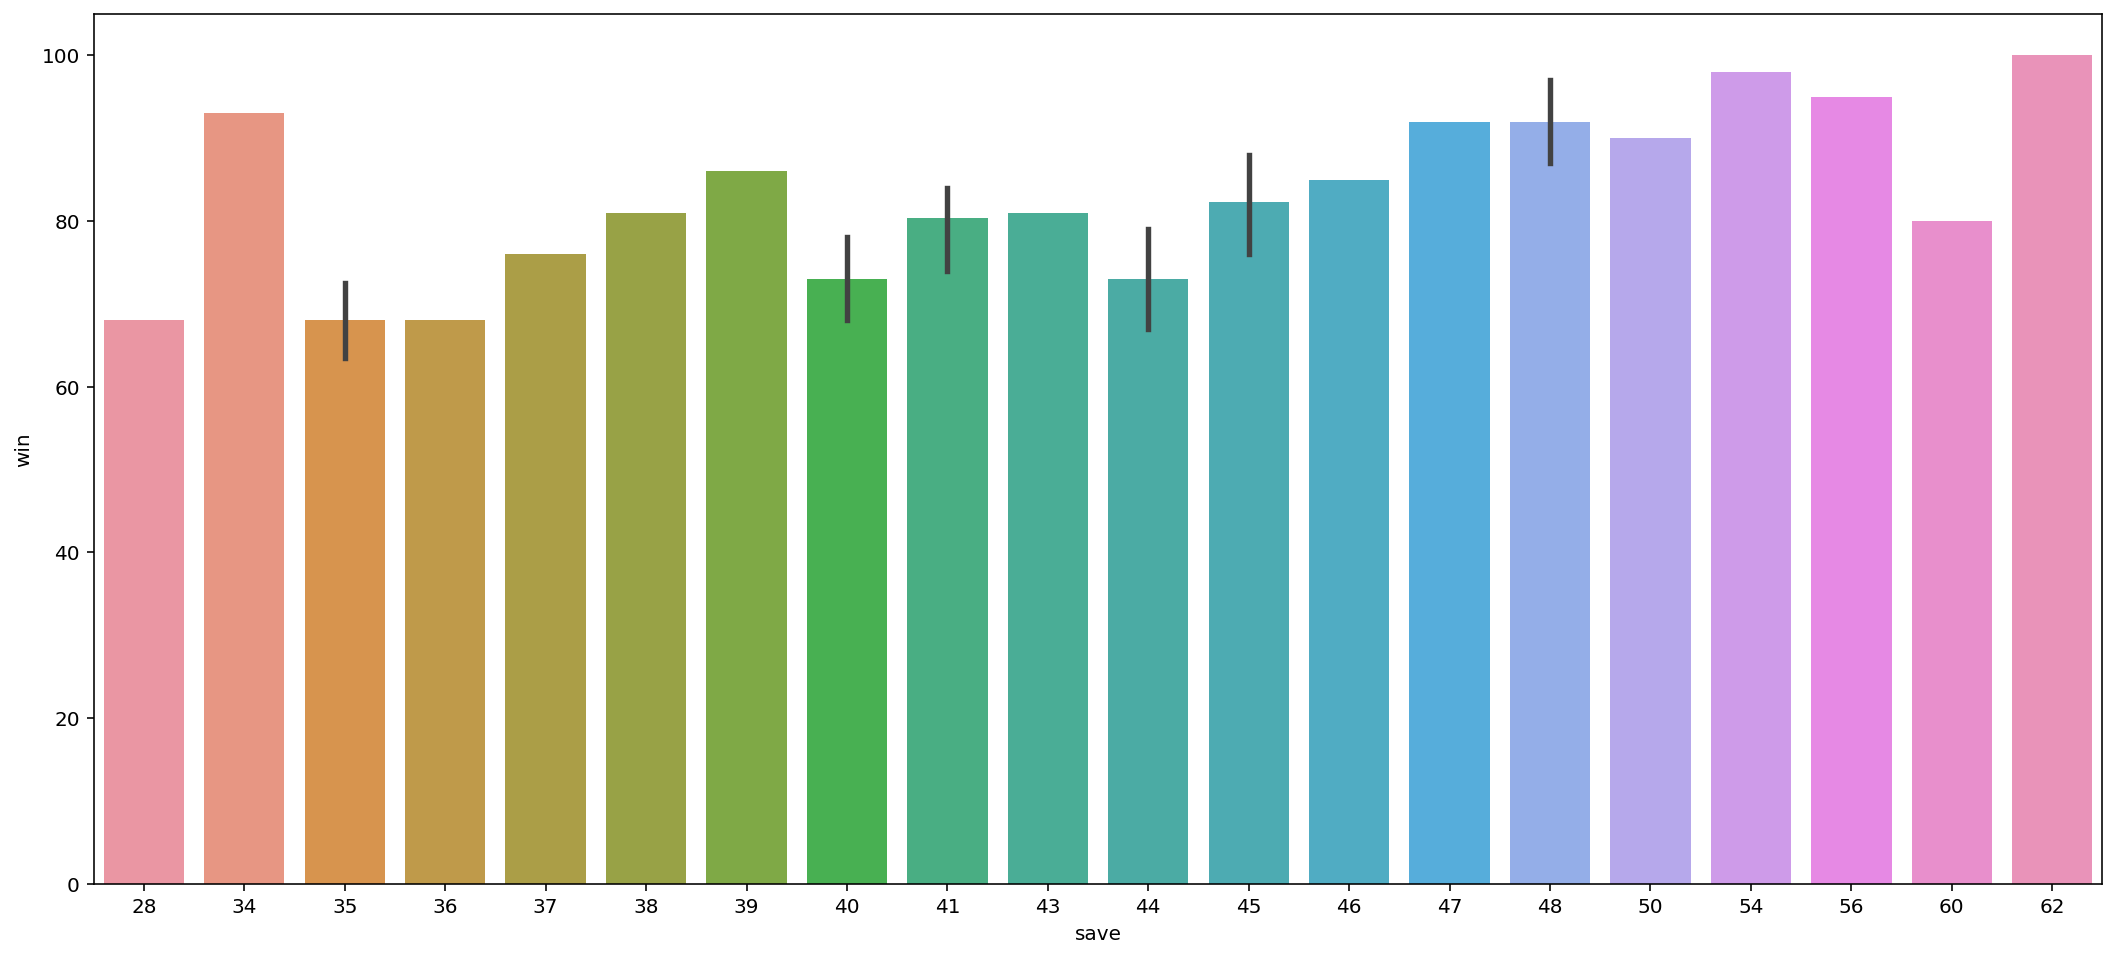

In [74]:
plt.figure(figsize=(18,8))
sns.barplot(x="save", y="win", data=baseball)
plt.show()

#Comparisson with win - slightly increasing pattern

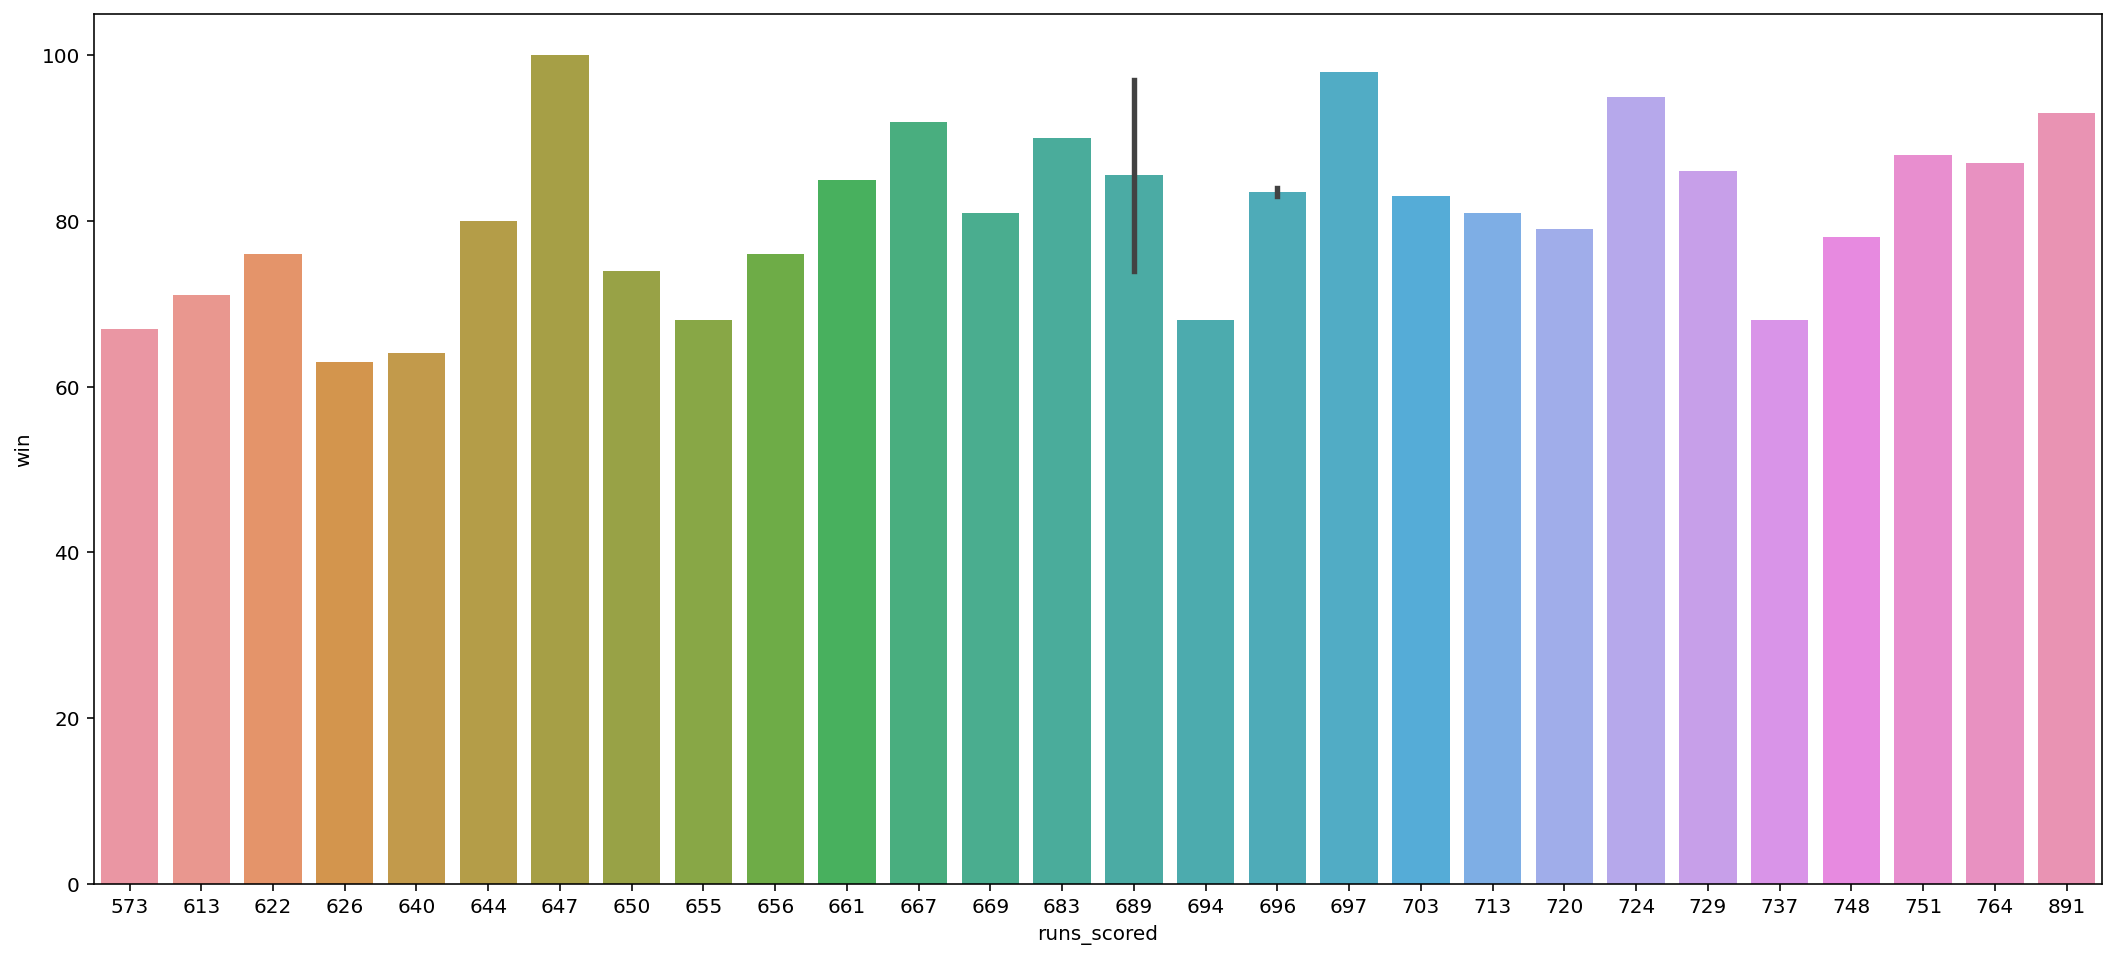

In [73]:
plt.figure(figsize=(18,8))
sns.barplot(x="runs_scored", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

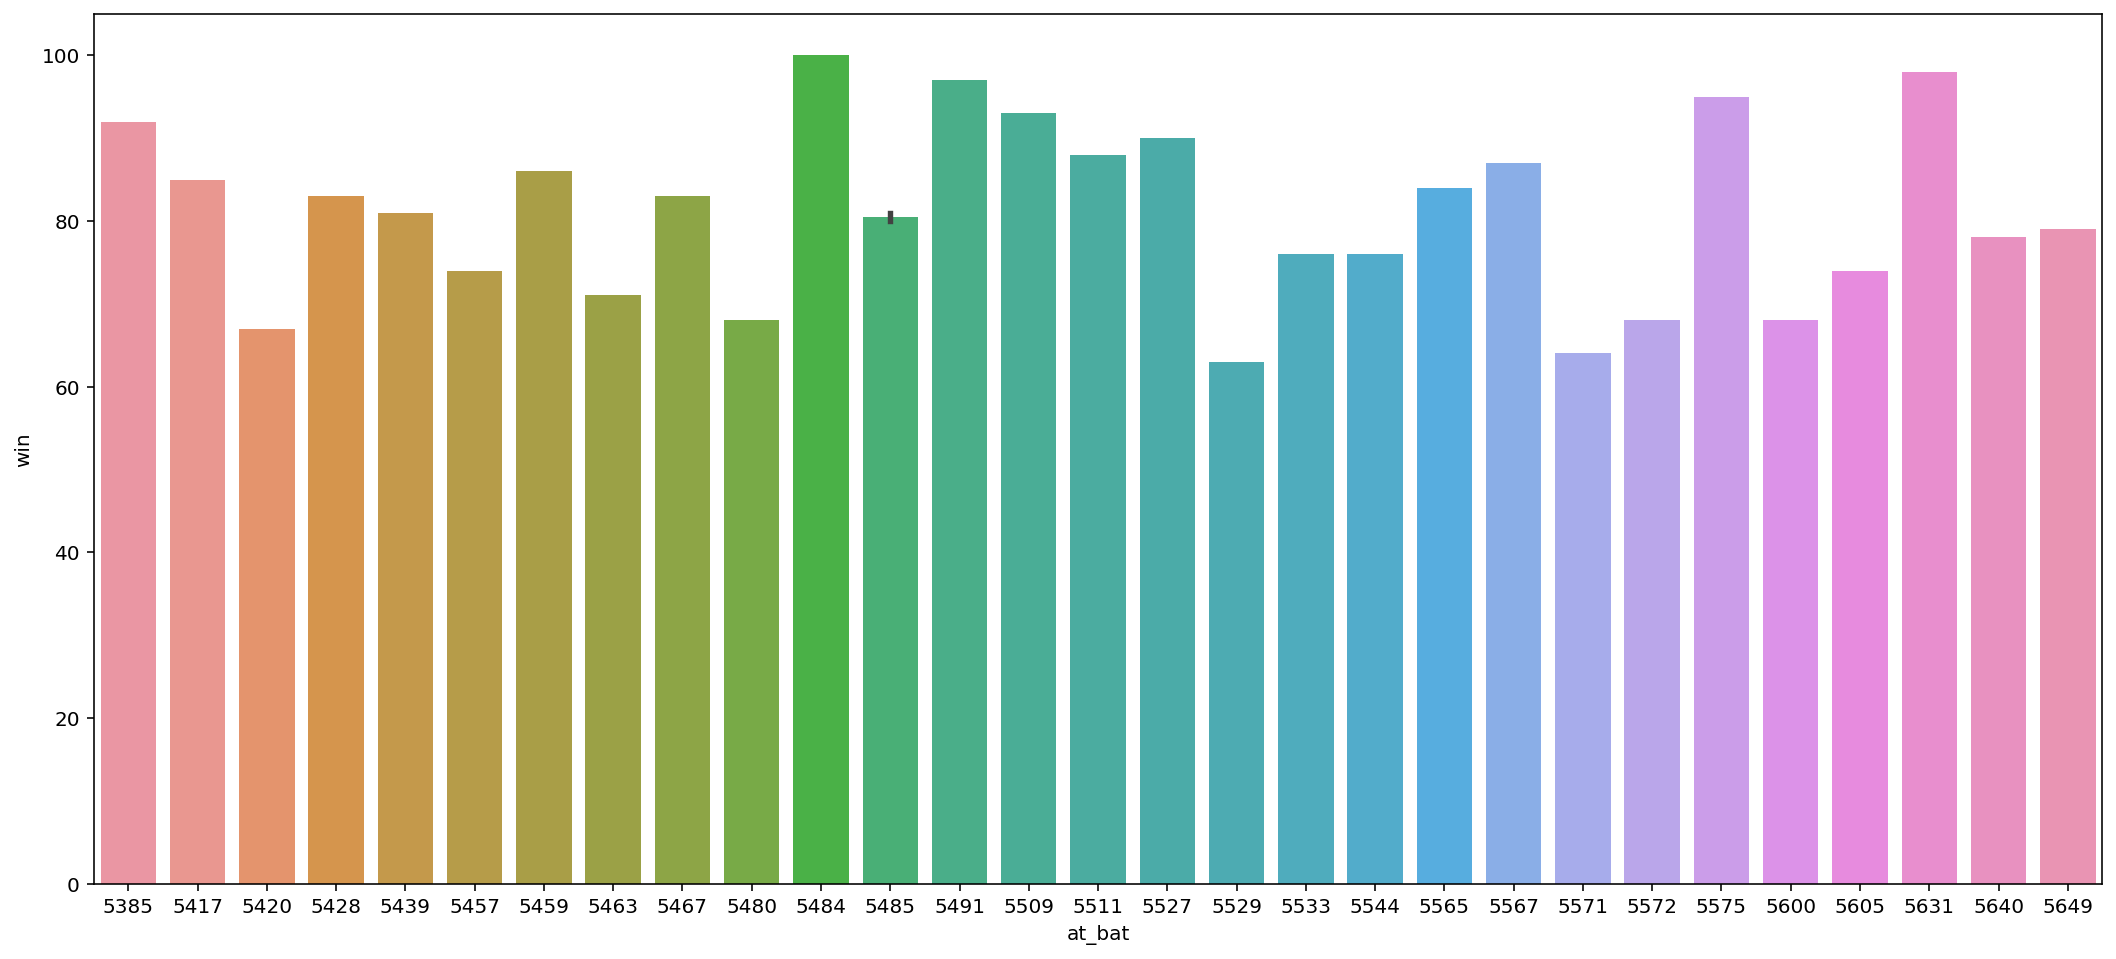

In [72]:
plt.figure(figsize=(18,8))
sns.barplot(x="at_bat", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

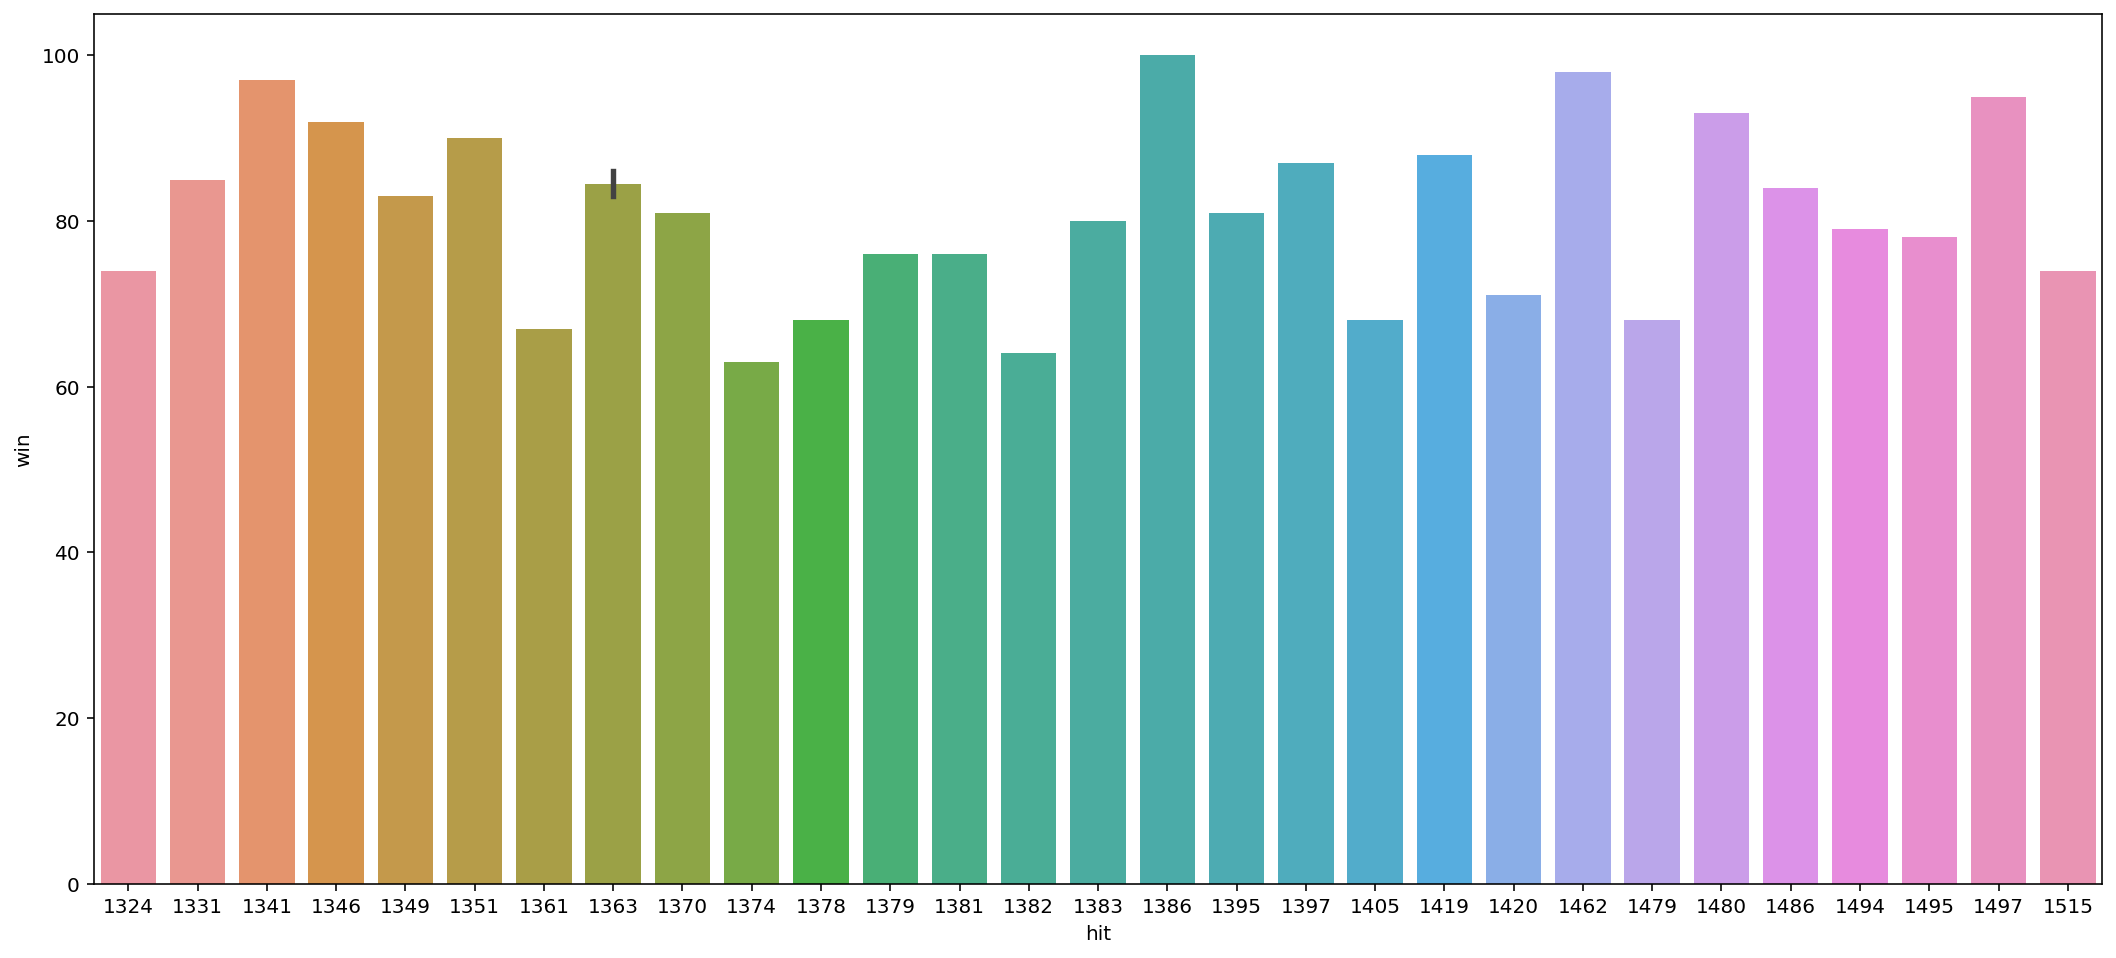

In [80]:
plt.figure(figsize=(18,8))
sns.barplot(x="hit", y="win", data=baseball)
plt.show()

#Comparisson with win - not showing any linear pattern

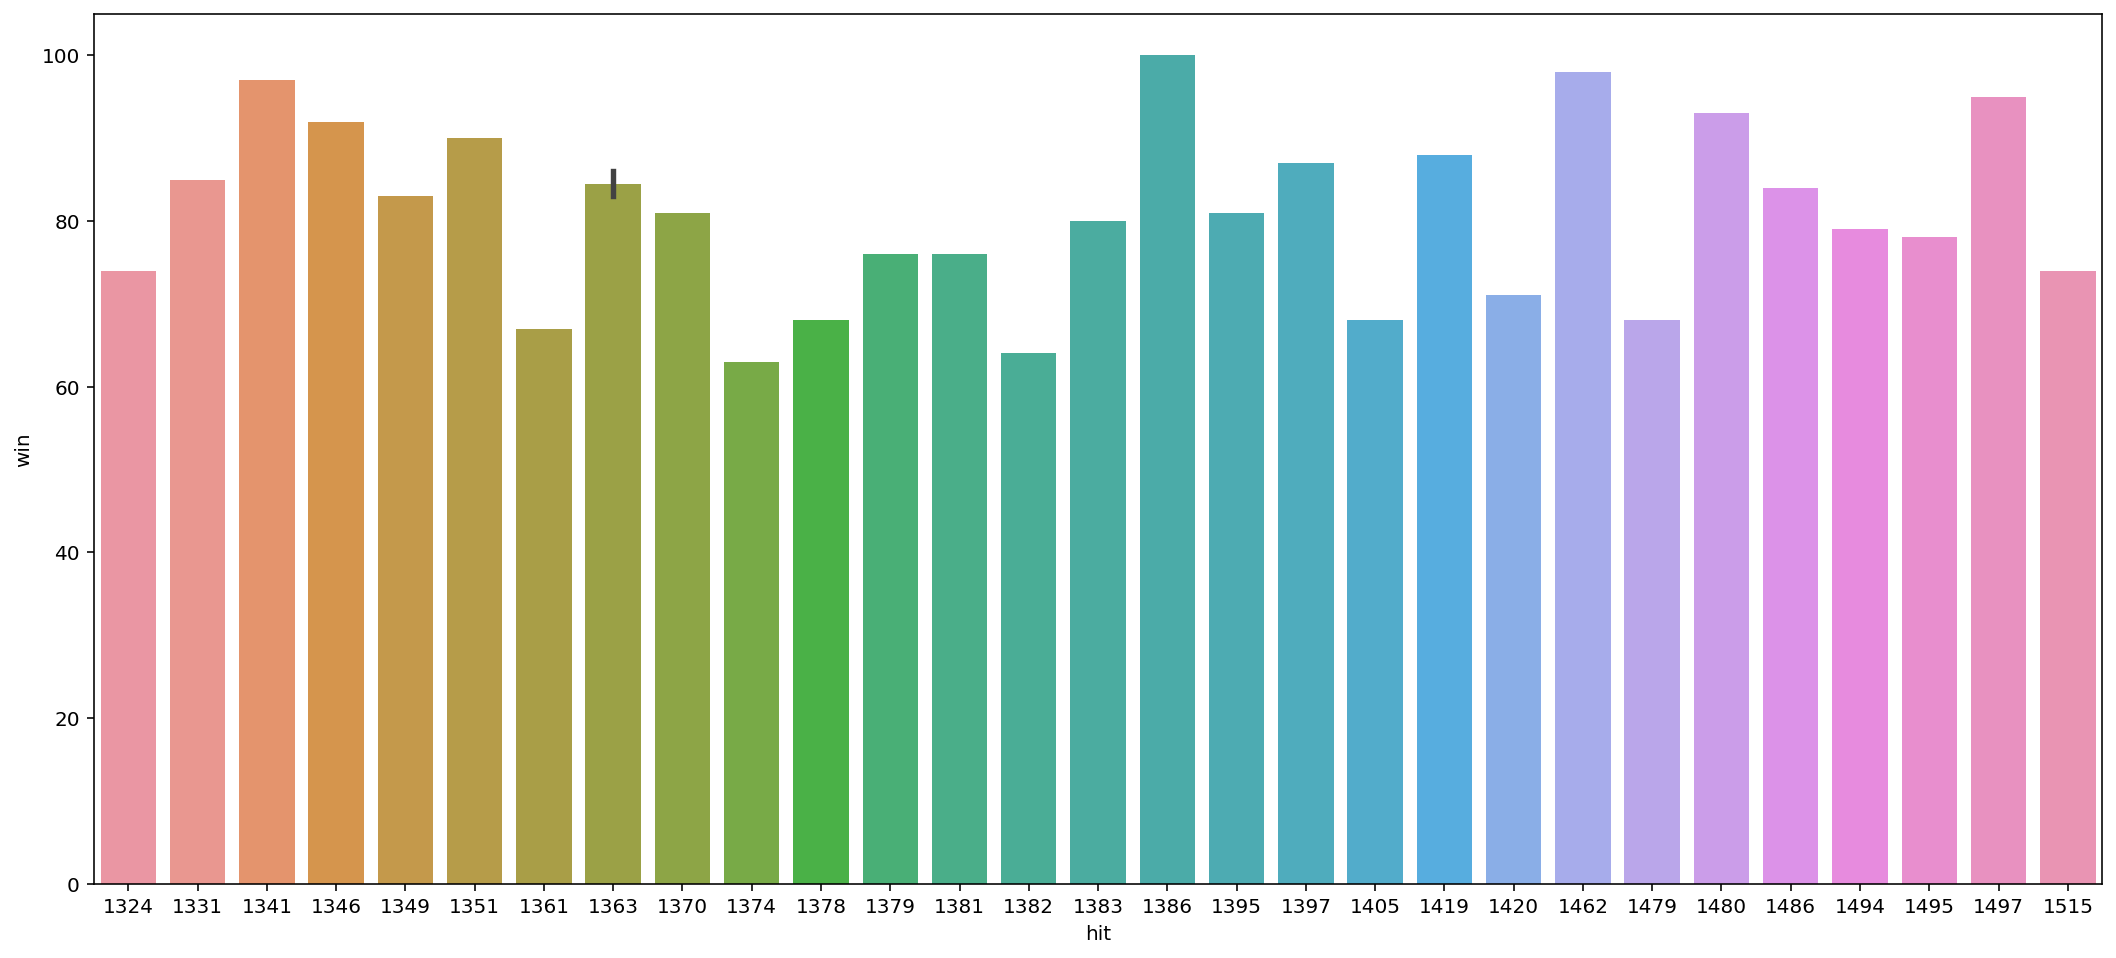

In [81]:
plt.figure(figsize=(18,8))
sns.barplot(x="hit", y="win", data=baseball)
plt.show()

#Comparisson with win - not showing any linear pattern

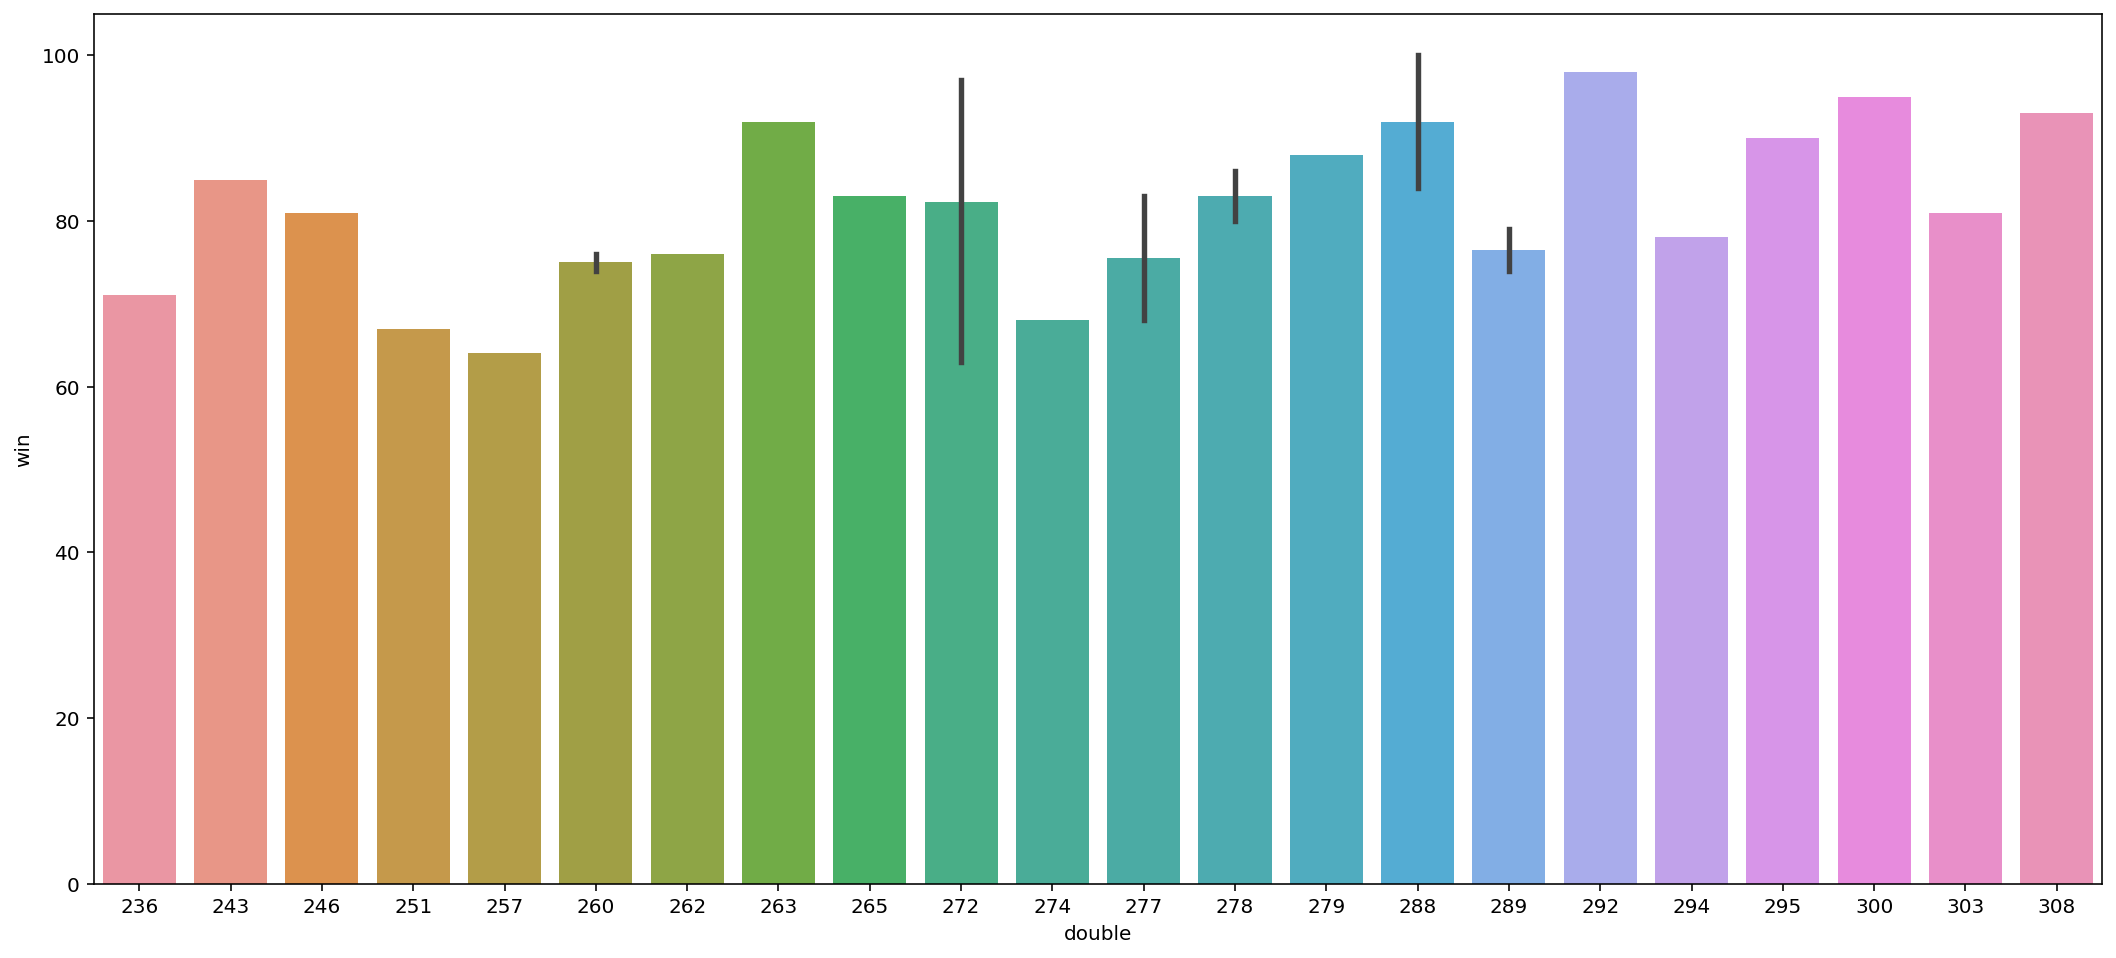

In [83]:
plt.figure(figsize=(18,8))
sns.barplot(x="double", y="win", data=baseball)
plt.show()

#Comparisson with win - not forming any clearly defined pattern

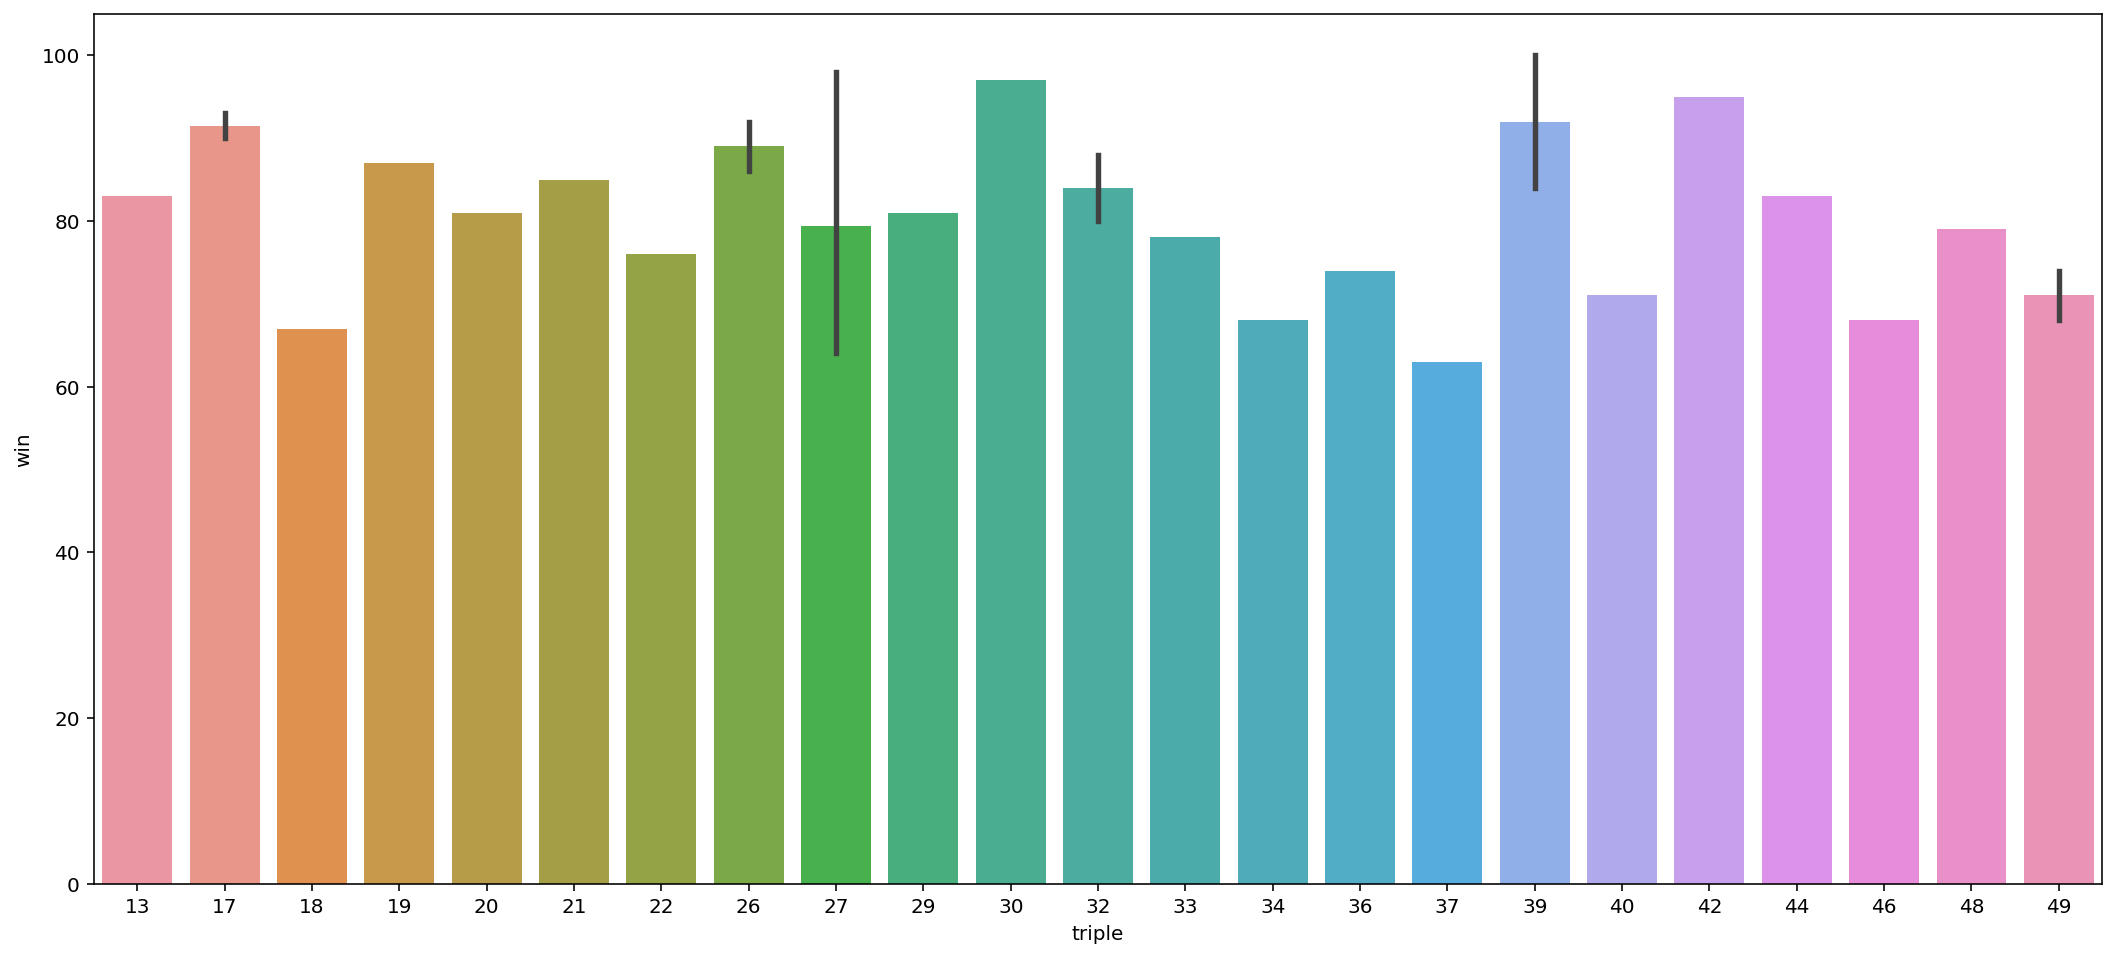

In [84]:
plt.figure(figsize=(18,8))
sns.barplot(x="triple", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

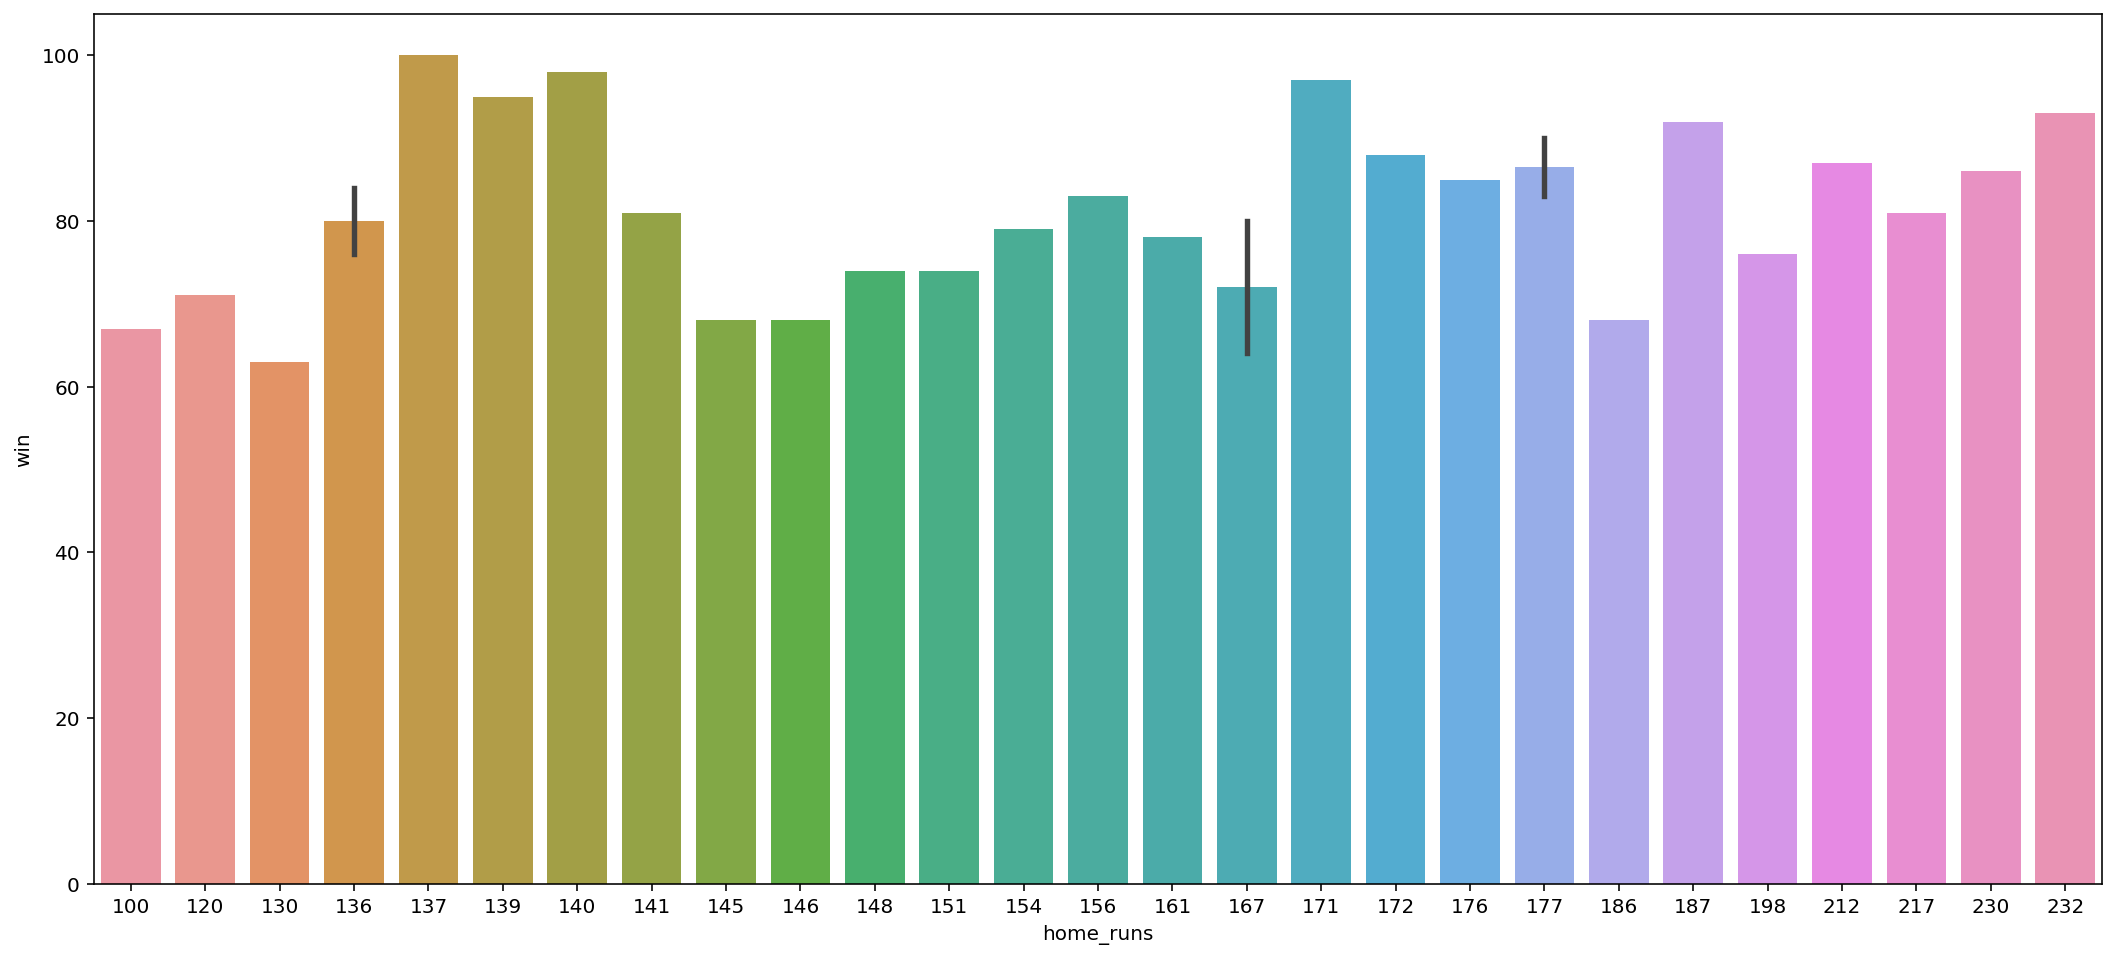

In [85]:
plt.figure(figsize=(18,8))
sns.barplot(x="home_runs", y="win", data=baseball)
plt.show()

#Comparisson with win - no visible pattern found

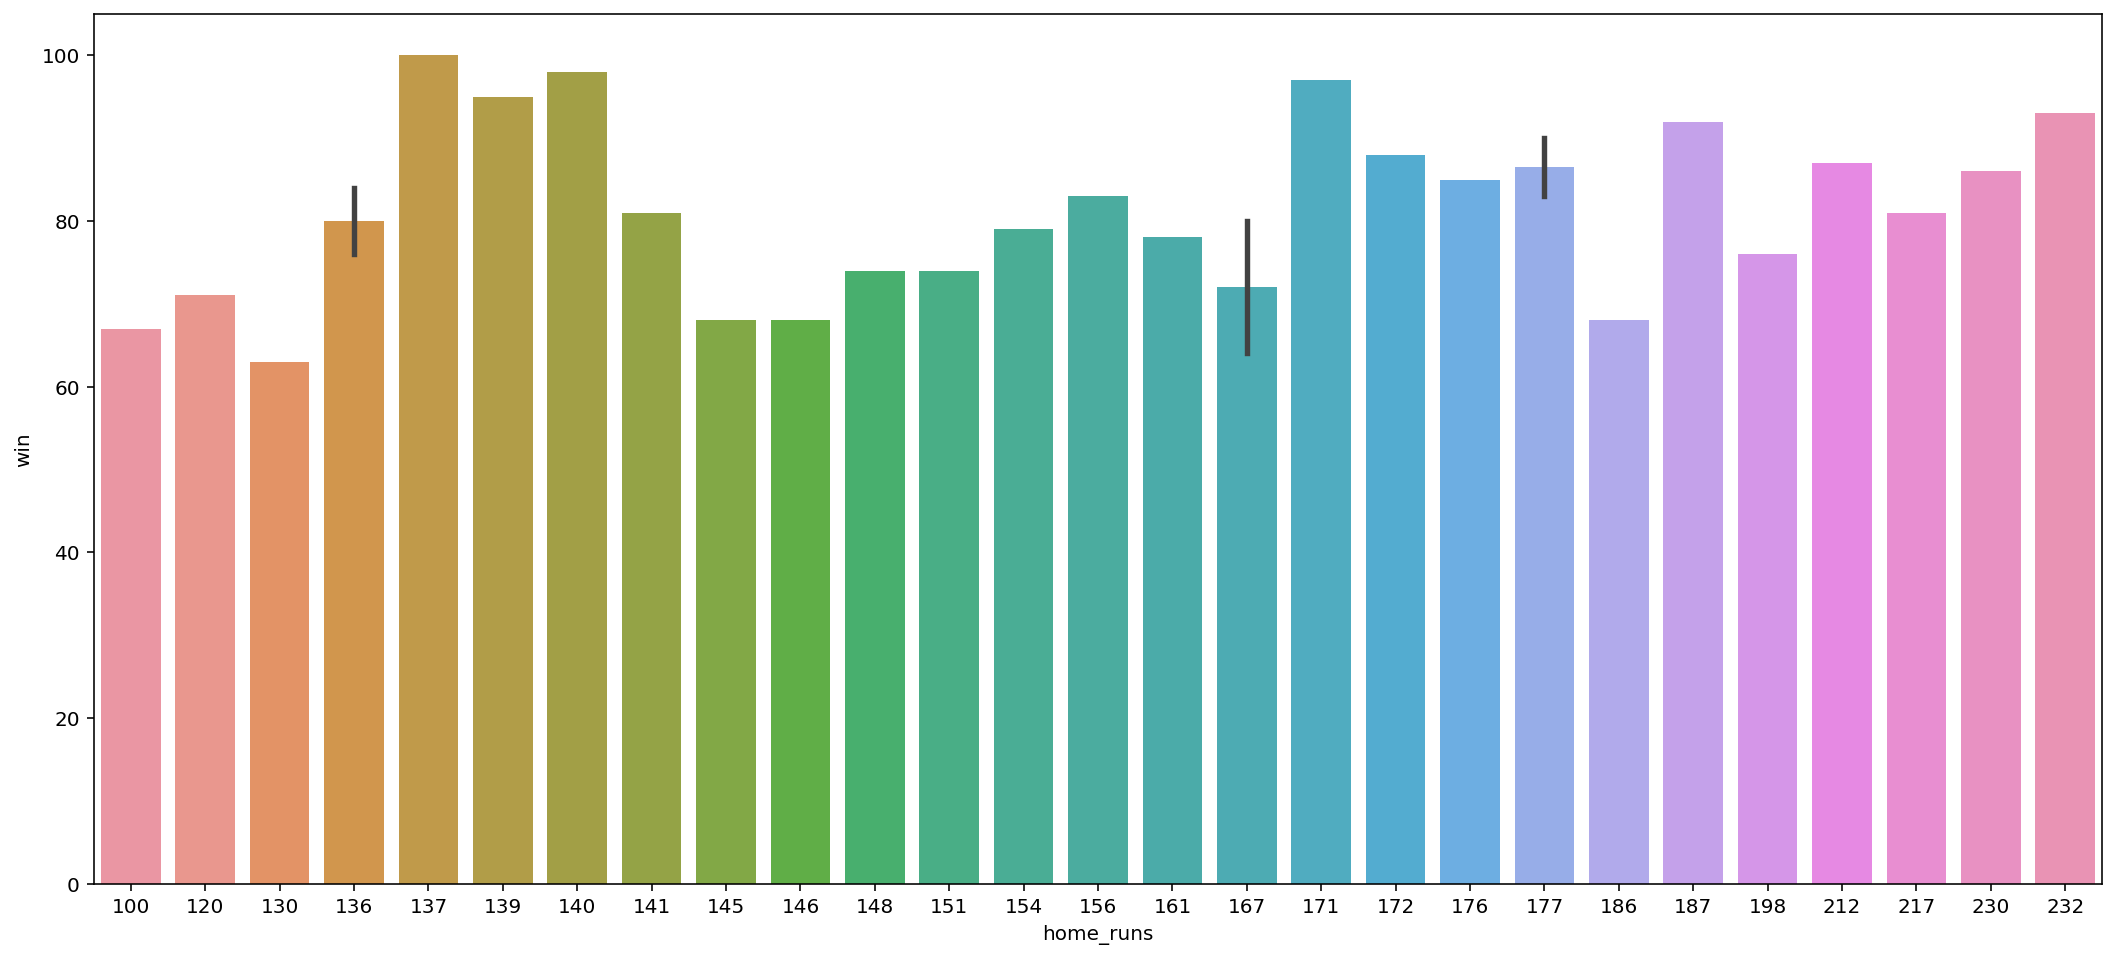

In [86]:
plt.figure(figsize=(18,8))
sns.barplot(x="home_runs", y="win", data=baseball)
plt.show()

#Comparisson with win - No visible pattern

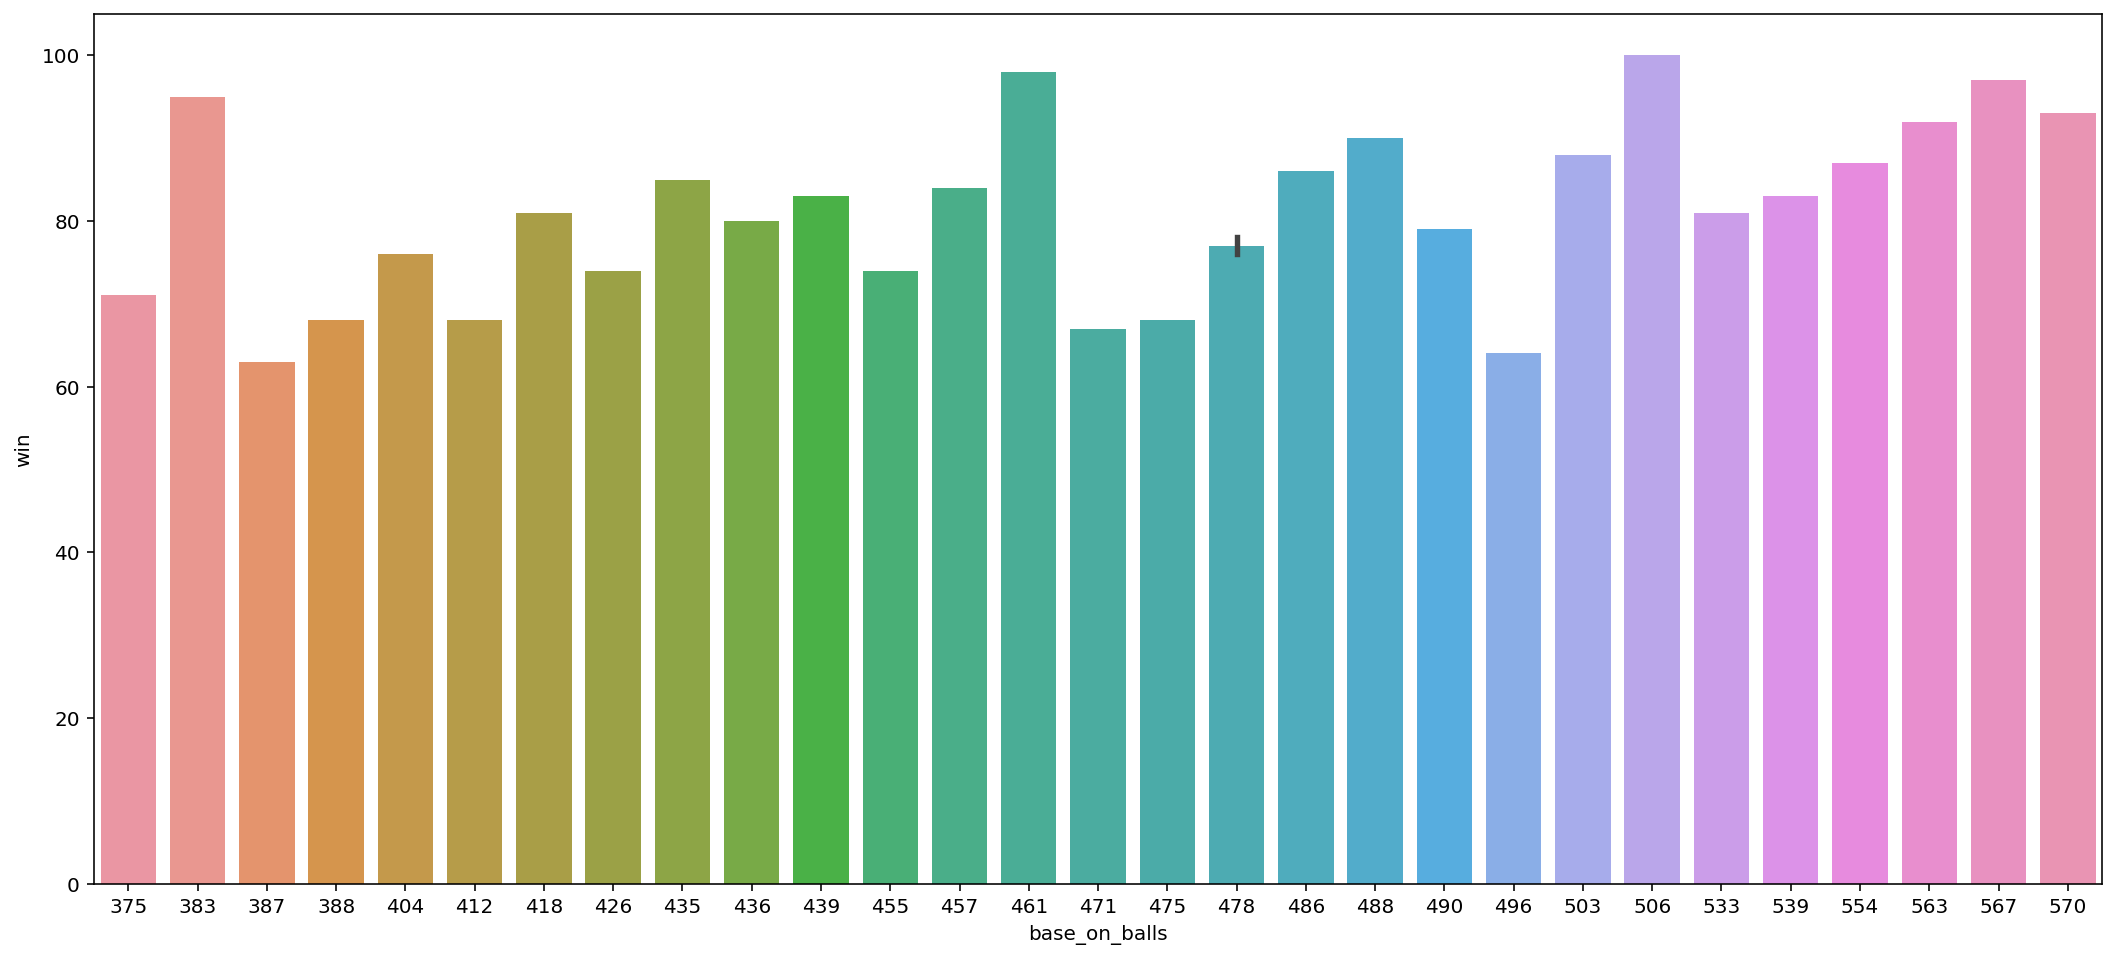

In [87]:
plt.figure(figsize=(18,8))
sns.barplot(x="base_on_balls", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

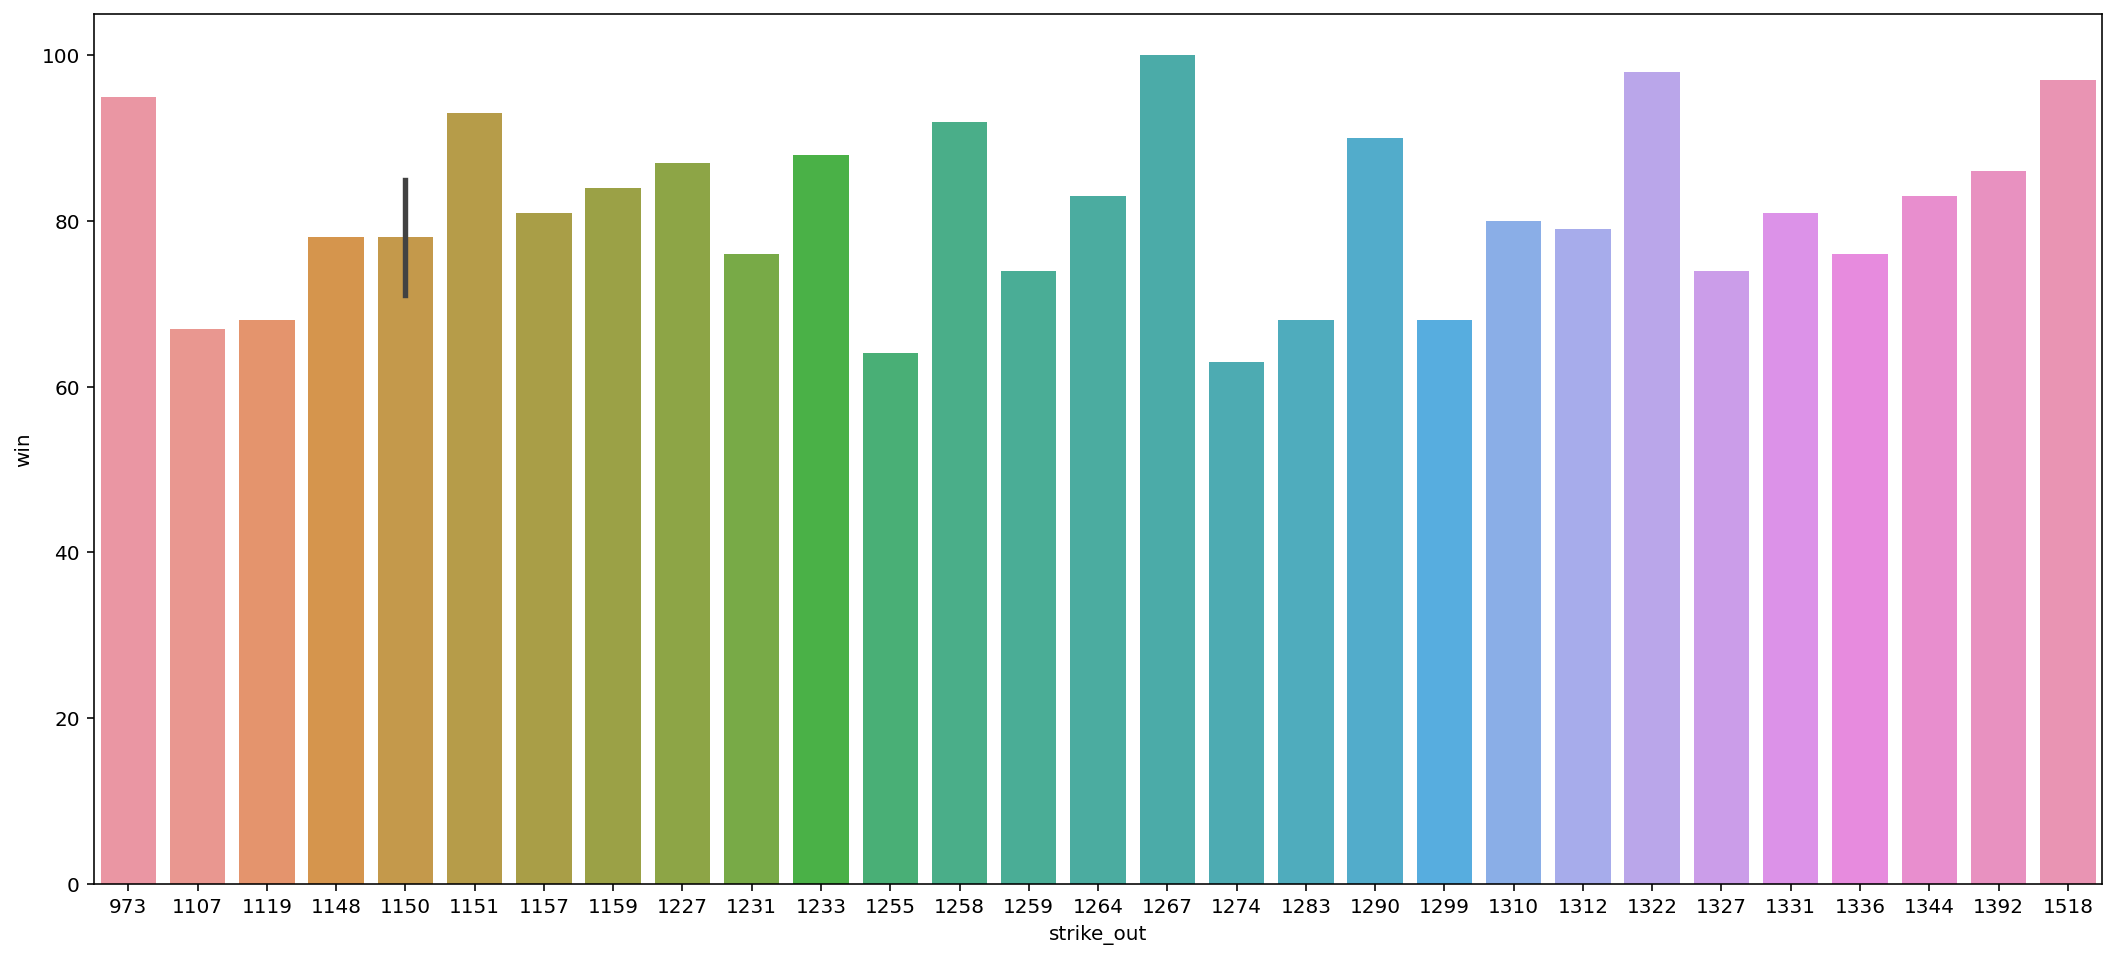

In [88]:
plt.figure(figsize=(18,8))
sns.barplot(x="strike_out", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly patterned

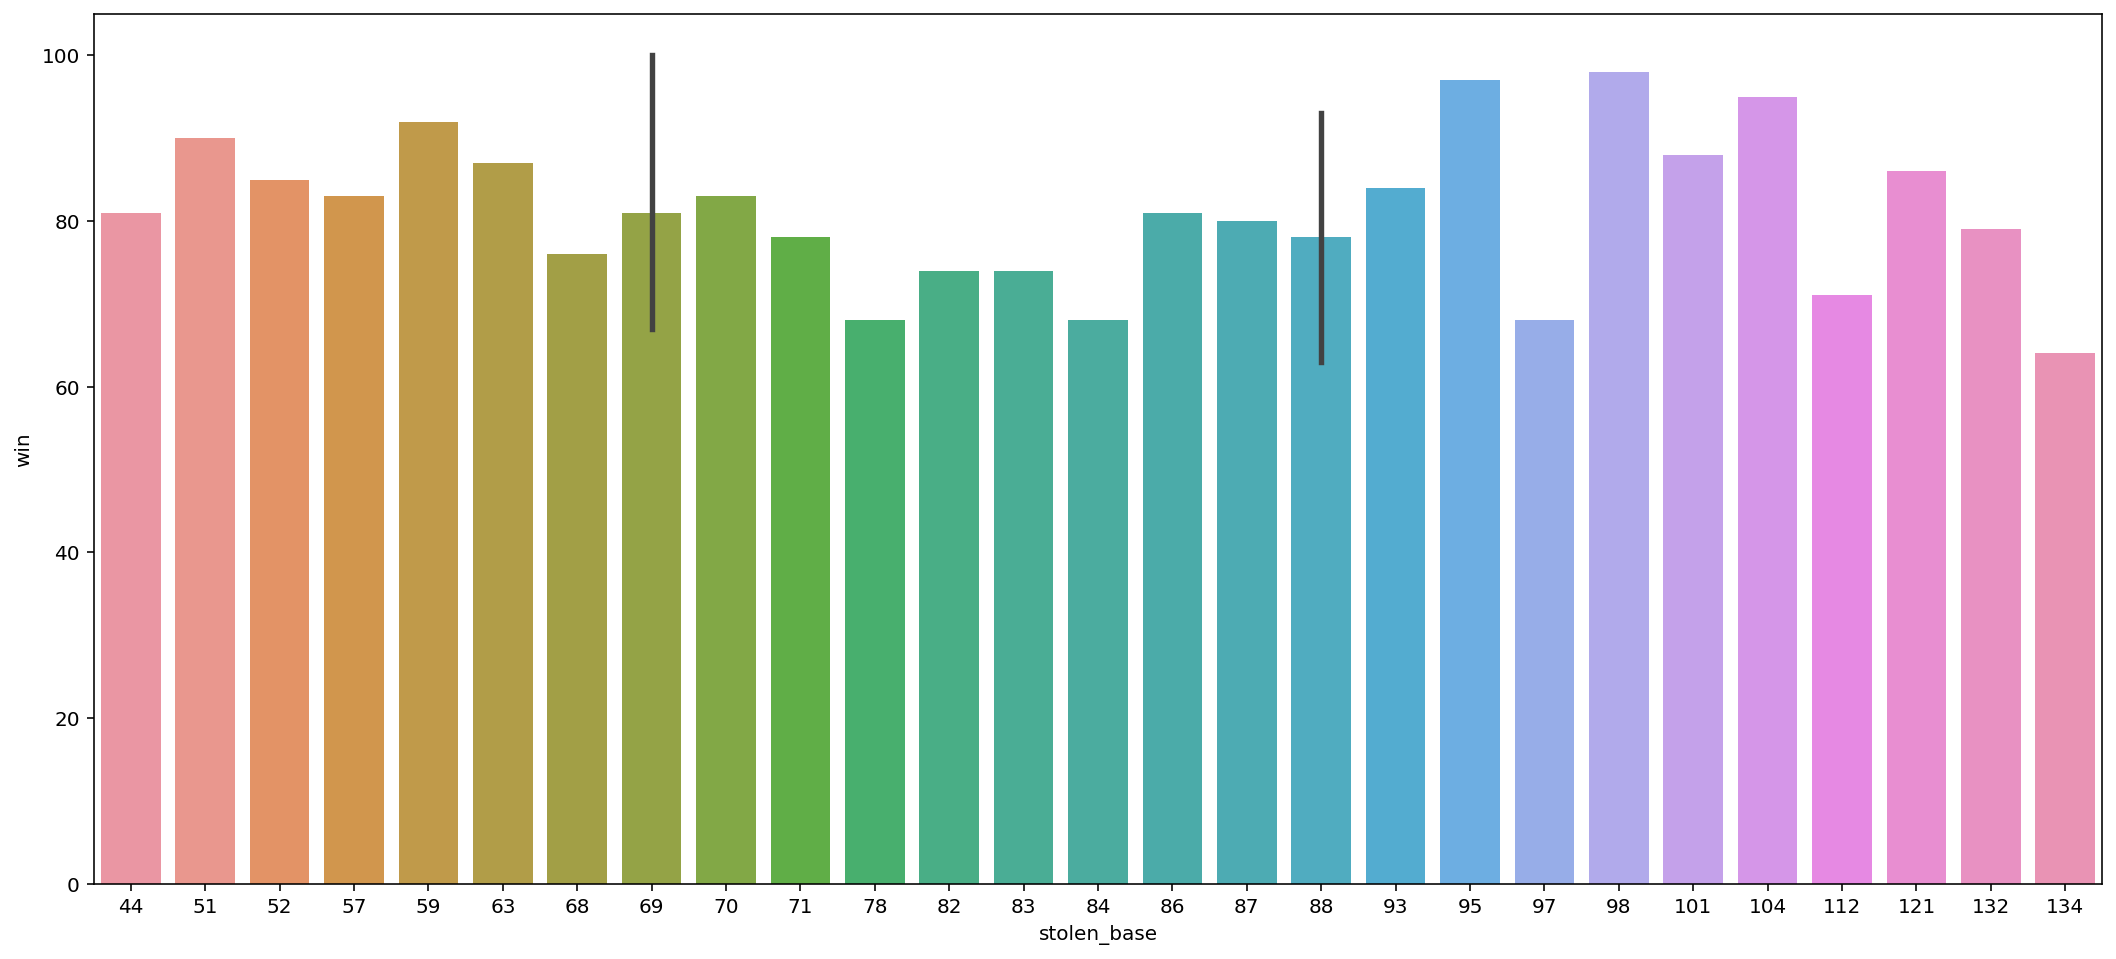

In [89]:
plt.figure(figsize=(18,8))
sns.barplot(x="stolen_base", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

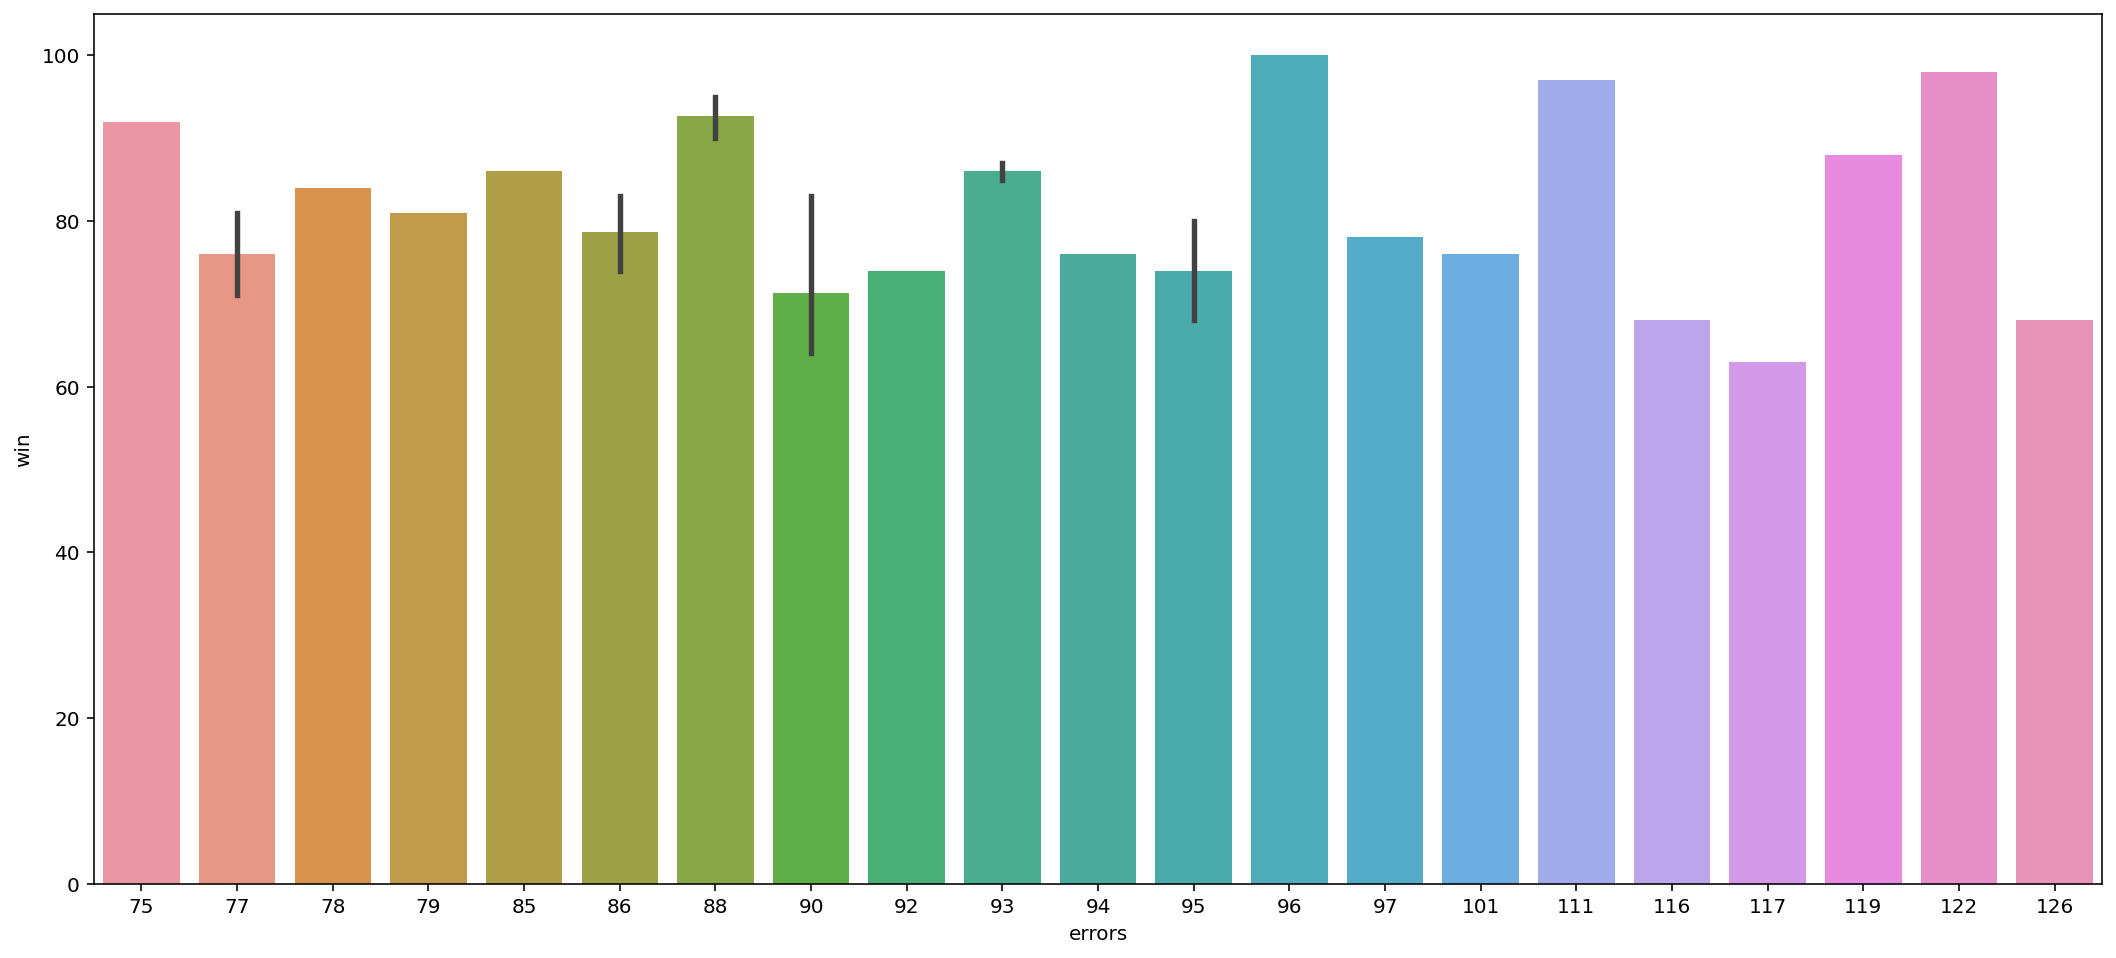

In [90]:
plt.figure(figsize=(18,8))
sns.barplot(x="errors", y="win", data=baseball)
plt.show()

#Comparisson with win - unevenly distributed

In [ ]:
#Join Plot

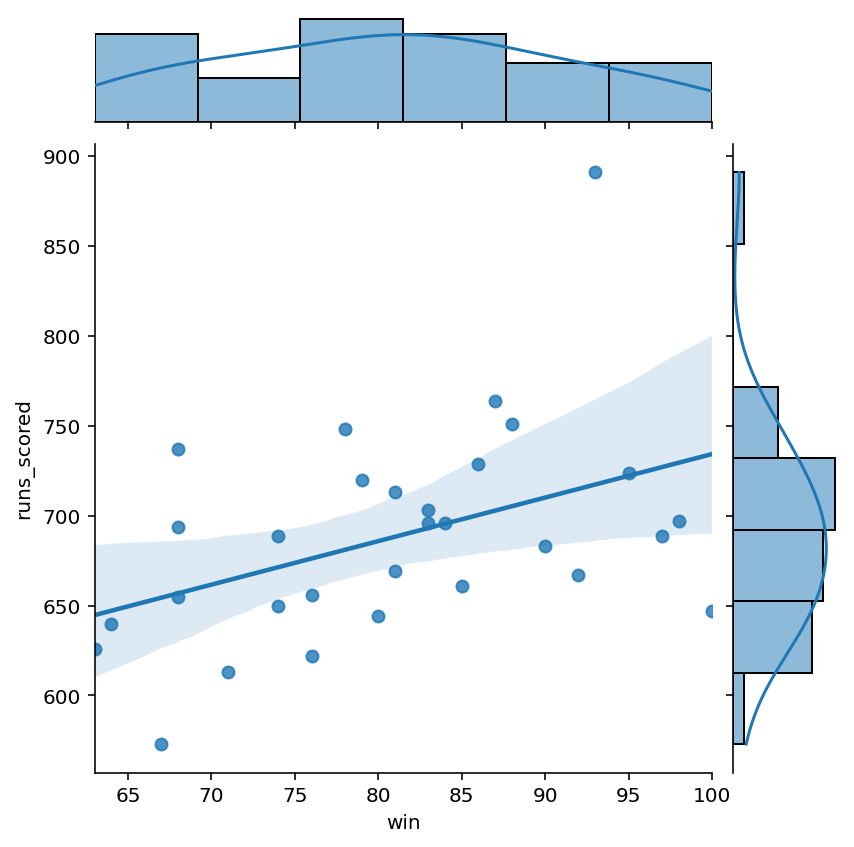

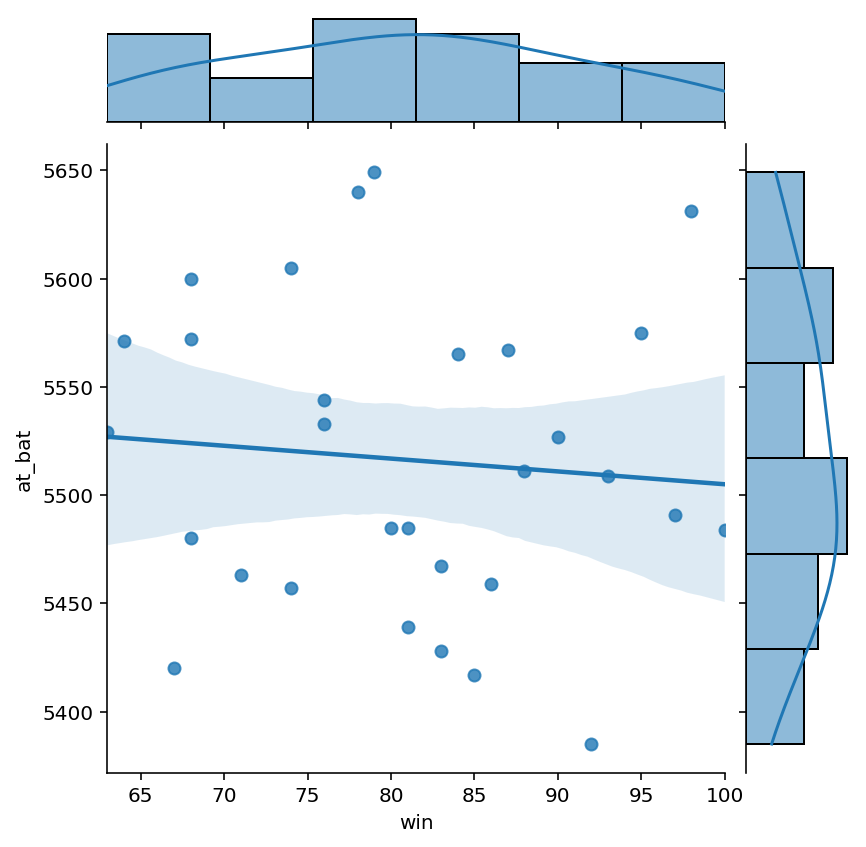

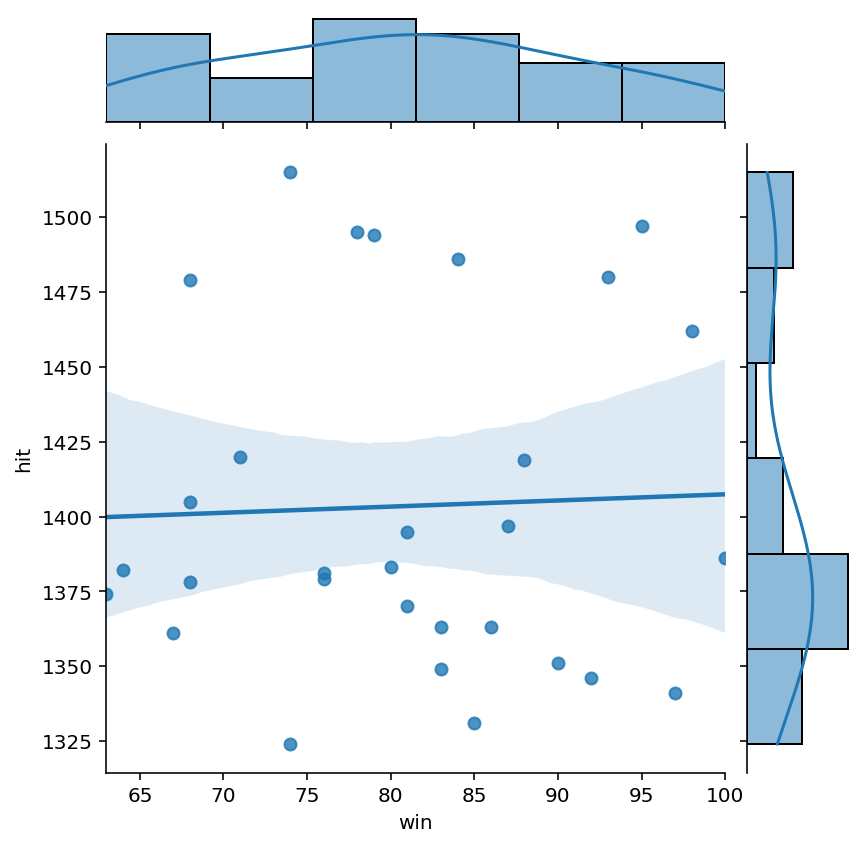

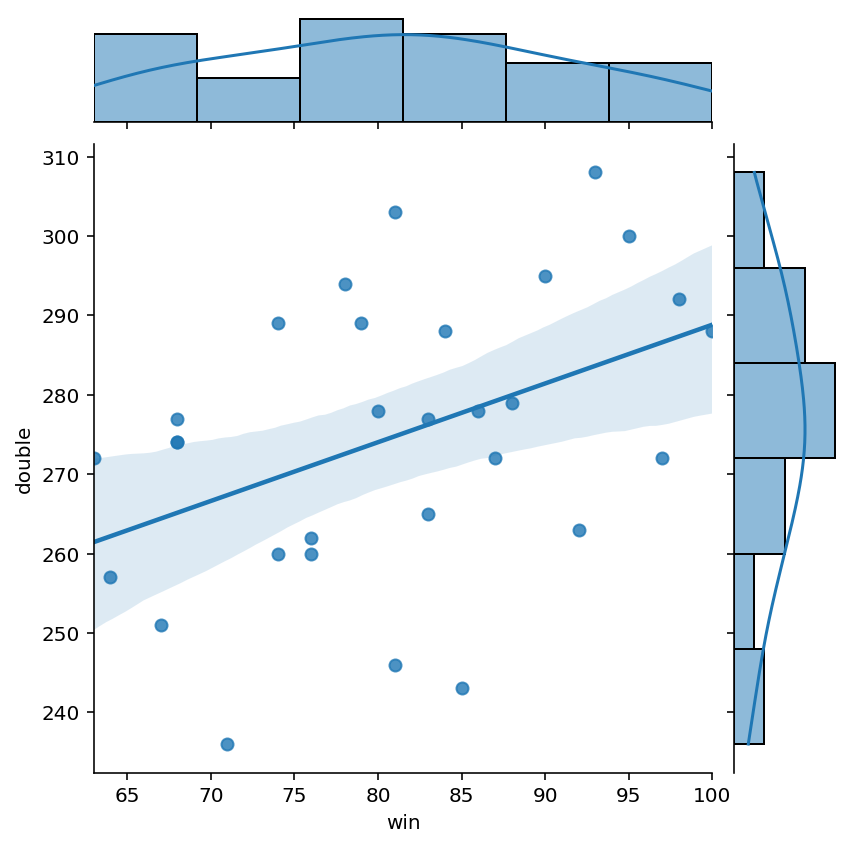

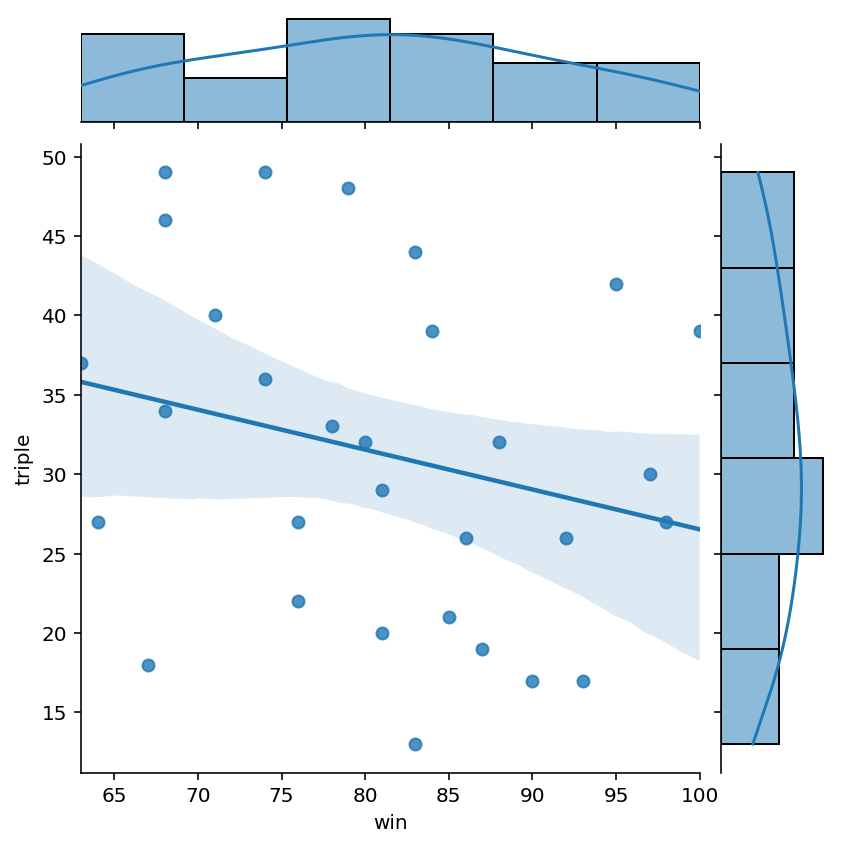

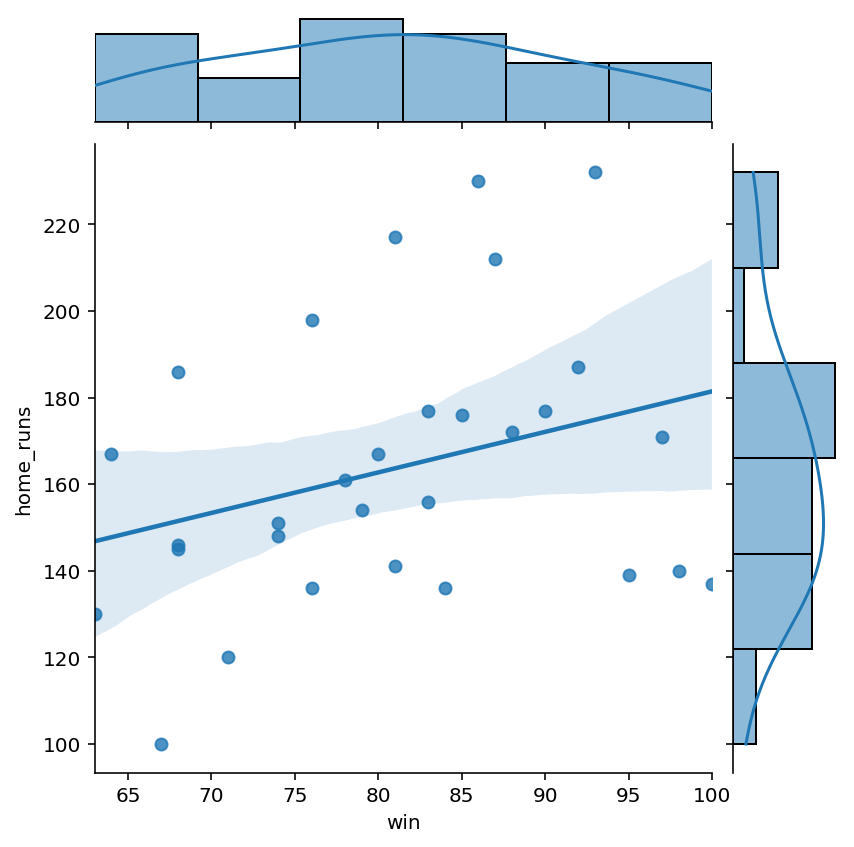

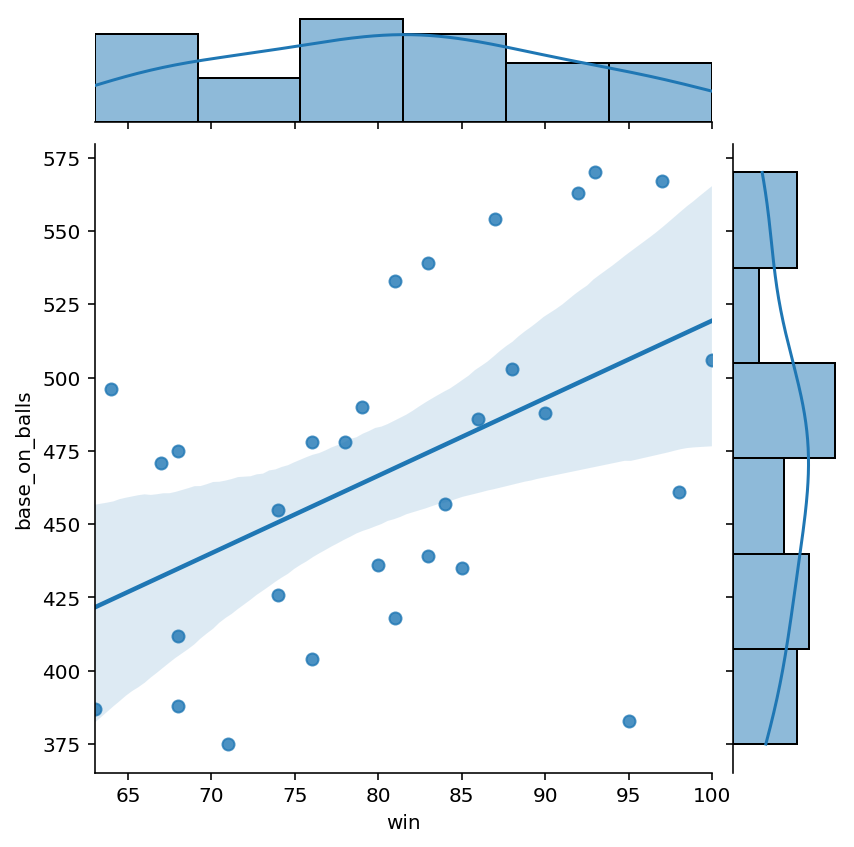

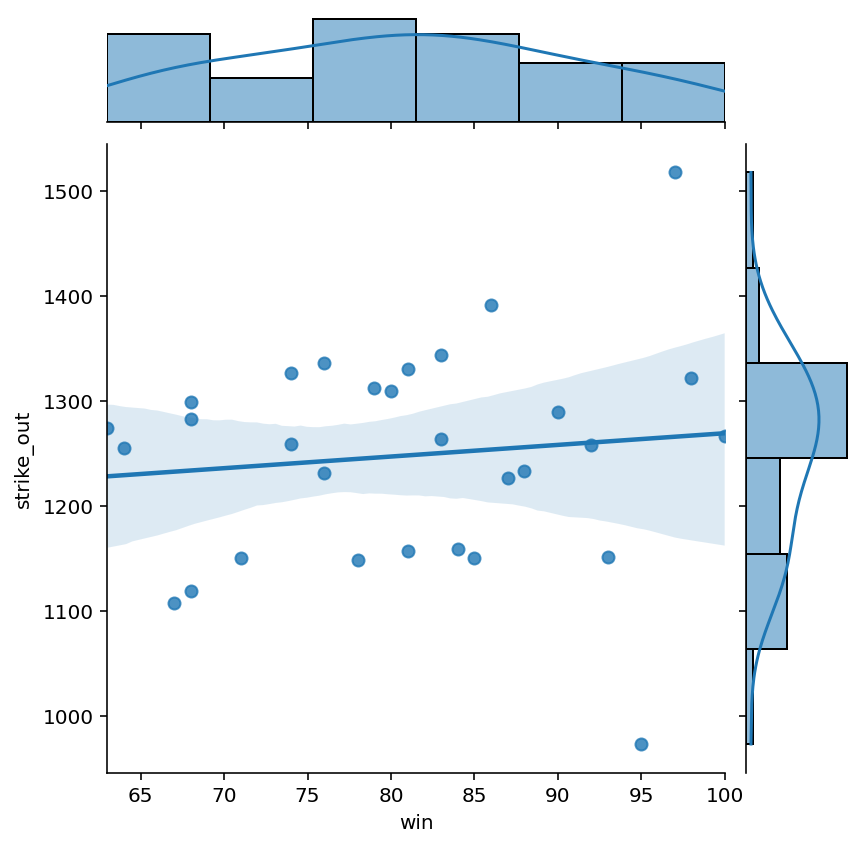

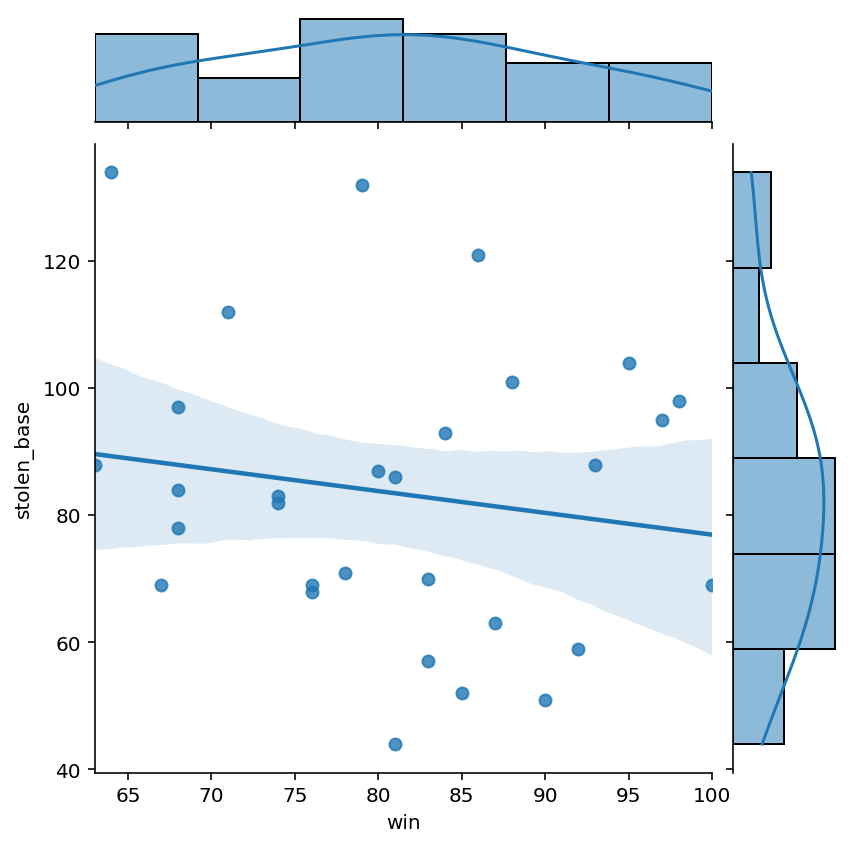

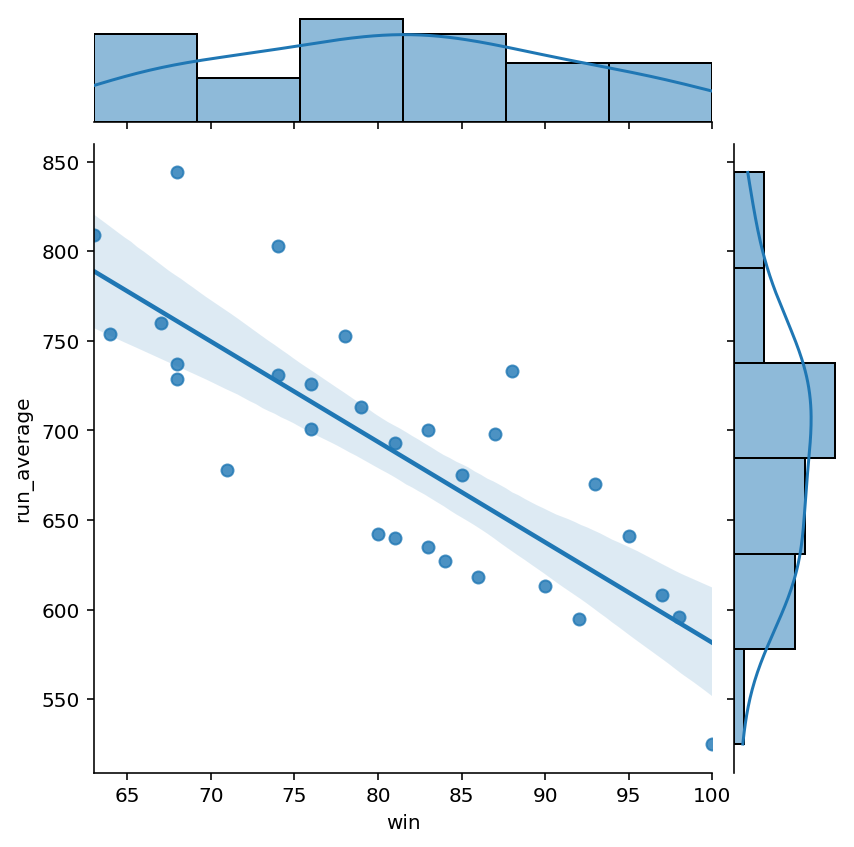

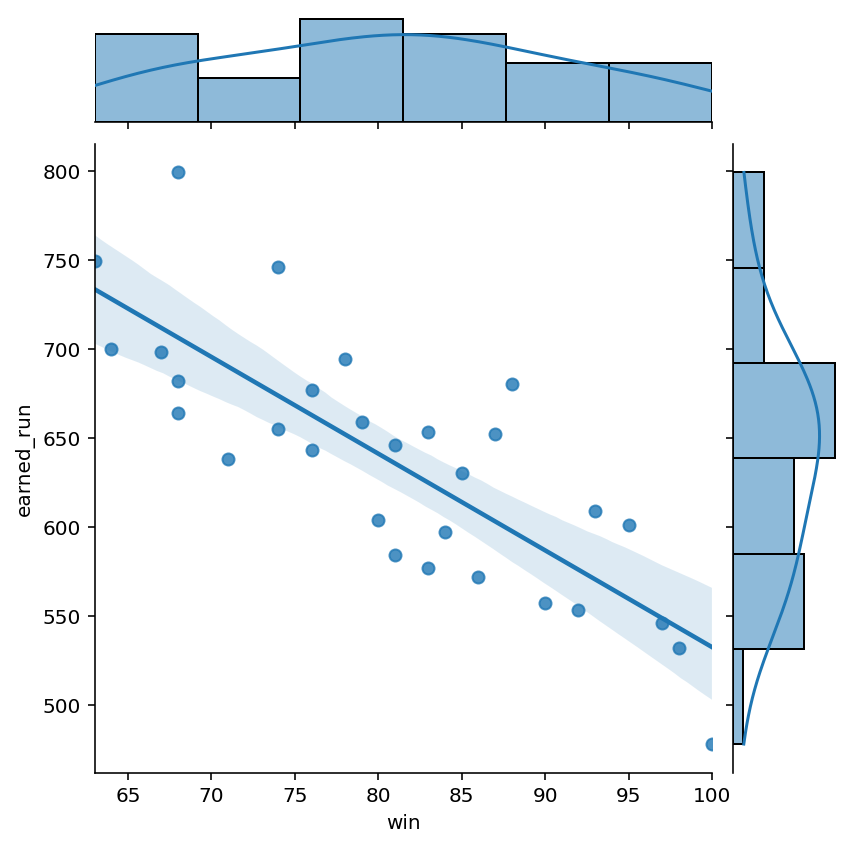

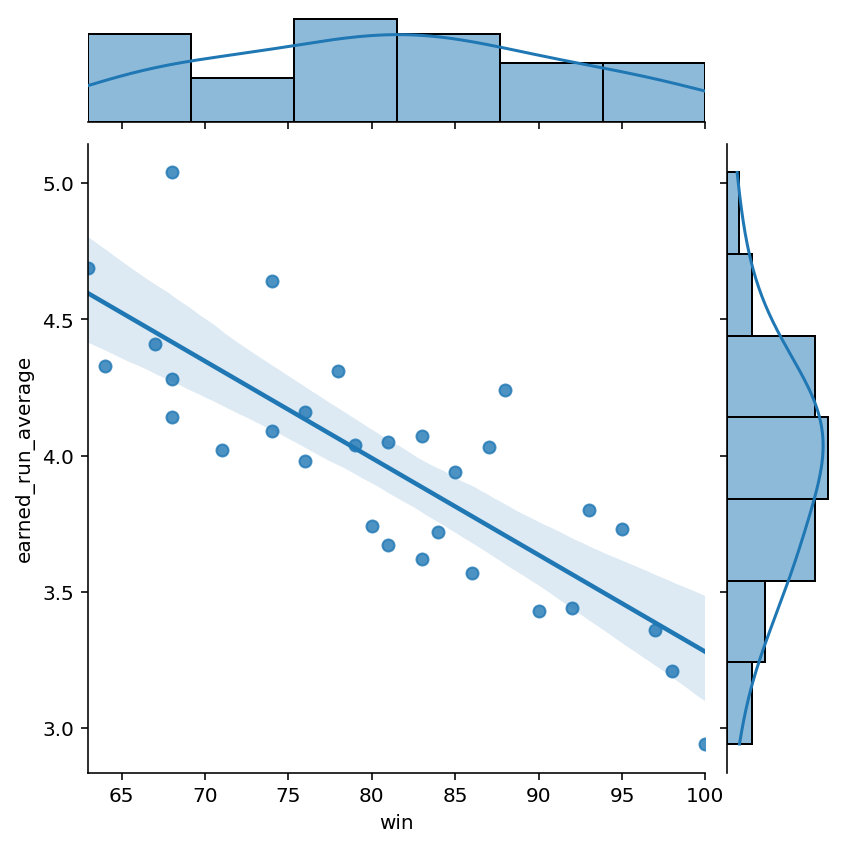

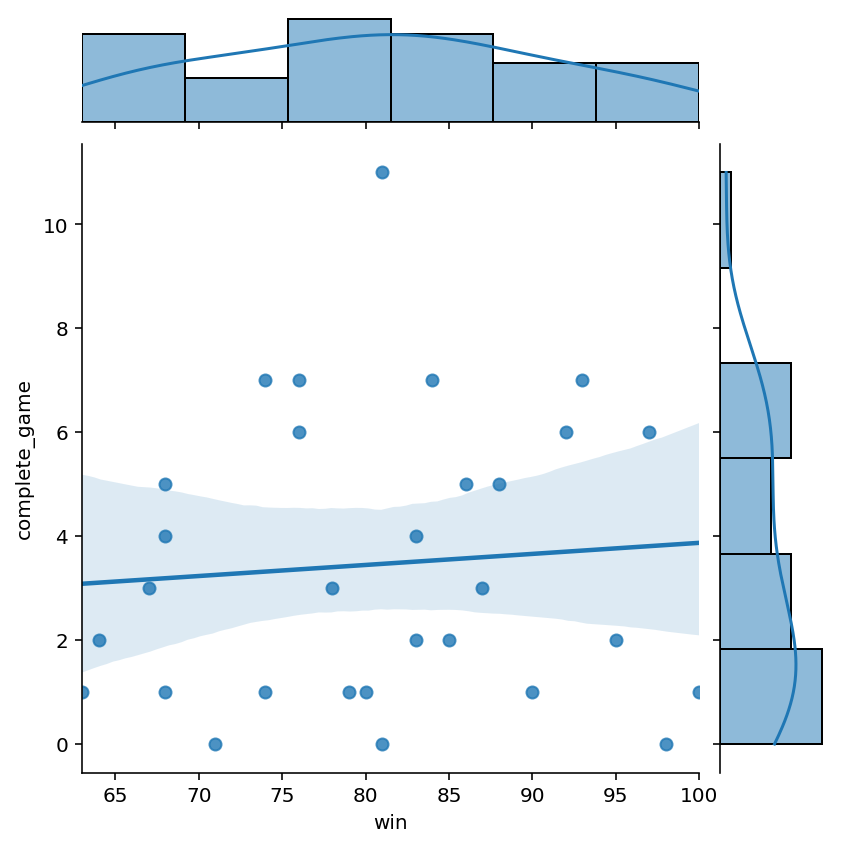

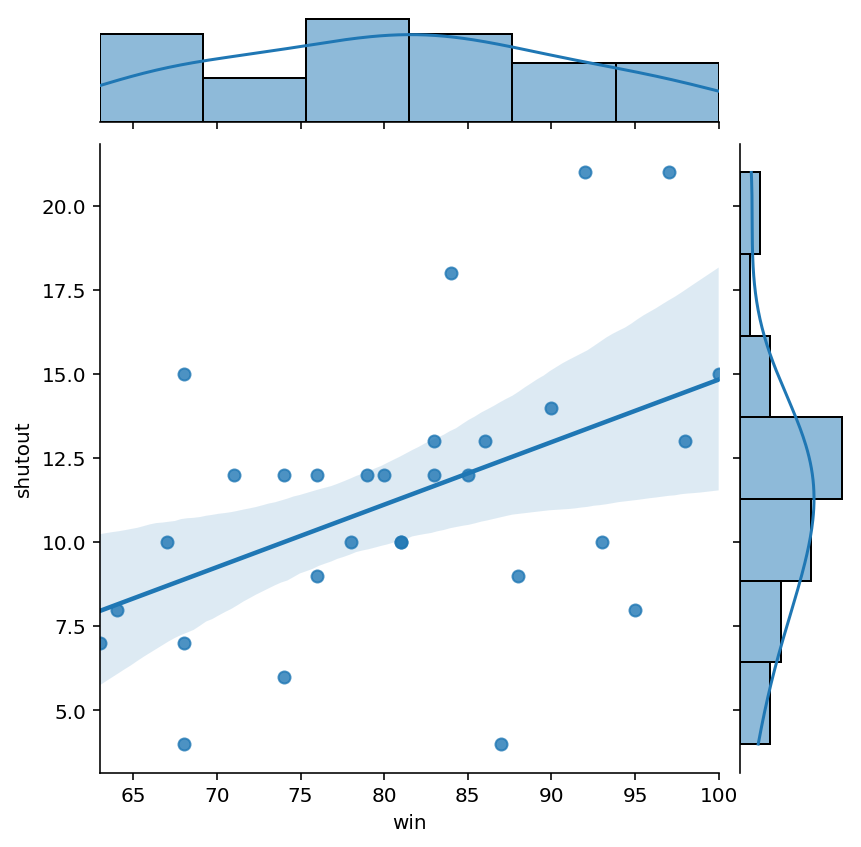

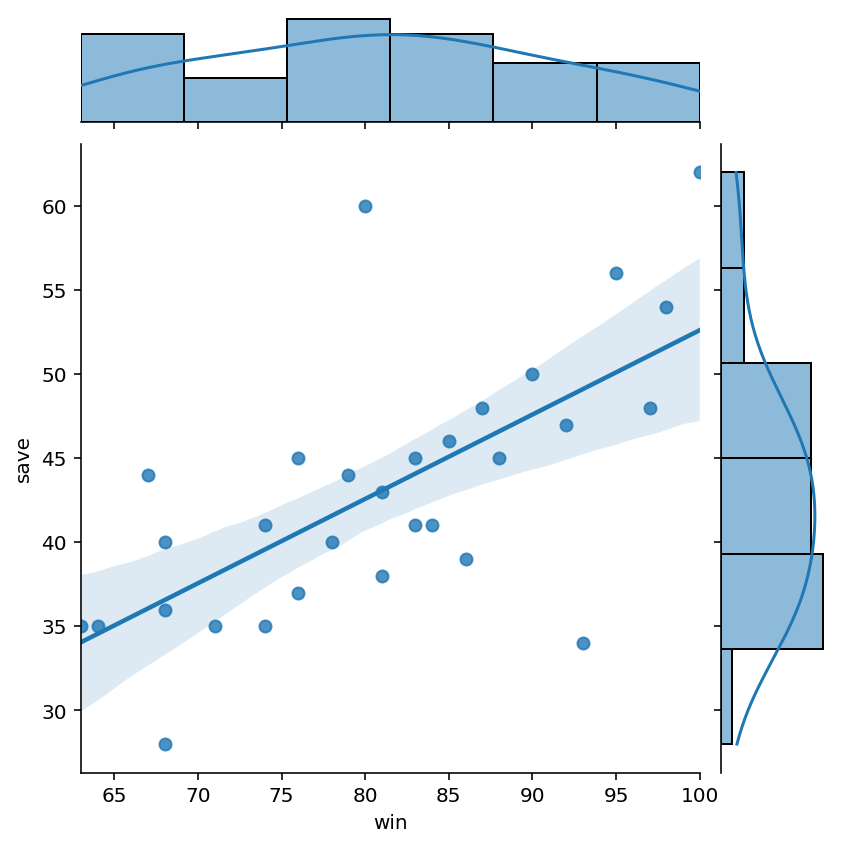

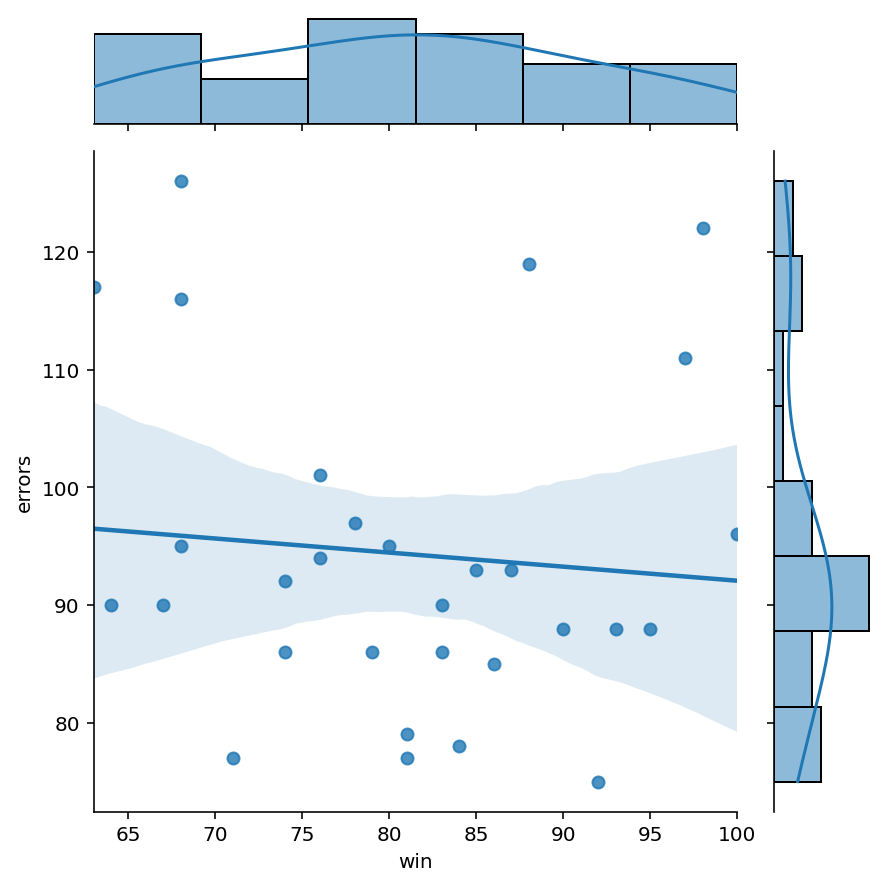

In [123]:
index = 0
features = baseball.drop("win", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.jointplot(data=baseball, x="win", y=col, kind="reg")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
#in the above one below are the results of the winning possibility with the below compared columns.

#run_average - chance of winning is above 800 otherwise the plot shows a lot of chance in loosing.
#earned_run - just like run_average earned_run are negatively impacts to number of wins.
#earned_run_average - it is negatively related to number of wins and is completely depends on feature Earned Runs
#complete_game - if the complete game goes above 5 then the chance of winning is high.
#shutout - A shut out refers to the act by which a single pitcher pitches a complete game and does 
           #not allow the opposing team to score a run so here as the shout outs rise the wins number increases too
#save - A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances 
        #so here as the number of save goes higher the number of wins also increases
#runs_scored - if scored above 650 high chance of winning
#at_bat - there is no cognitive decision able to take about the match result
#hit - plots scattered with our target variable "win" so we can't take cognitive decision
#double - winning chance is higher if double is scored more than 260.
#triple - plots scattered with our target variable "win" so we can't take cognitive decision
#home_runs - if its scored above 150 then chance of winning is more.
#base_on_balls - chance of winning is high if it is above 450
#strike_out - cant take a cognitive descision
#stolen_base - high chance of loosing if the stolen_base is below 90
#errors - In baseball statistics an error is an act in the judgment of the official scorer of a fielder 
        #misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate 
        #appearance to continue after the batter should have been put out. So here the number of errors 
        #are more in the range of 70 to 100 impacting the wins


In [ ]:
#Multivariate Analysis

In [ ]:
#pairplot

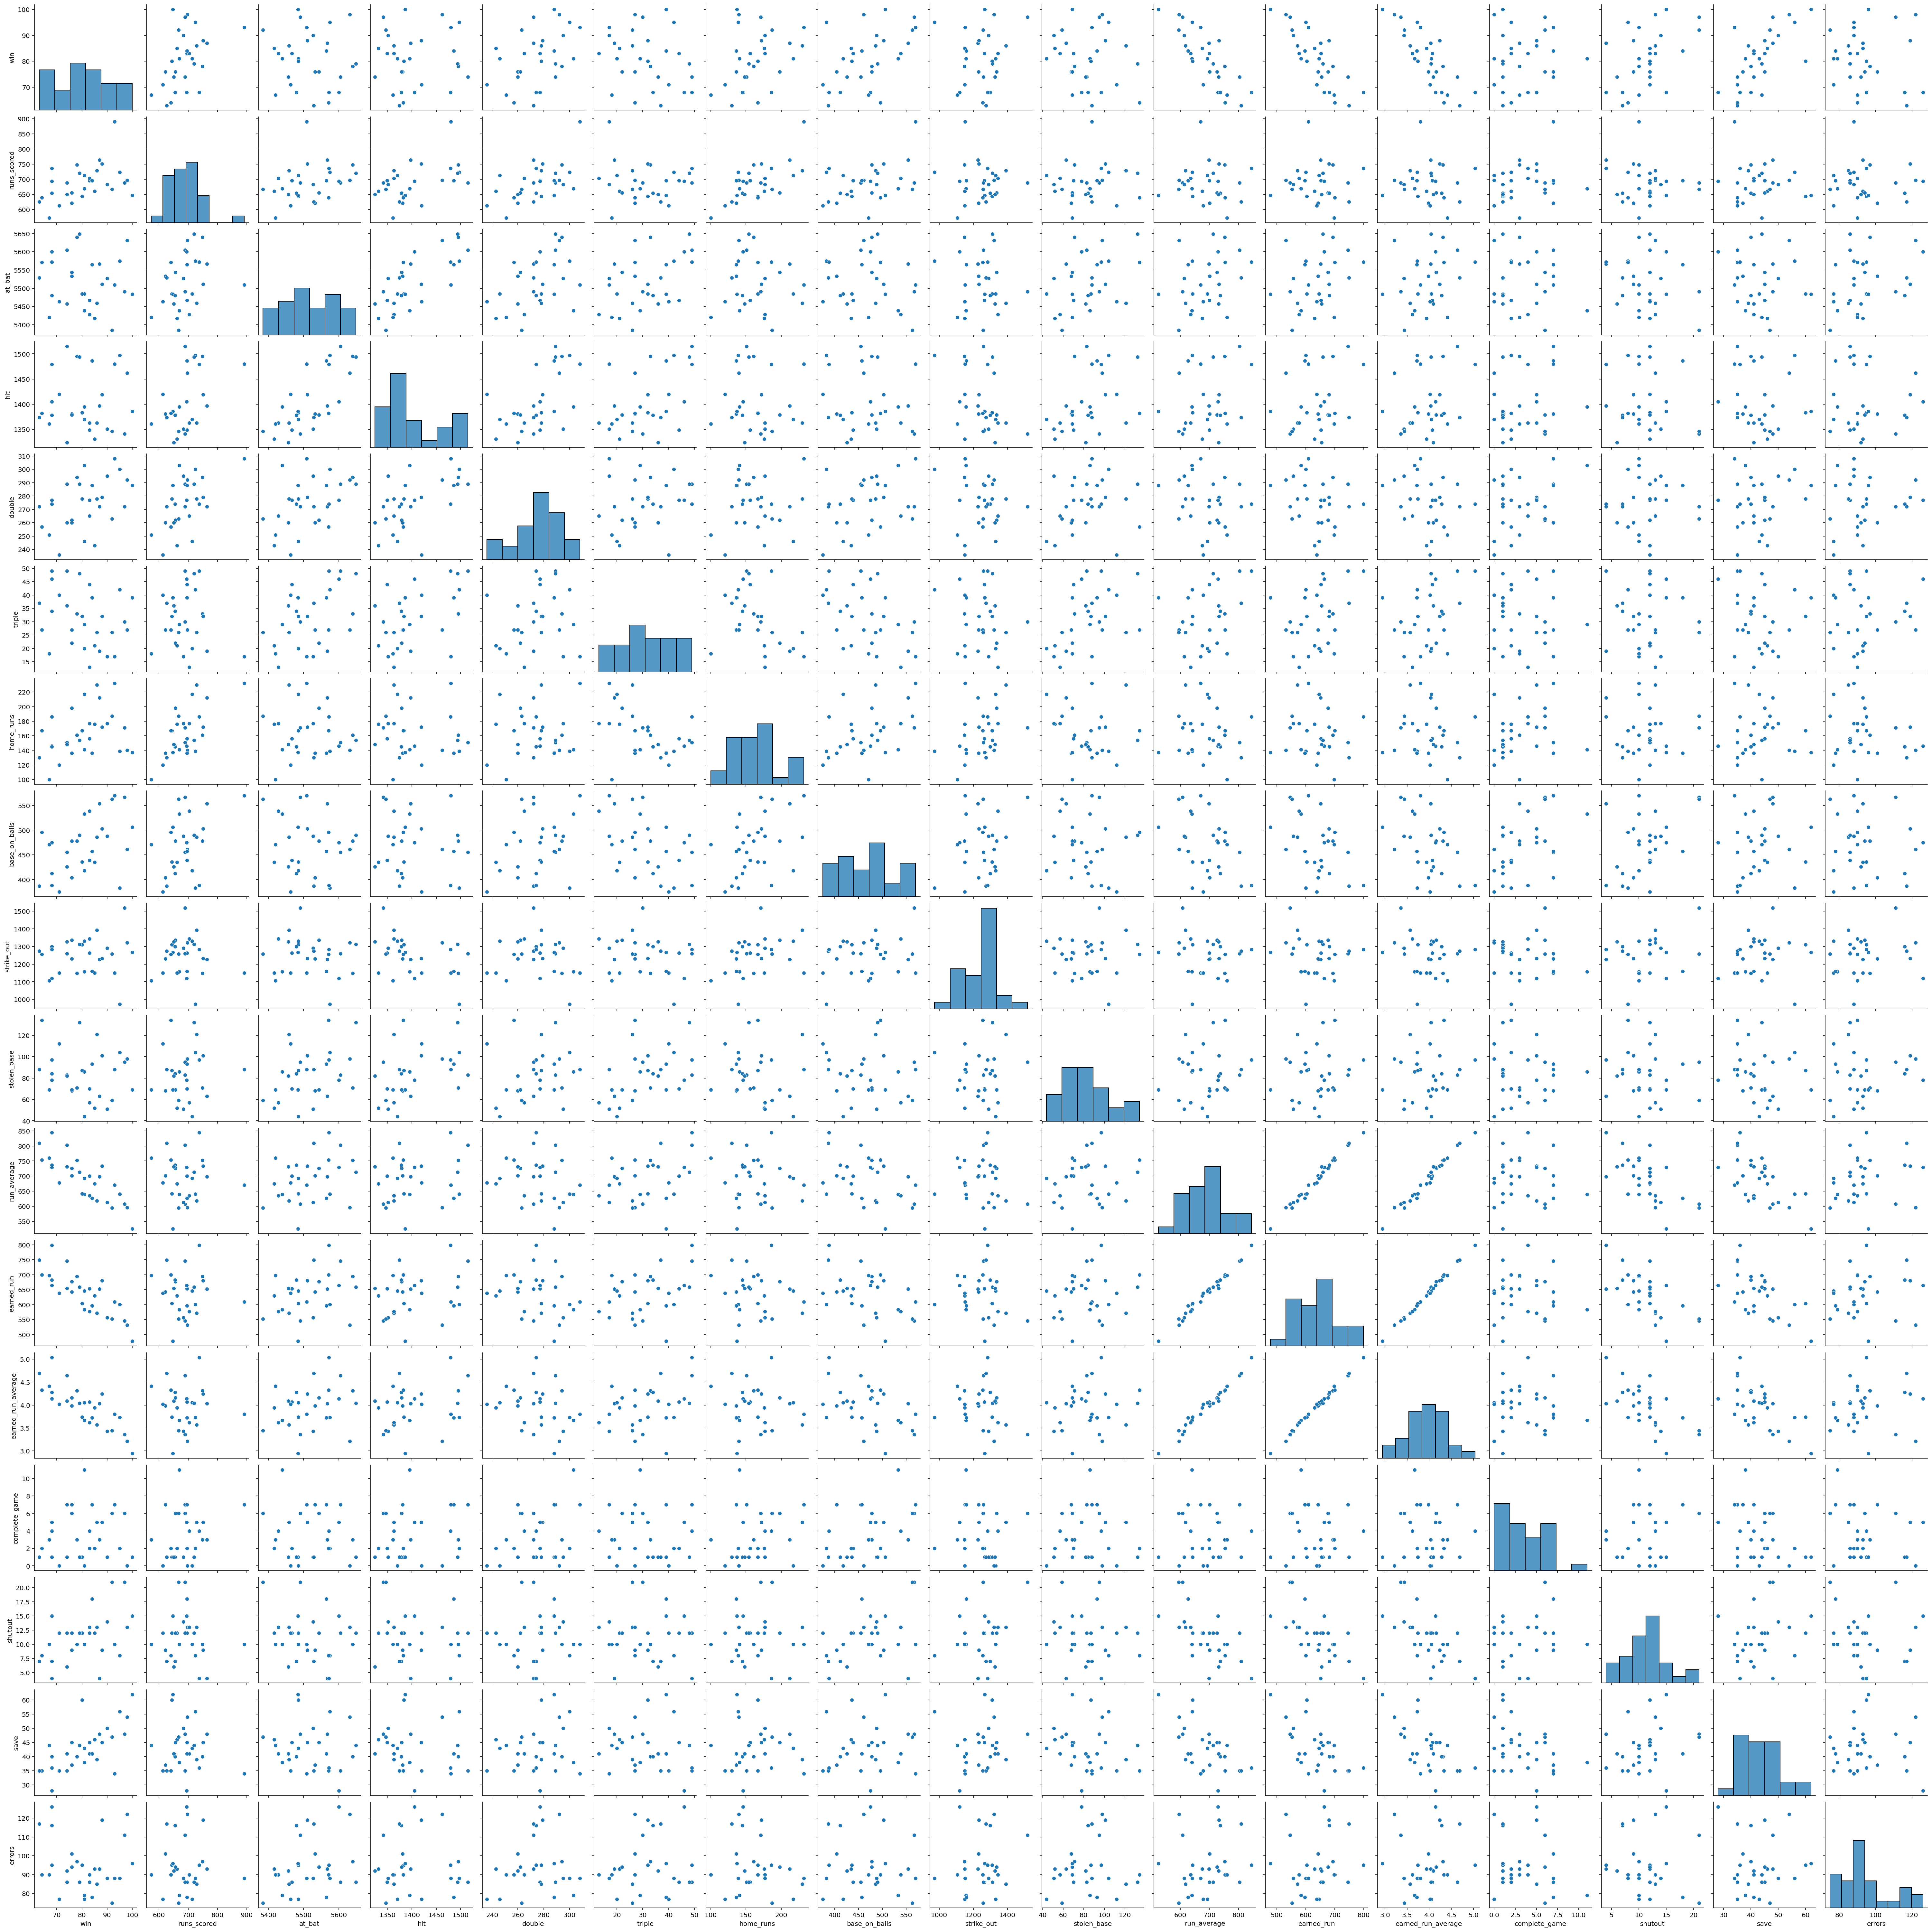

In [126]:
sns.pairplot(baseball)

In [ ]:
#heatmap

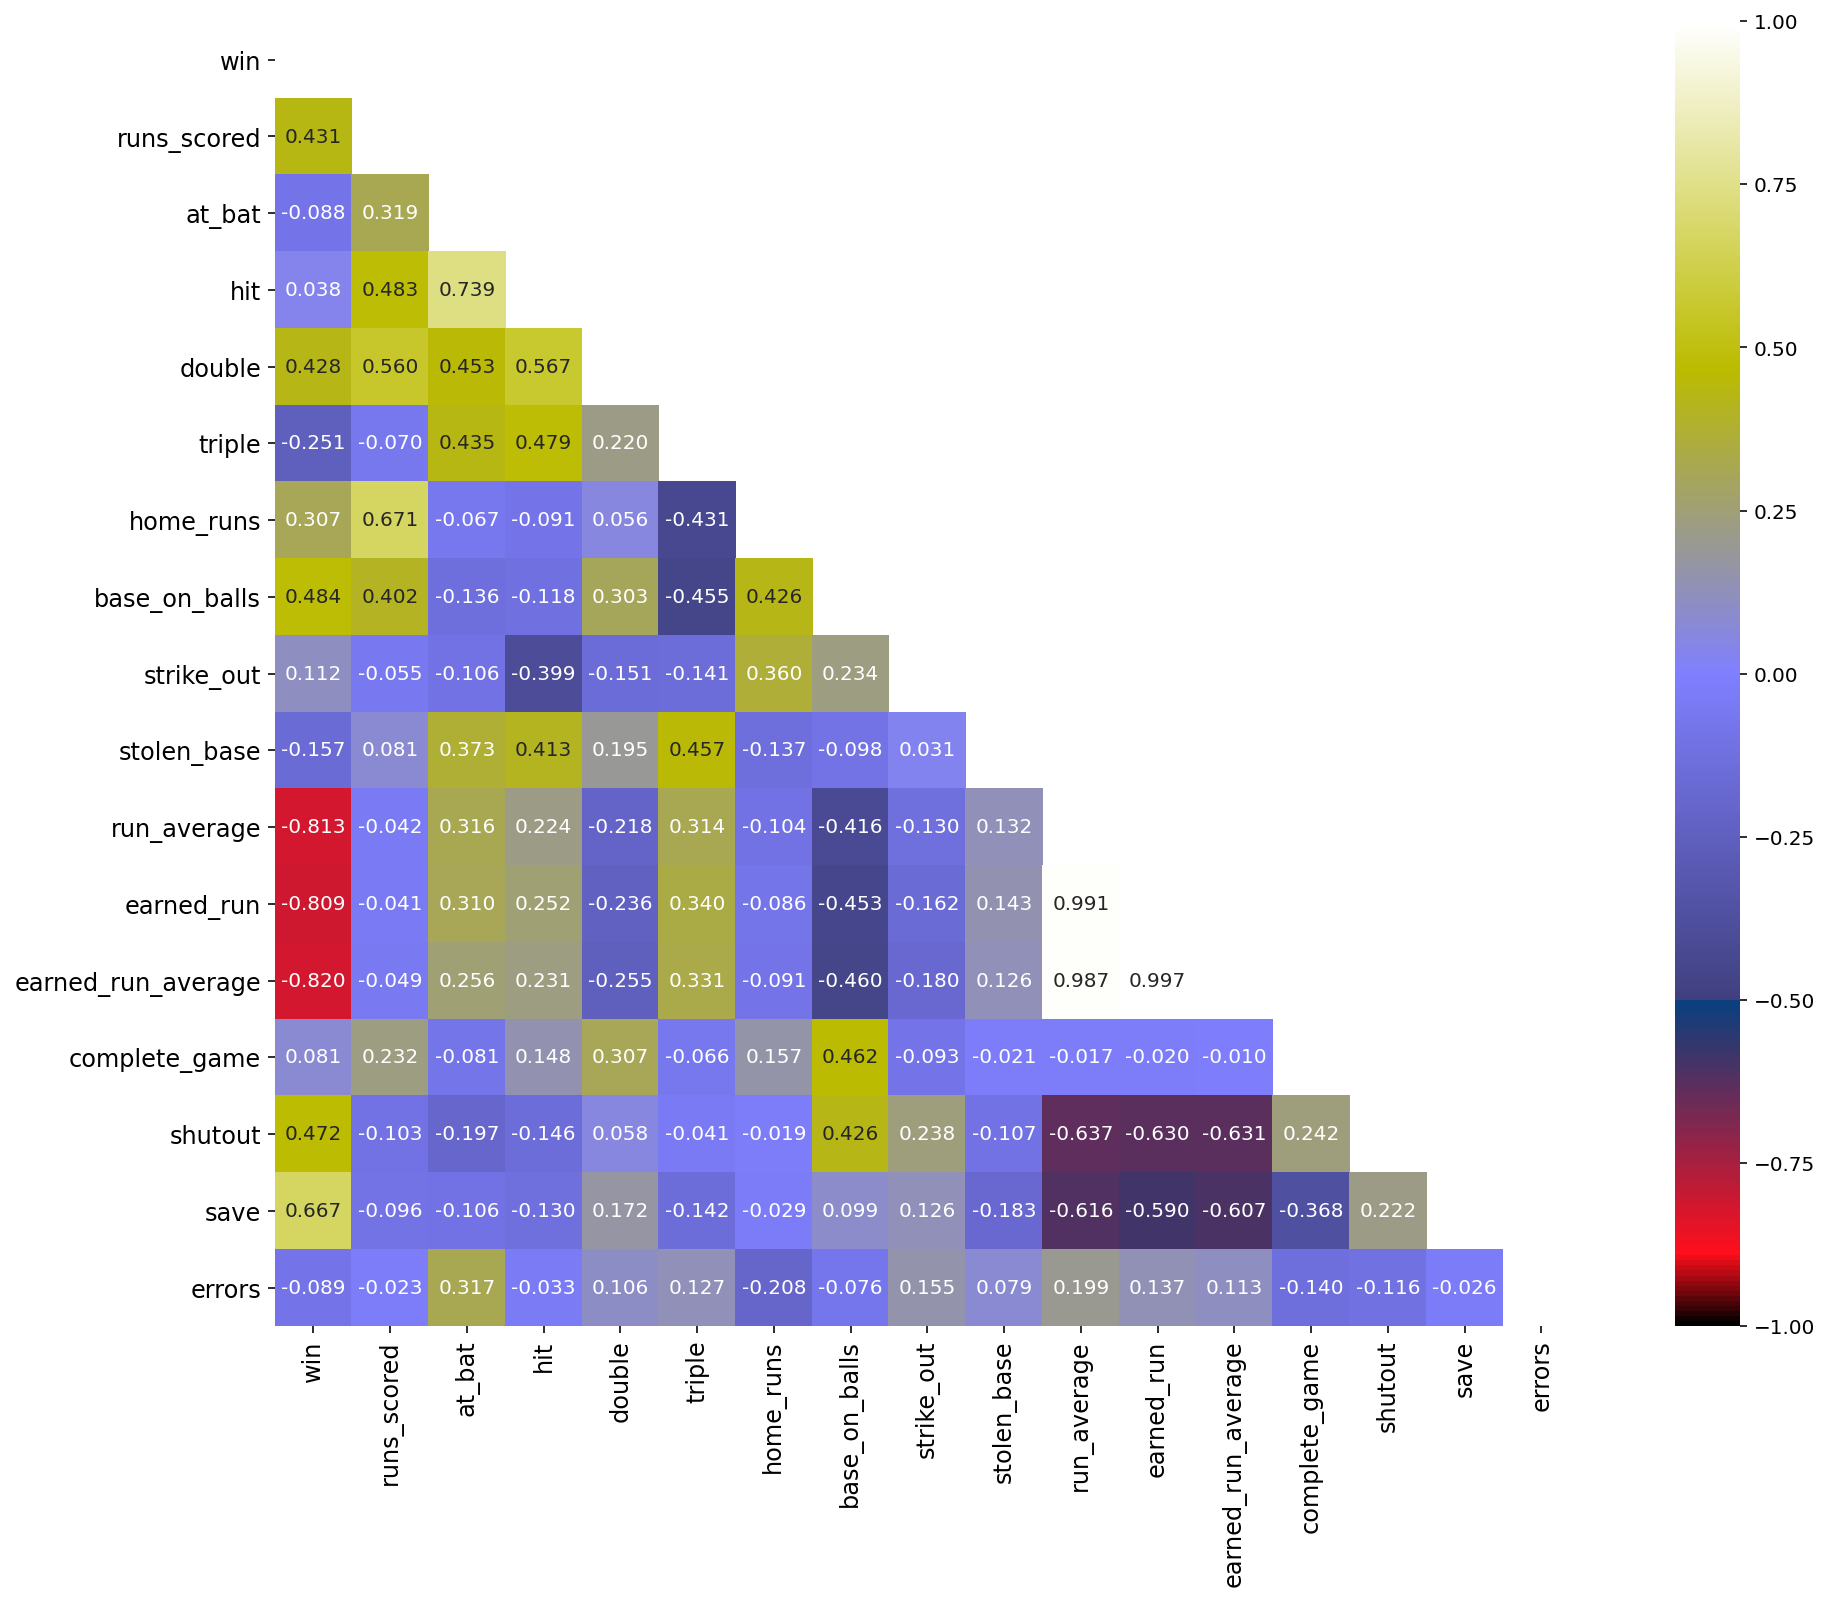

In [132]:
upper_triangle = np.triu(baseball.corr())
plt.figure(figsize=(17,12))
sns.heatmap(baseball.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#In the below heatmap "win" column is showing negatively correlated with columns "run_average", "earned_run" and "earned_run_average". 
#Also there is visible multi collinearity between the columns "run_average", "earned_run" and "earned_run_average" data points.
#We may need to drop highly correlated columns to avoid this issue or we may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.

In [133]:
baseball = baseball.drop(["earned_run", "earned_run_average"], axis=1)

#Since the  columns "earned_run" and "earned_run_average" have a high collinearity with the column "run_average" 
#where all 3 are negatively correlated with column "win" therefore dropping the other two to avoid
#multi collinearity issue in our model.


In [134]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   win            30 non-null     int64
 1   runs_scored    30 non-null     int64
 2   at_bat         30 non-null     int64
 3   hit            30 non-null     int64
 4   double         30 non-null     int64
 5   triple         30 non-null     int64
 6   home_runs      30 non-null     int64
 7   base_on_balls  30 non-null     int64
 8   strike_out     30 non-null     int64
 9   stolen_base    30 non-null     int64
 10  run_average    30 non-null     int64
 11  complete_game  30 non-null     int64
 12  shutout        30 non-null     int64
 13  save           30 non-null     int64
 14  errors         30 non-null     int64
dtypes: int64(15)
memory usage: 3.6 KB


# Outlier removal using Z Score

In [136]:
z = np.abs(zscore(baseball))
threshold = 3
baseball1 = baseball[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", baseball.shape)
print ("Shape of the dataframe after removing outliers: ", baseball1.shape)
print ("Percentage of data loss post outlier removal: ", (baseball.shape[0]-baseball1.shape[0])/baseball.shape[0]*100)

baseball=baseball1.copy() # reassigning the changed dataframe name to our original dataframe name


#Have used the Z score method to remove any outlier that we could afford to lose from our original dataset.  
#Since there were not many data points removed our new dataset would still have outlier traces like to retain them for better result.

Shape of the dataframe before removing outliers:  (30, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


In [ ]:
##Boxplot combined with Stripplot for observation of outlier points.

#There are slight traces of outliers still present in the updated dataset but will not remove any more information from updated dataset. 
#Using the existing data to building the machine learning model.


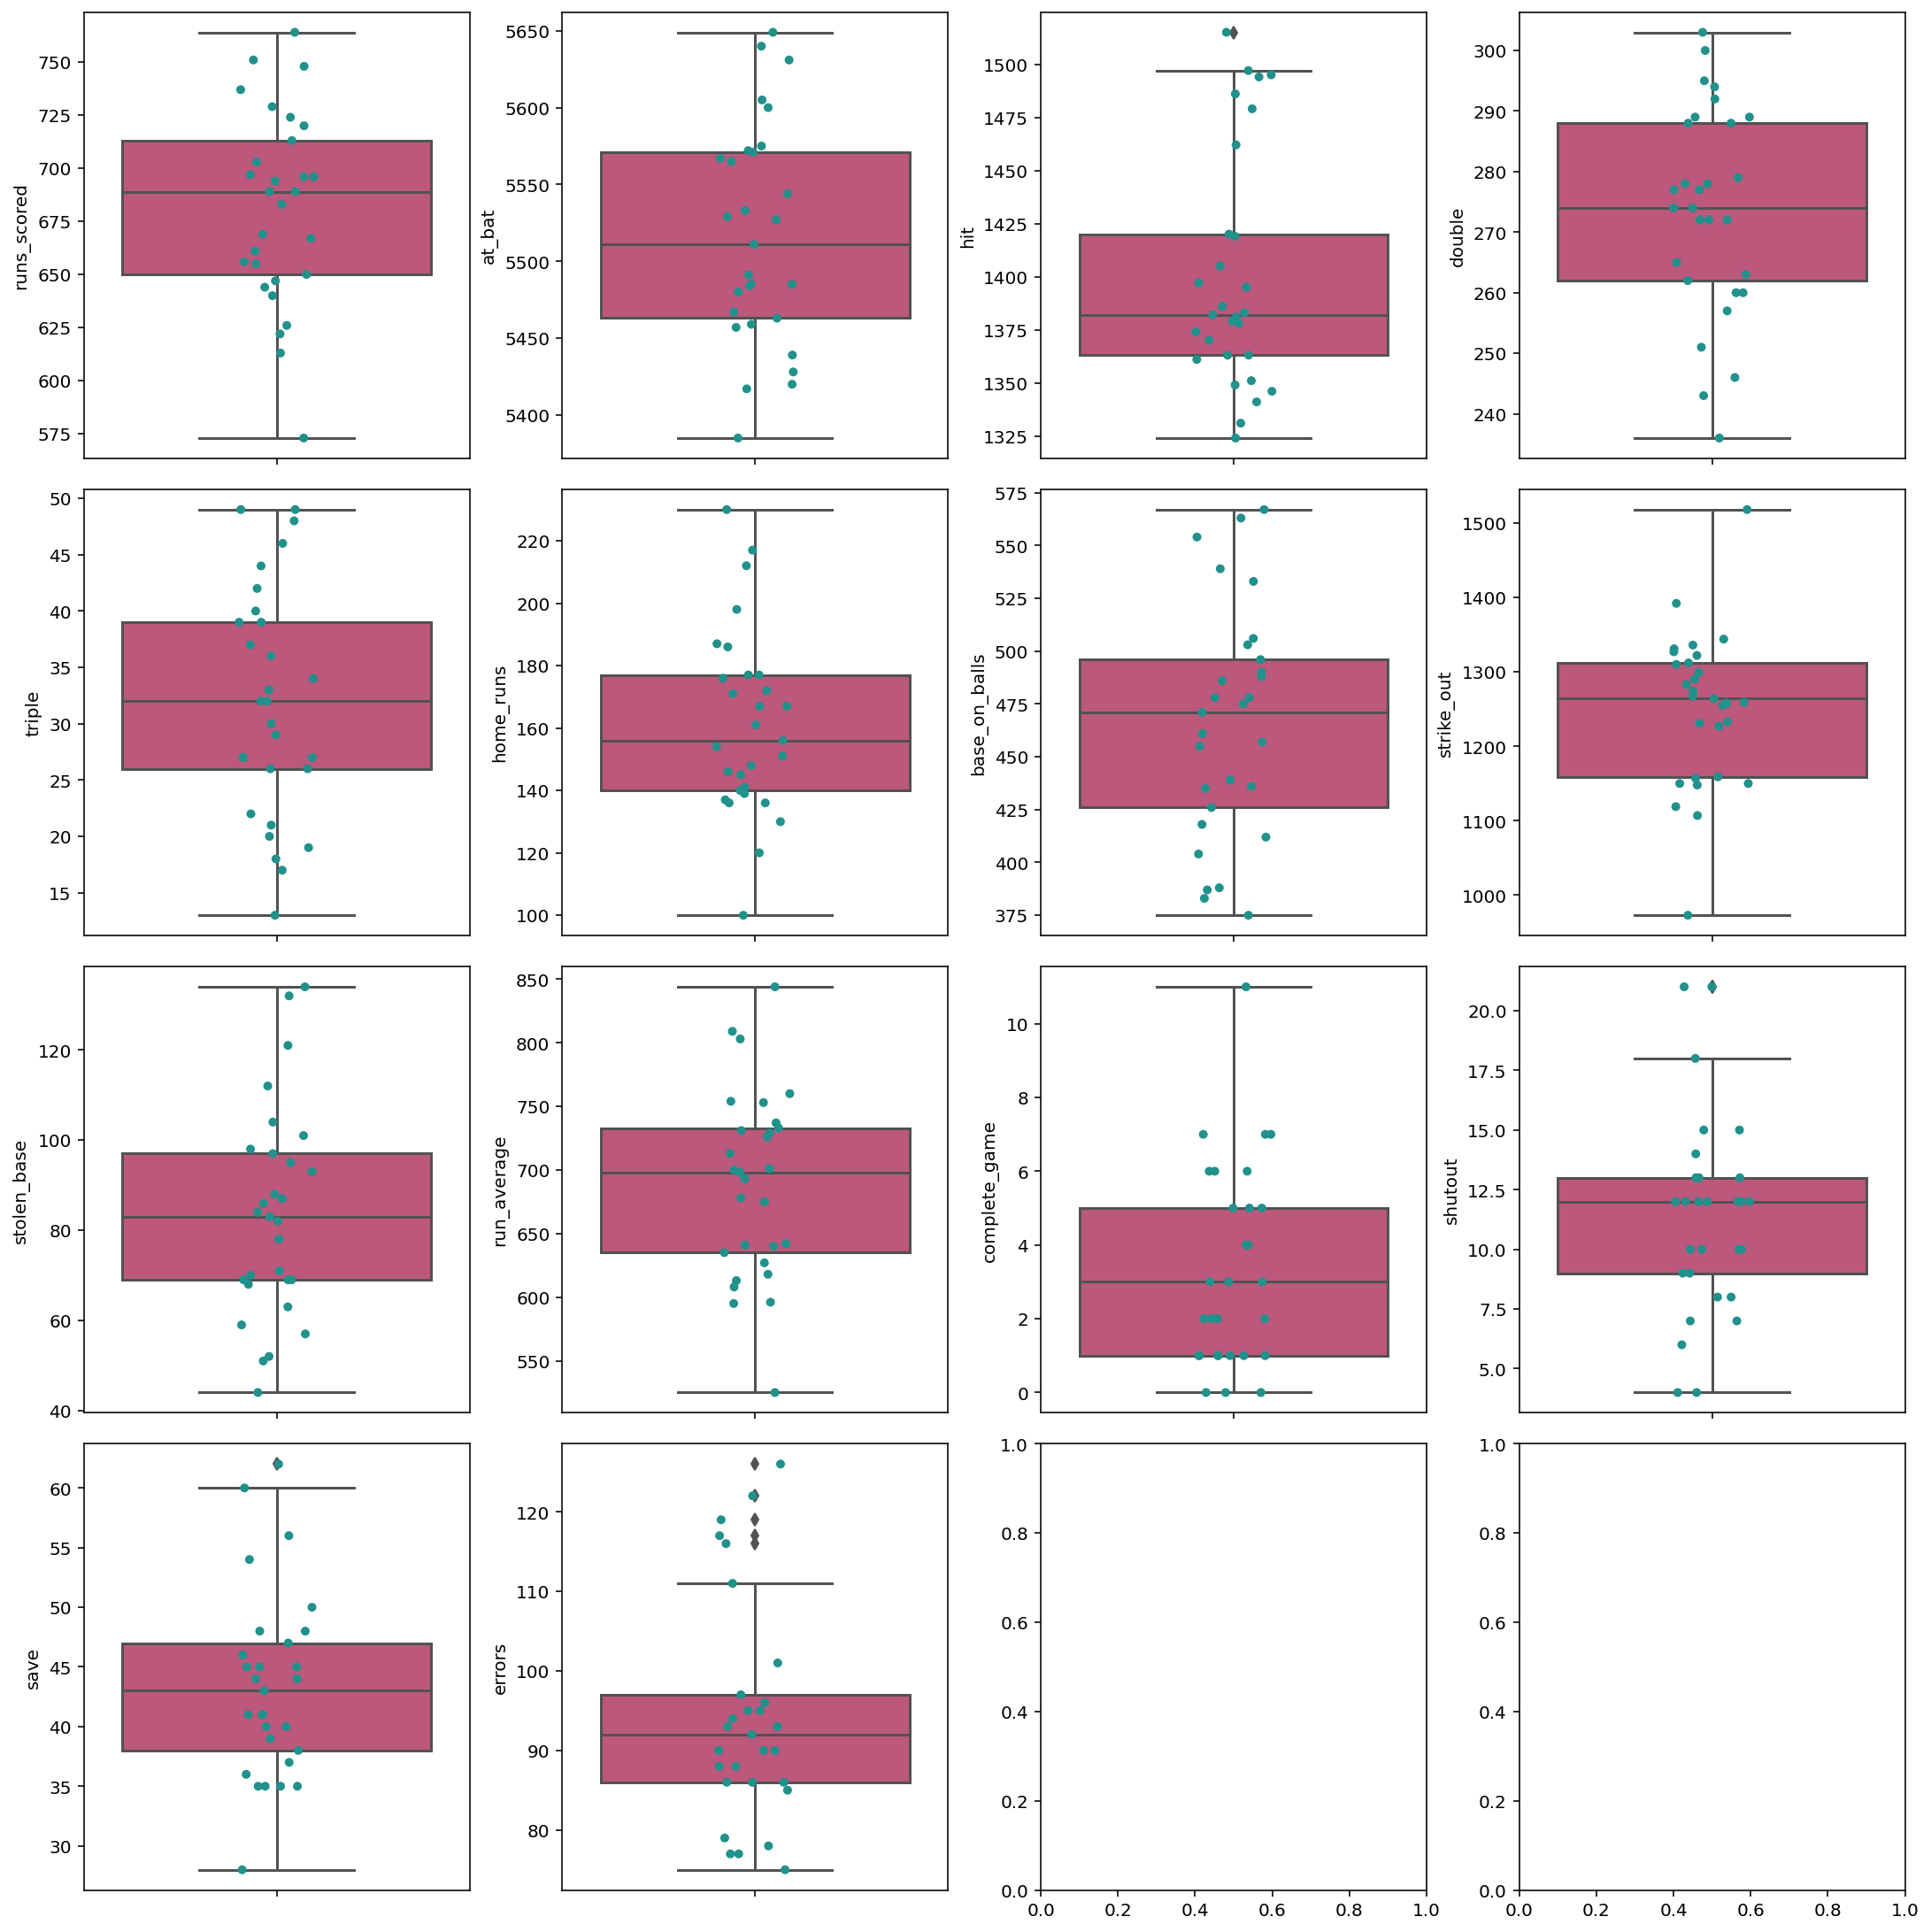

In [138]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = baseball.drop("win", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=baseball, ax=ax[index], palette="plasma")
    sns.stripplot(y=col, data=baseball, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [139]:
baseball.skew()

#There are still few columns showing slight skewness but overall it seems that they are either within the acceptable range
#or very near to the acceptable range of skewness that is +/-0.5.

win              0.119013
runs_scored     -0.215364
at_bat           0.169573
hit              0.783772
double          -0.335304
triple           0.090124
home_runs        0.450862
base_on_balls    0.151193
strike_out      -0.233815
stolen_base      0.494966
run_average      0.018155
complete_game    0.854980
shutout          0.526943
save             0.627480
errors           0.840271
dtype: float64

In [ ]:
#distribution plot

#After taking a look at the updated distribution plot almost all of the columns are able to show a bell shape curve indicating towards a normalized dataset.

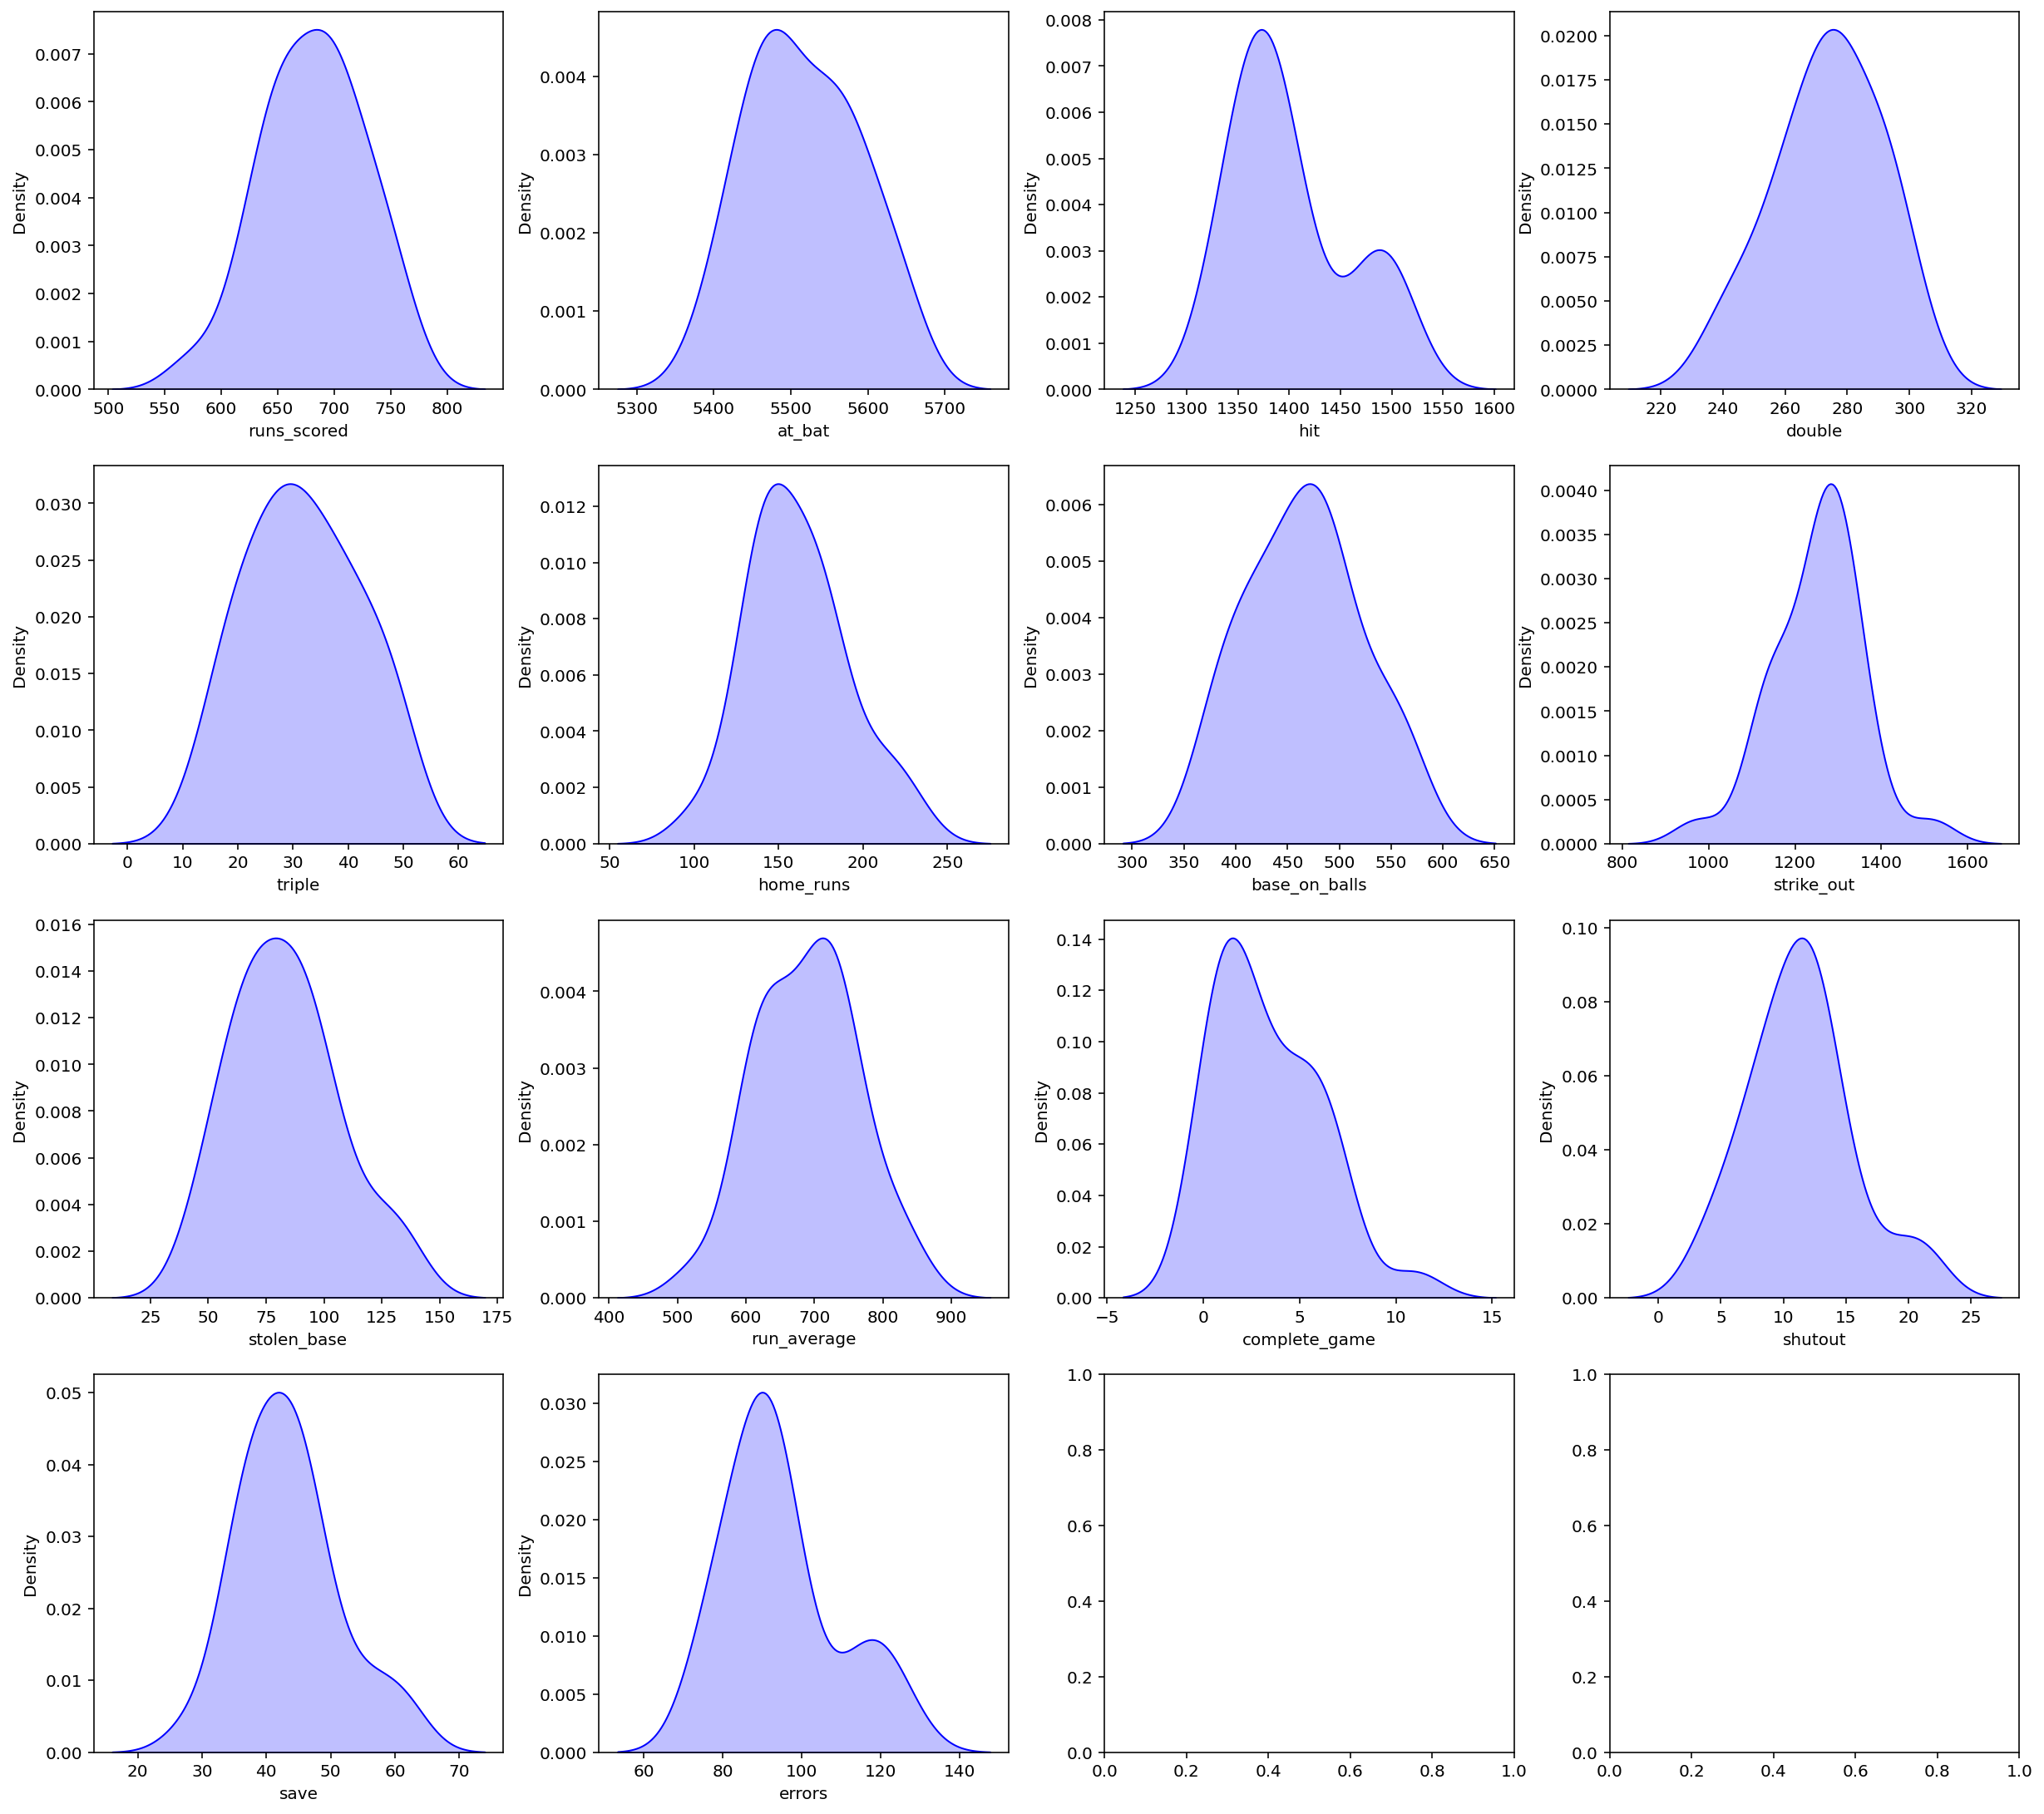

In [140]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = baseball.drop("win", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [141]:
X = baseball.drop('win', axis=1)
Y = baseball['win']

#have bifurcated the dataset into features and labels where X represents all the columns and Y represents the target column.

In [143]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)


#Scaling the feature data to ensure that there is no issue with the data biasness over a particular column 
#instead a standardization will occur helping us in having a uniform dataset value.

runs_scored    at_bat       hit    double    triple  home_runs  \
0     0.959398  0.830084  1.738306  1.556538  1.010845  -0.765863   
1     0.331147 -0.702831 -0.938698  0.201171  1.208917  -0.181389   
2    -0.274666 -1.100253 -0.106656  1.733325 -0.276617  -0.697101   
3    -1.329231  0.233951 -0.359886 -0.800621 -0.474688  -0.869006   
4     0.174084  1.255894  2.063888  0.908319  1.704094  -0.353293   
5     1.856900  0.716535 -0.070480 -0.093474 -1.266972   1.743939   
6     0.712585 -0.447345 -0.558853 -1.625627 -1.167936   1.915843   
7    -0.835605 -0.447345 -0.323710  0.260100  0.020490   0.196801   
8     1.497899  1.752672  1.702131  1.202964  0.119526  -0.009484   
9     1.565212 -0.078310  0.327453  0.319029  0.020490   0.368705   

   base_on_balls  strike_out  stolen_base  run_average  complete_game  \
0      -1.536359   -2.727623     0.905953    -0.664514      -0.501486   
1      -0.495021    0.121896    -0.585315     0.154638      -0.501486   
2       1.252941   -0.925866     0.116458    -0.678397       2.854612   
3      -1.145857   -0.201246    -0.673037     0.168522       1.363013   
4      -0.197495    0.072935    -0.015124     1.584683       1.363013   
5       1.643442   -0.240414    -0.892341     0.126870      -0.128586   
6      -0.885522    0.777970    -1.725697     0.057451      -1.247285   
7      -0.550807    0.572335     0.160319    -0.650630      -0.874386   
8       0.230197   -1.013995    -0.541454     0.890486      -0.128586   
9       0.695081   -0.181661     0.774370     0.612808       0.617213   

    shutout      save    errors  
0 -0.813262  1.643157 -0.471091  
1  0.159299  0.211006 -0.614898  
2 -0.326982 -0.700362 -1.118222  
3 -0.570122 -0.830557  0.463653  
4  0.159299 -1.090948 -0.614898  
5 -1.785822  0.601593 -0.111574  
6 -0.326982 -0.049384 -1.262029  
7  0.159299  2.163939  0.032233  
8 -0.326982 -0.439971  0.176039  
9 -0.570122  0.211006  1.757915

# Principal component analysis (PCA)

In [144]:
pca = PCA(n_components=14, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(10)

#using the PCA techniques so that it can help us in reducing the skewness present in our dataset 
#even though ideally PCA is used for reducing dimentionality on bigger dataset, using this to check if it can assist with the skewness concern.

runs_scored    at_bat       hit    double    triple  home_runs  \
0    -2.957996 -0.953253  2.246316 -1.216994 -2.357314   0.016125   
1     0.240394  0.417411  0.313526 -0.266703 -0.294763   0.504699   
2     0.474141 -1.106621  0.911147  3.099281 -0.796596  -0.762581   
3    -0.109473  1.848198  0.163538  1.093046  0.300077  -1.019805   
4    -2.909976 -0.777732 -0.319362  1.853279 -0.148994   0.213535   
5     0.667623 -1.404411 -2.424945 -0.966726 -1.725726  -1.119576   
6     1.947763  0.997051 -2.042951 -1.258751 -1.728523   0.792559   
7     0.939941 -0.062020  1.197914 -1.850466  0.162508   0.548143   
8    -2.383972 -1.433303 -0.623188 -0.034015 -1.169926  -1.165087   
9    -0.883912 -1.117449 -1.155980 -0.166050  0.614701  -1.047468   

   base_on_balls  strike_out  stolen_base  run_average  complete_game  \
0       0.626783    0.394846     0.882534     0.554004      -0.258275   
1      -0.962596    1.240400     0.256176    -0.827710       0.332404   
2       1.542021    1.355597    -0.235204     0.159777       0.549155   
3      -0.127039    0.024300    -0.562258     1.324900      -0.151055   
4      -1.046595    0.188747    -1.268692    -0.264274      -0.364419   
5       1.016351   -0.453021     0.101003    -0.685705      -0.280422   
6      -1.306637   -0.455940    -0.201846     0.328548       0.206196   
7       0.150741    0.700940    -0.481820     0.298089      -0.687803   
8      -0.411894   -0.856657    -0.244877    -0.377093       0.350590   
9       0.786800    0.361866     1.213722    -0.148495      -0.822724   

    shutout      save    errors  
0 -0.218896 -0.176119  0.192275  
1 -0.199270 -0.010978  0.486047  
2  0.082016  0.205976 -0.116133  
3 -0.102882  0.737932  0.222658  
4  0.118457 -0.147223 -0.268420  
5 -0.149604  0.698599 -0.025234  
6  0.220391  0.094941 -0.003327  
7 -0.378809 -0.342151 -0.146316  
8  0.165218 -0.282090  0.028534  
9  0.475524 -0.306328  0.150268

# Power Transformation

In [145]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

#Using the 'yeo-johnson' method as 'box-cox' can be used only on positive data. 
#With the help of Power Transformation our outliers should be handled too. 
#Since we do not have much data trying not to lose any rows by removing outliers right now. 
#However if needed to increase the accuracy of our model I may perform outlier removal later on.

runs_scored    at_bat       hit    double    triple  home_runs  \
0    -1.531314 -0.498970  1.648944 -1.012066 -2.313643   0.160763   
1     0.107095  0.491777  0.264410 -0.152456 -0.222672   0.618698   
2     0.231348 -0.637813  0.701913  2.267201 -0.705892  -0.741631   
3    -0.077322  1.155694  0.152658  0.908262  0.317725  -1.081383   
4    -1.507223 -0.346199 -0.214158  1.442298 -0.086620   0.354539   
5     0.334721 -0.920914 -1.898773 -0.777902 -1.647266  -1.218018   
6     1.027540  0.787104 -1.585944 -1.051603 -1.650175   0.860395   
7     0.480910  0.201045  0.908332 -1.624805  0.196177   0.656288   
8    -1.242640 -0.949294 -0.449948  0.043601 -1.077768  -1.281211   
9    -0.479206 -0.647799 -0.870502 -0.066799  0.589530  -1.119003   

   base_on_balls  strike_out  stolen_base  run_average  complete_game  \
0       0.858484    0.615354     1.330458     1.040373      -0.514105   
1      -1.355468    1.627497     0.506216    -1.732195       0.707081   
2       1.791532    1.755747    -0.285770     0.395032       1.130860   
3      -0.067982    0.116307    -0.903286     2.107384      -0.284258   
4      -1.497998    0.343404    -2.446157    -0.425055      -0.744902   
5       1.274056   -0.601532     0.273842    -1.381634      -0.562001   
6      -1.952420   -0.606167    -0.226670     0.682387       0.455062   
7       0.297876    0.998391    -0.745228     0.631872      -1.465975   
8      -0.478003   -1.267010    -0.303047    -0.668205       0.743058   
9       1.033087    0.572677     1.713964    -0.186051      -1.774019   

    shutout      save    errors  
0 -0.560659 -0.467027  0.926858  
1 -0.507797  0.121365  2.093866  
2  0.236013  0.754554 -0.513110  
3 -0.249929  1.884386  1.055454  
4  0.330416 -0.356914 -1.324429  
5 -0.374556  1.814975 -0.060628  
6  0.592304  0.447967  0.044761  
7 -0.995567 -1.159171 -0.668680  
8  0.450942 -0.897050  0.195479  
9  1.235321 -1.001225  0.745612

# Variance Inflation Factor(VIF)

In [147]:
vif = pd.DataFrame()
vif["Features List"]=X.columns
vif["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif


#In theory if a VIF is above 10 it indicates high correlation and is cause for concern.
#Right now we have almost all the feature columns within the range of intended VIF value. 
#This definitely gives us a green signal on creating our machine learning model.

Features List  VIF Value
0     runs_scored   1.006200
1          at_bat   1.017150
2             hit   1.005998
3          double   1.007102
4          triple   1.005601
5       home_runs   1.011452
6   base_on_balls   1.013386
7      strike_out   1.007557
8     stolen_base   1.010934
9     run_average   1.002451
10  complete_game   1.004545
11        shutout   1.008313
12           save   1.017913
13         errors   1.007034

In [148]:
X.skew() #once again checking for skewness to be cross verify before proceeding to next step.

runs_scored      0.019135
at_bat           0.138663
hit              0.002219
double           0.010464
triple           0.012446
home_runs        0.073433
base_on_balls    0.004156
strike_out       0.028031
stolen_base     -0.068430
run_average      0.049740
complete_game    0.061566
shutout          0.019880
save             0.046013
errors           0.003803
dtype: float64

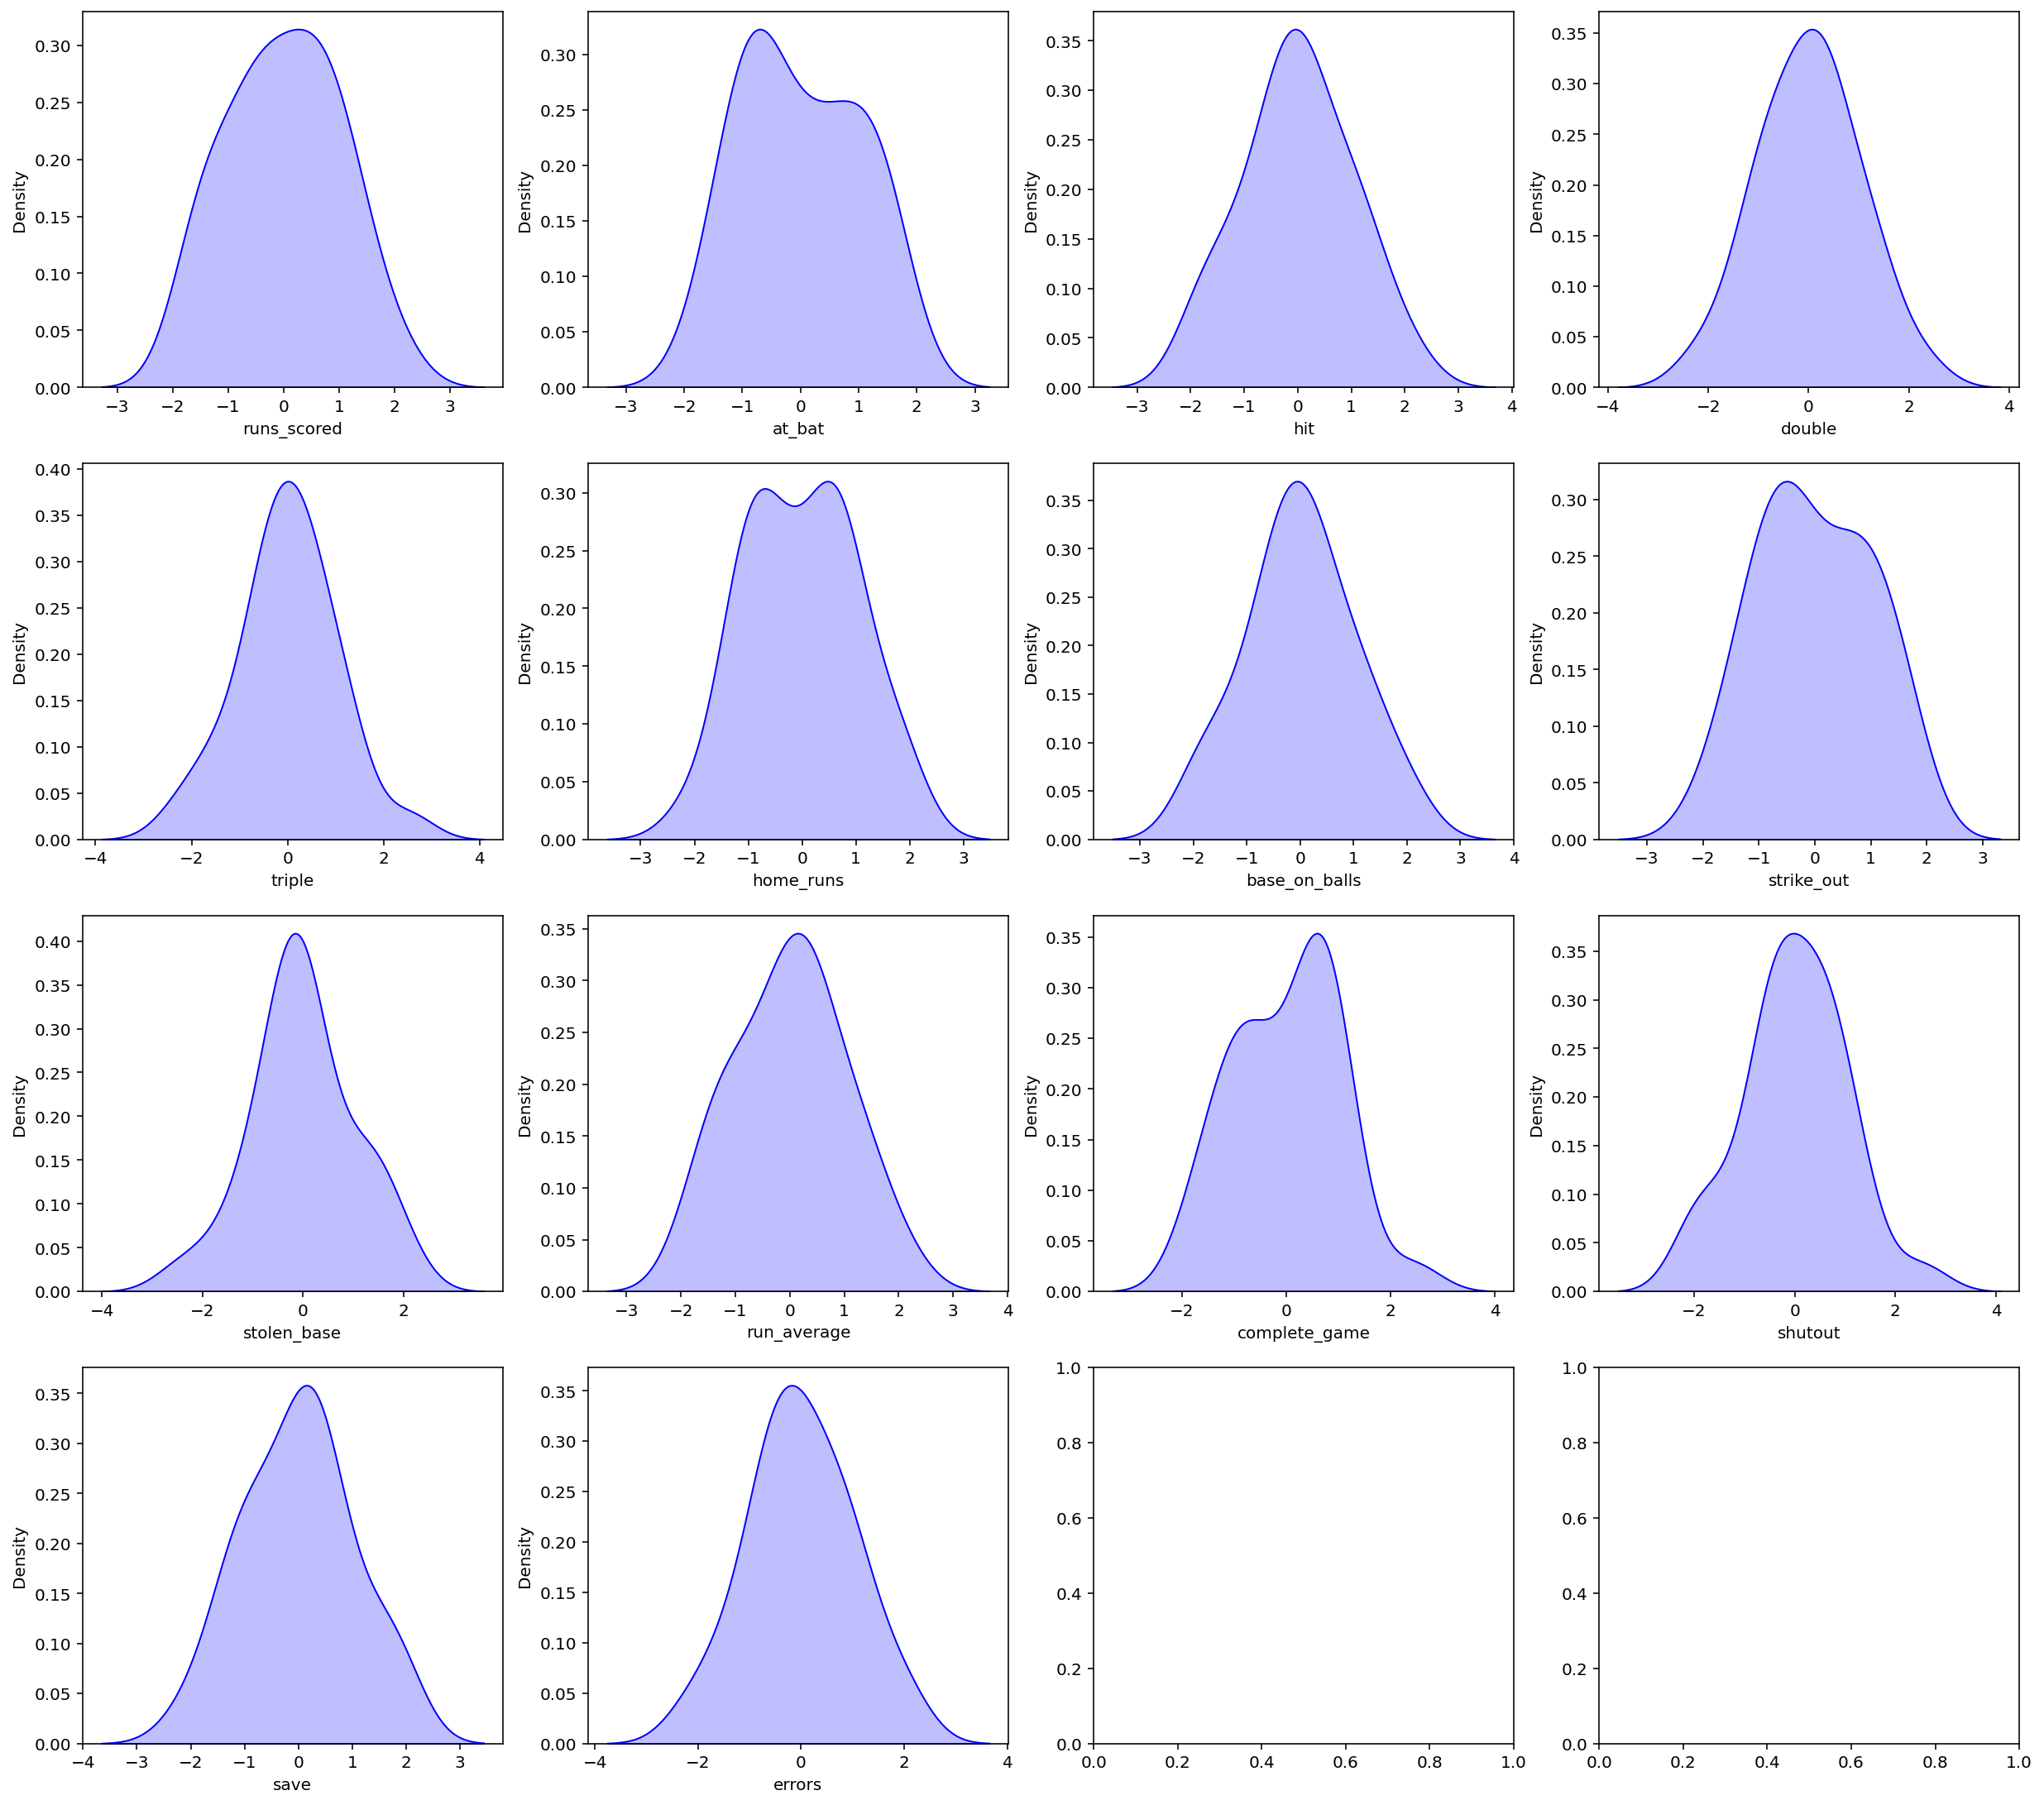

In [149]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in X.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

#As we can see in the below distribution plot all the values are being reflected in proper normalized format showing a bell shape curve format.

# Finding best random state for building Regression Models

In [150]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS) 

#With the help of random state selection process we have found the number to be 708 amongst 1-1000.

Best r2 score is 0.935400373207597 on Random State 708


# Creating the training and testing data sets

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=708)

#Taking 30 percent of the complete dataset for training purpose and the remaing 70 percent with be used to train the machine learning models.

In [154]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [ ]:
#Have built a function that splits the training and testing features and labels, 
#then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, 
#calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [155]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.148814593377202
R2 Score is: 93.5400373207597
Cross Validation Score: 23.061116691346555
R2 Score - Cross Validation Score is 70.47892062941314


In [161]:
# Ridge Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model=Ridge (alpha=1e-2, normalize=True)
reg(model, X, Y)


RMSE Score is: 3.261707707959463
R2 Score is: 93.0685210320841
Cross Validation Score: 24.999300669006193
R2 Score - Cross Validation Score is 68.06922036307792


In [162]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 3.5967315590810207
R2 Score is: 91.57146914264766
Cross Validation Score: 25.912111563922334
R2 Score - Cross Validation Score is 65.65935757872532


In [163]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 12.416554603361481
R2 Score is: -0.447246319540473
Cross Validation Score: -44.952270398156955
R2 Score - Cross Validation Score is 44.50502407861648


In [164]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 11.241663577958558
R2 Score is: 17.662628524890568
Cross Validation Score: -173.3181896424058
R2 Score - Cross Validation Score is 190.98081816729638


In [165]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 11.50737325926502
R2 Score is: 13.724351857934947
Cross Validation Score: 0.1219436994799028
R2 Score - Cross Validation Score is 13.602408158455043


In [167]:
# K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 11.6013996125248
R2 Score is: 12.308680952383222
Cross Validation Score: -5.247632975994074
R2 Score - Cross Validation Score is 17.556313928377296


In [168]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 10.492509545695464
R2 Score is: 28.27103308300247
Cross Validation Score: -150.24046261381312
R2 Score - Cross Validation Score is 178.5114956968156


In [169]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 8.479806486916761
R2 Score is: 53.150203038220944
Cross Validation Score: -28.707085426328394
R2 Score - Cross Validation Score is 81.85728846454934


In [170]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 10.785203115843487
R2 Score is: 24.2133889850351
Cross Validation Score: -3.059475722075906
R2 Score - Cross Validation Score is 27.272864707111005


In [171]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 10.247254510355447
R2 Score is: 31.585071770334892
Cross Validation Score: -0.8244749675689644
R2 Score - Cross Validation Score is 32.40954673790386


In [172]:
#choosing Linear Regression as my best ML Model.

fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [173]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5) #using the Grid Search CV method for hyper parameter to tuning best model.

In [174]:
GSCV.fit(X_train,Y_train) #Trained the Grid Search CV with the list of parameters it should check for best possible outcomes.

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [175]:
GSCV.best_params_ #Here the Grid Search CV has provided with the best parameters list out of all the combinations it used to train the model

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': True}

In [176]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

#Have successfully incorporated the Hyper Parameter Tuning on Final Model and below is the R2 score for it.

R2 score for the Best Model is: -21.073812178125163
